<a href="https://colab.research.google.com/github/ShrudhiChaudhary/Human-detection-and-tracking/blob/main/Dowloading_COCO_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab.patches import cv2_imshow

In [2]:
pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


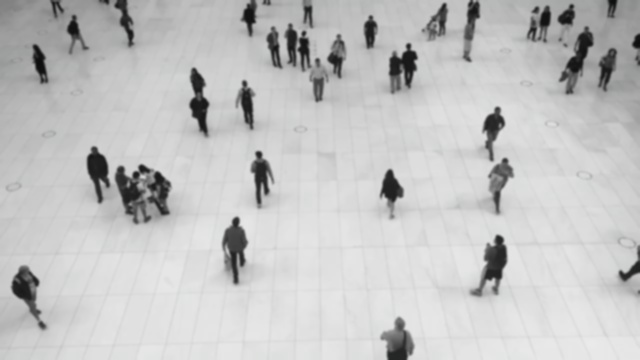

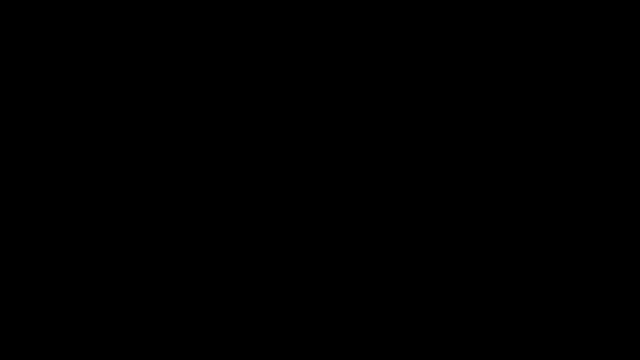

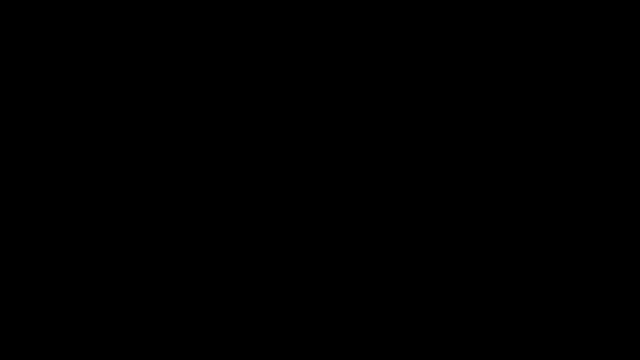

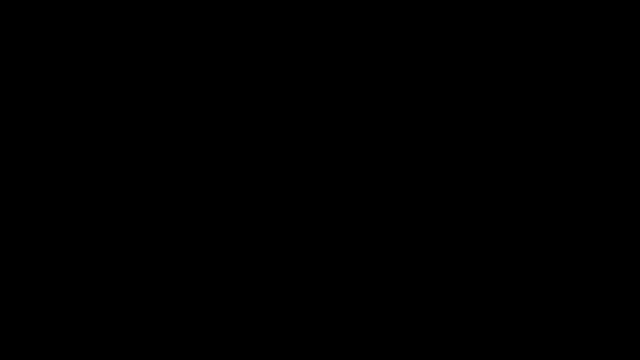

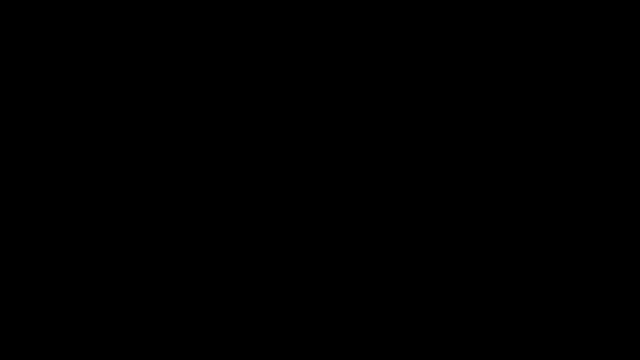

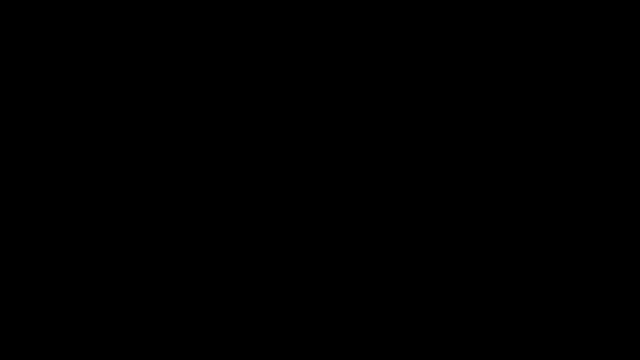

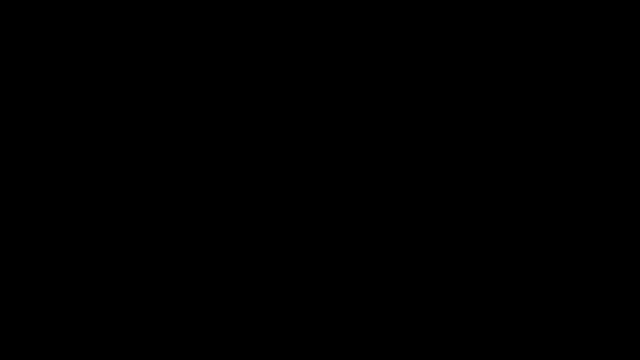

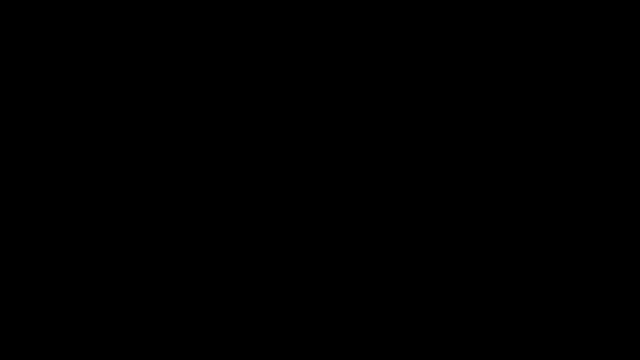

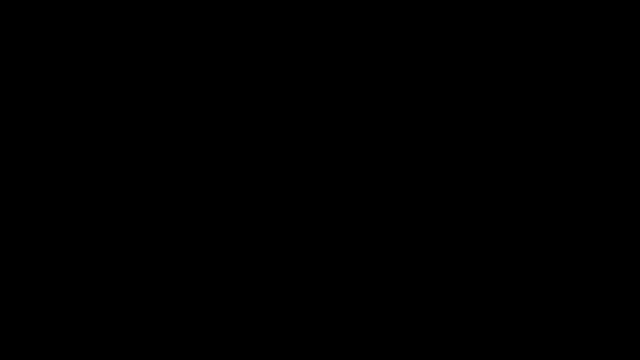

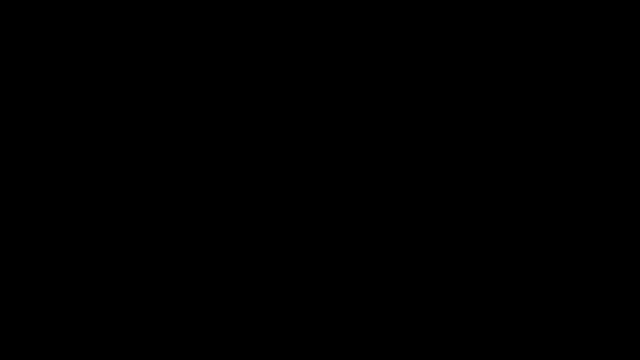

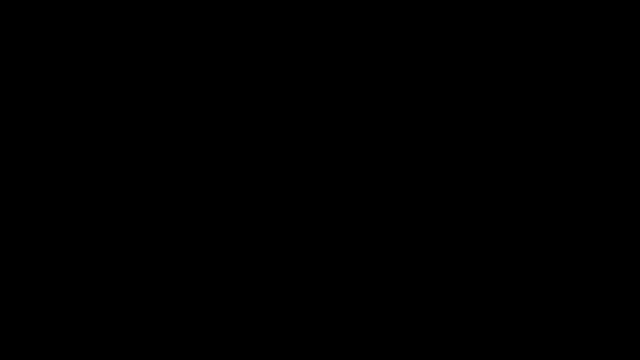

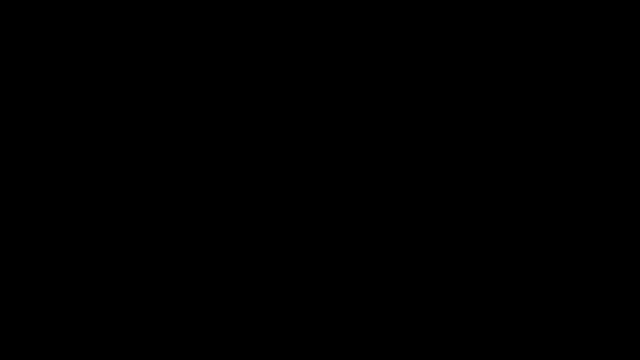

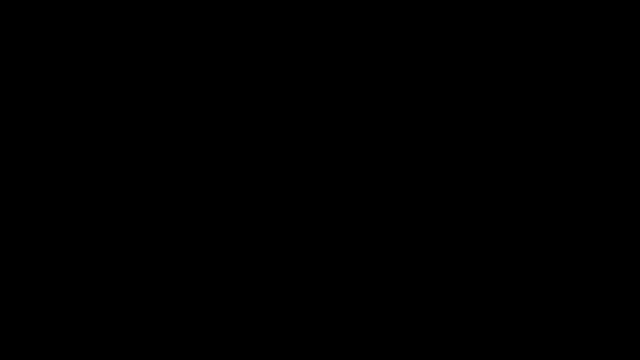

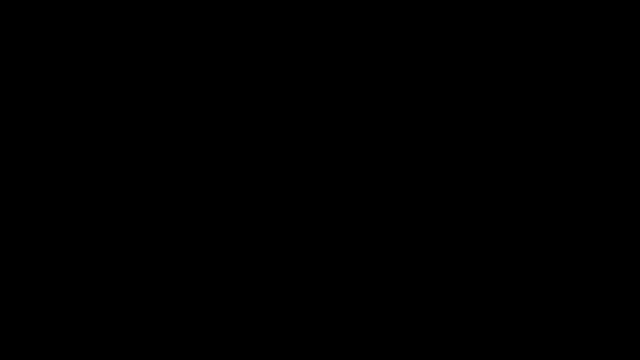

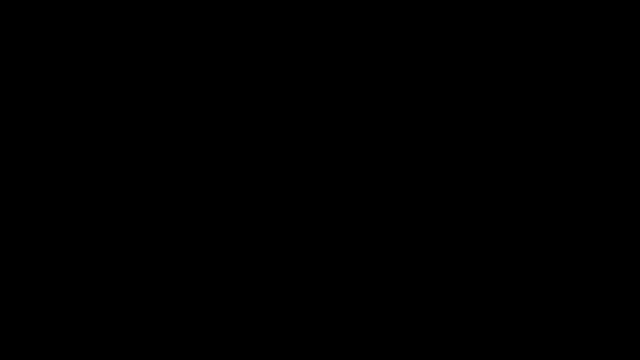

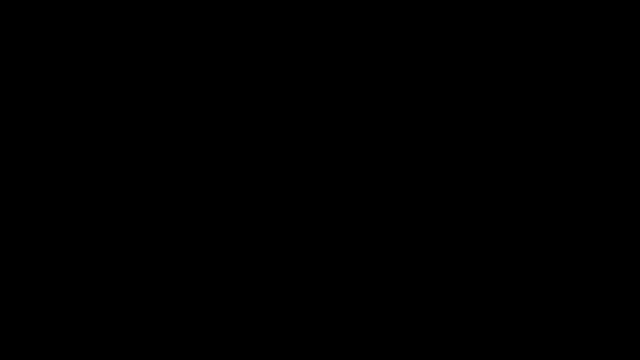

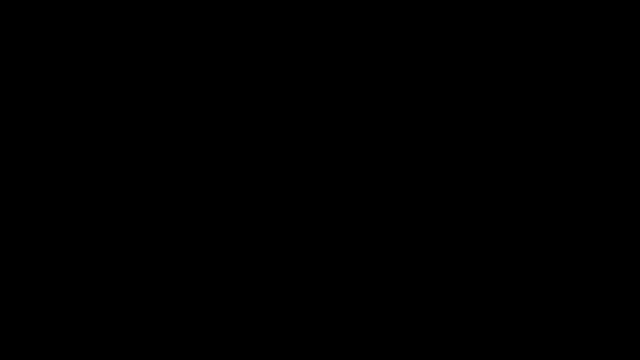

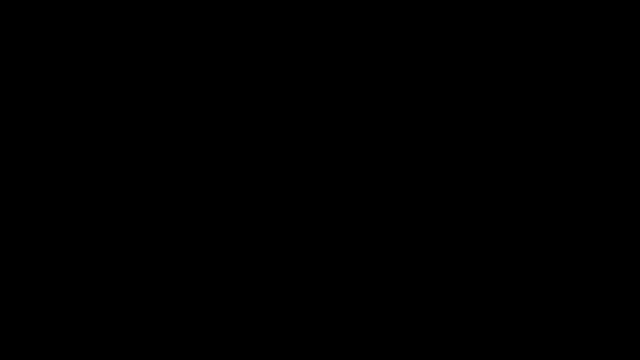

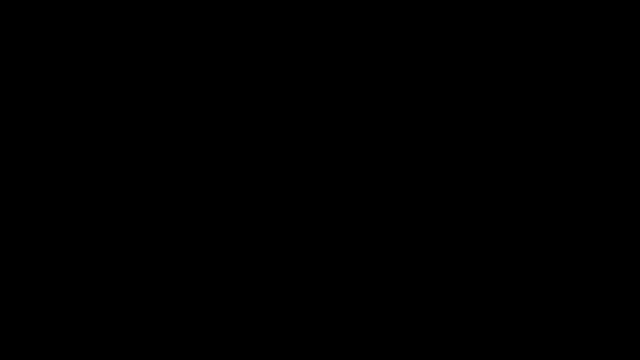

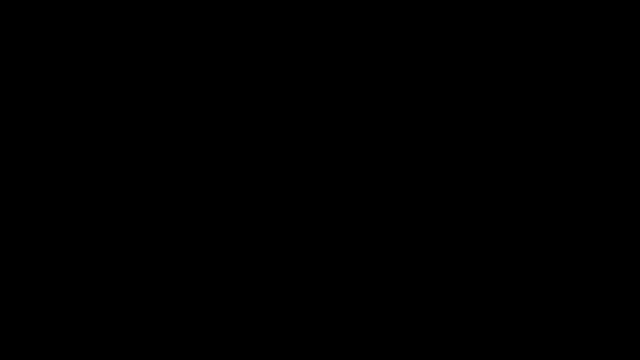

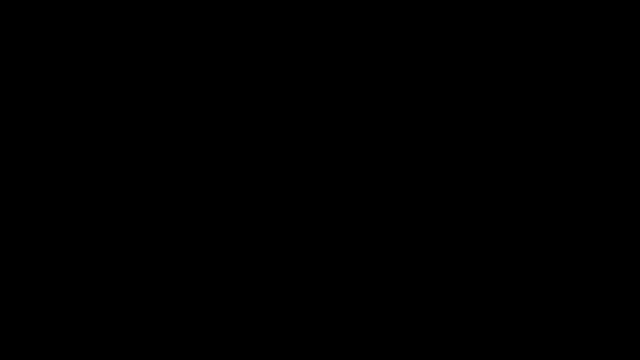

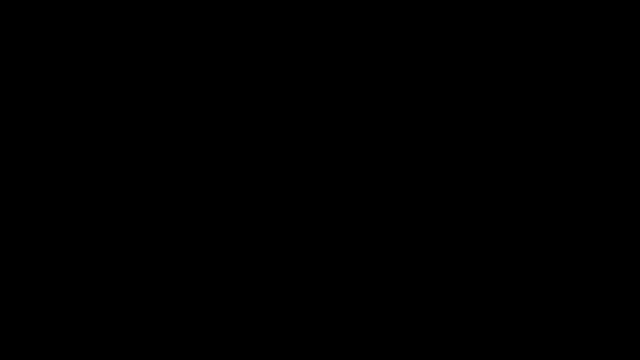

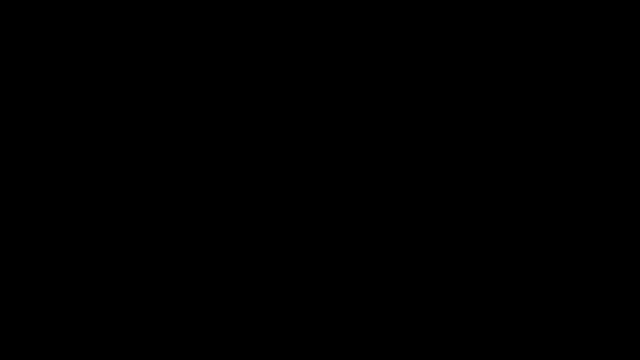

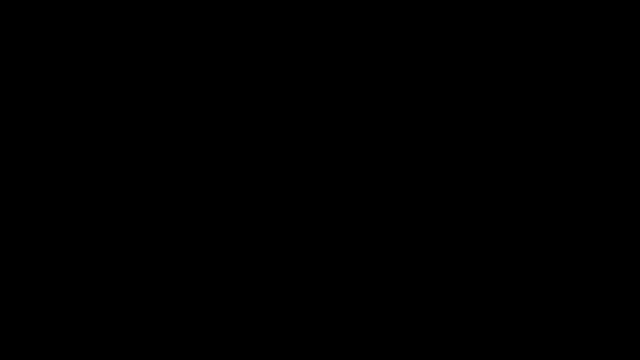

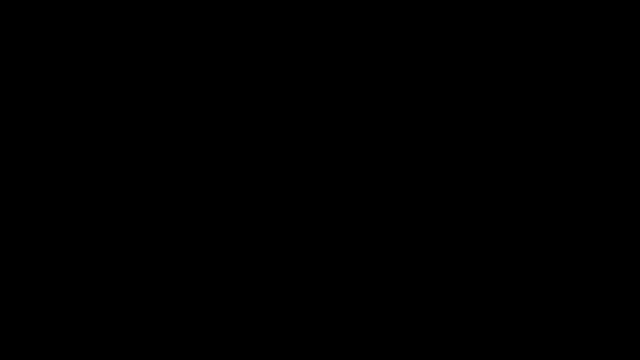

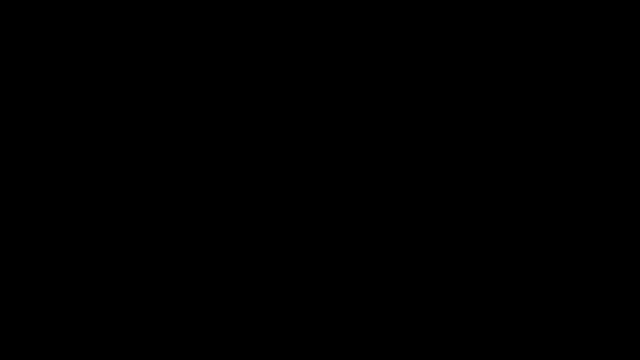

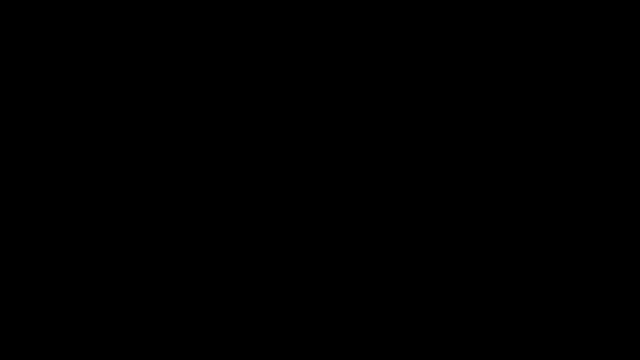

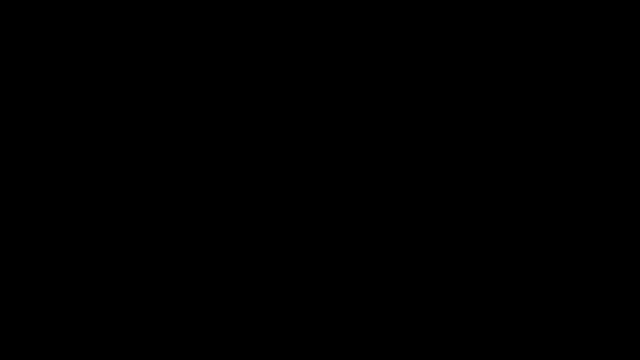

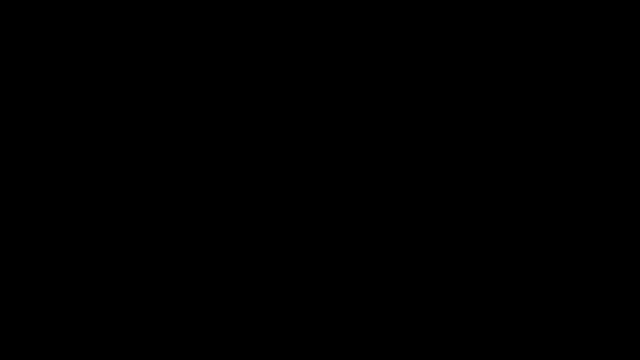

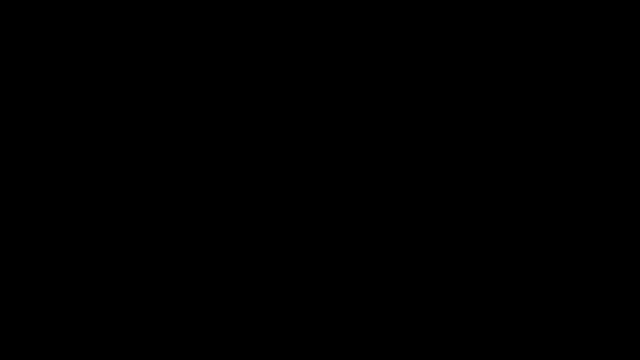

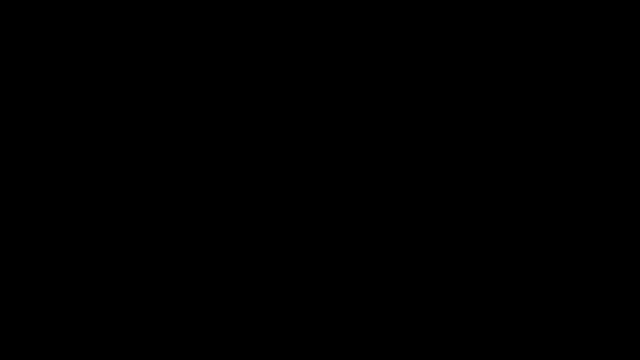

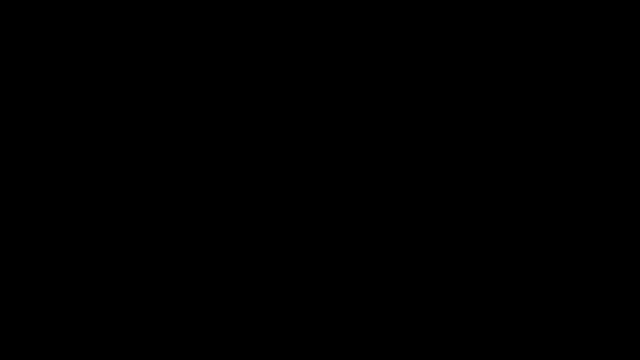

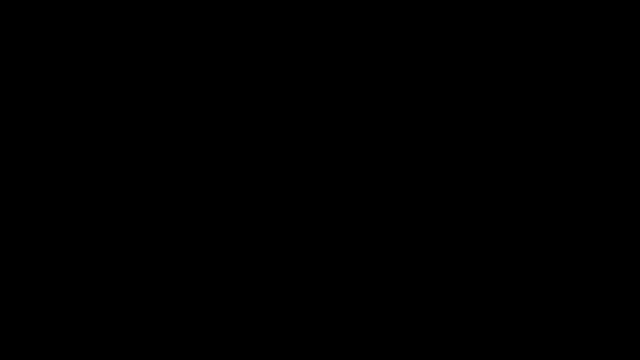

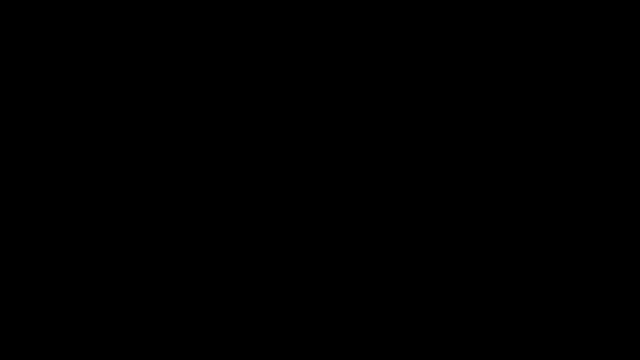

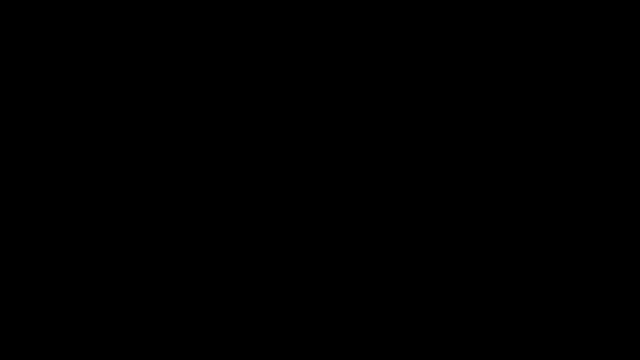

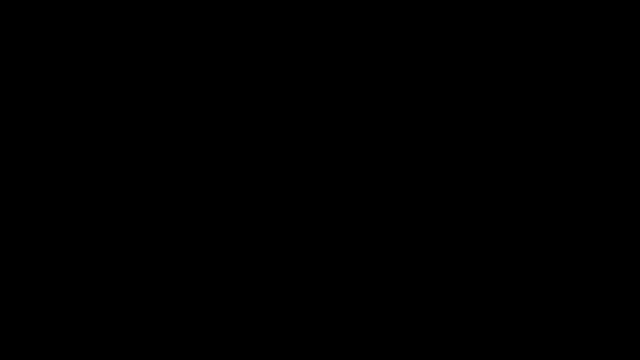

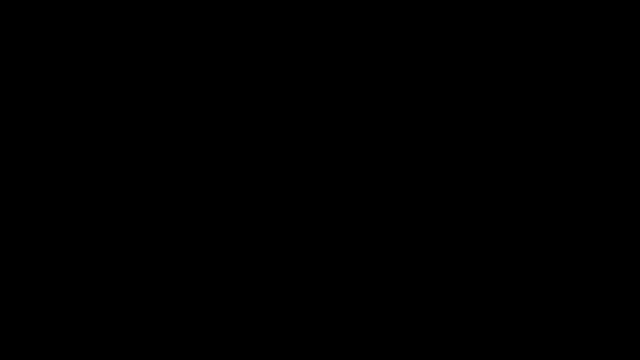

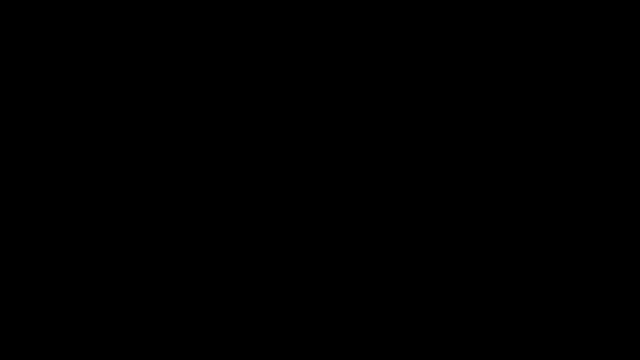

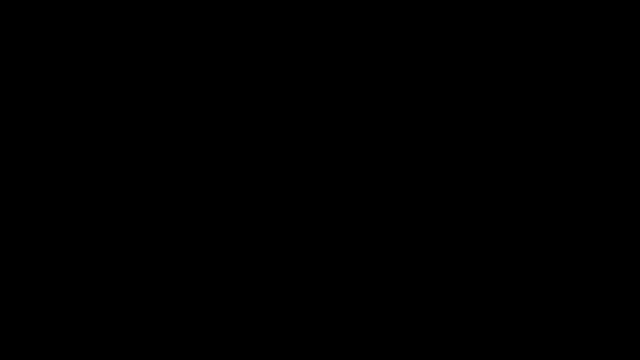

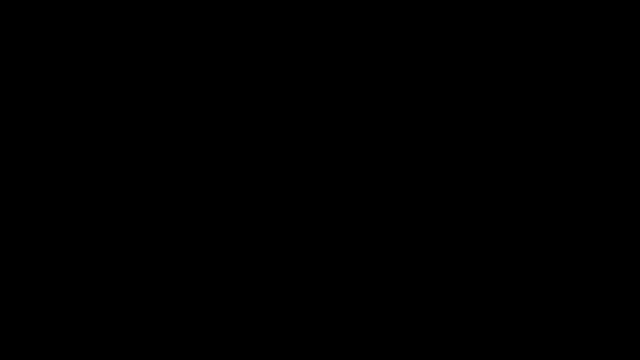

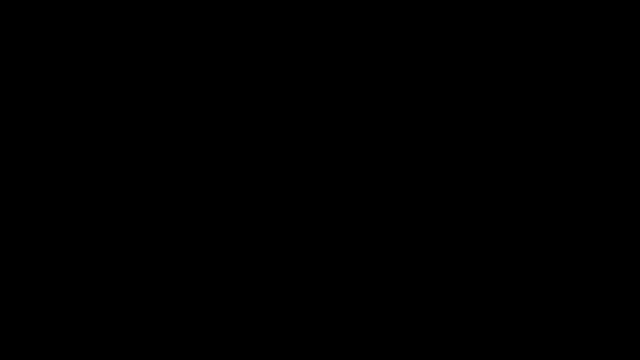

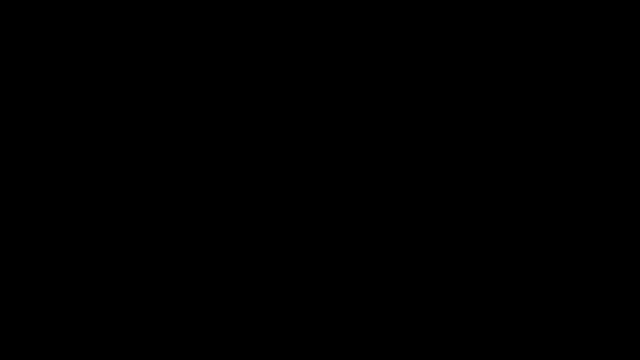

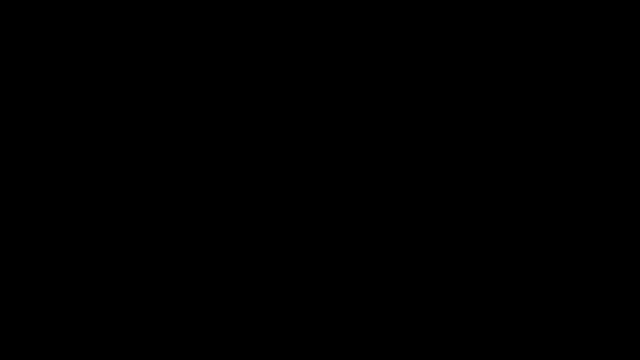

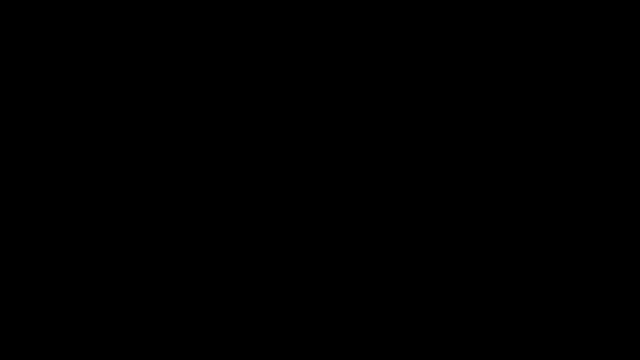

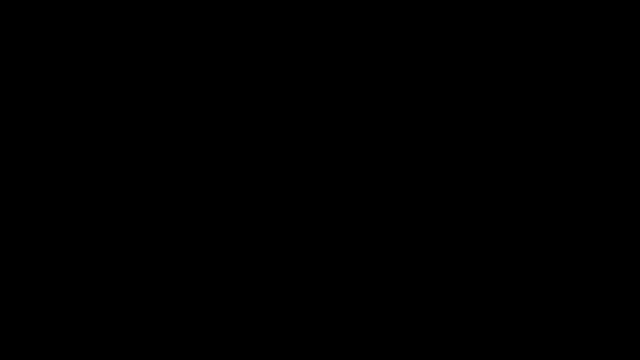

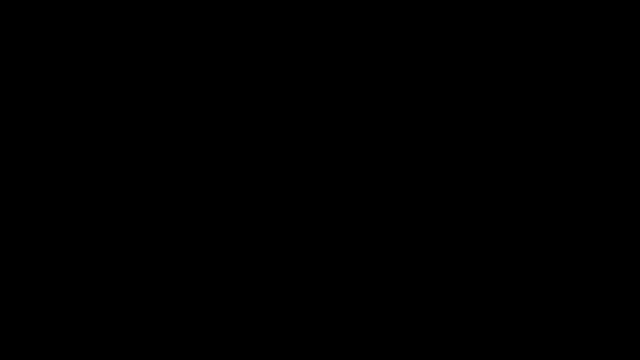

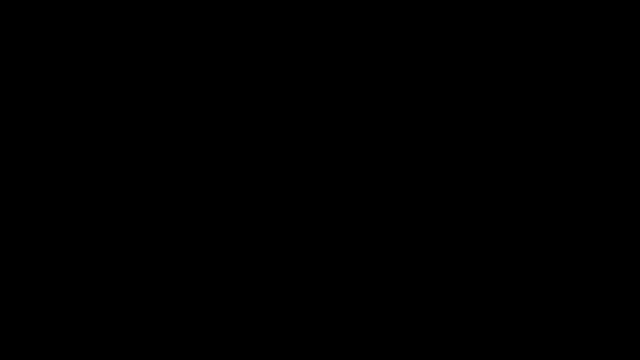

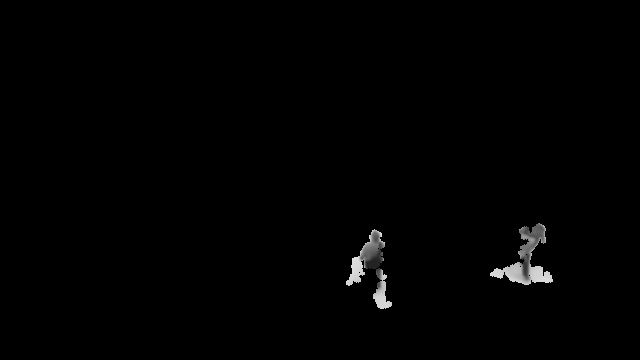

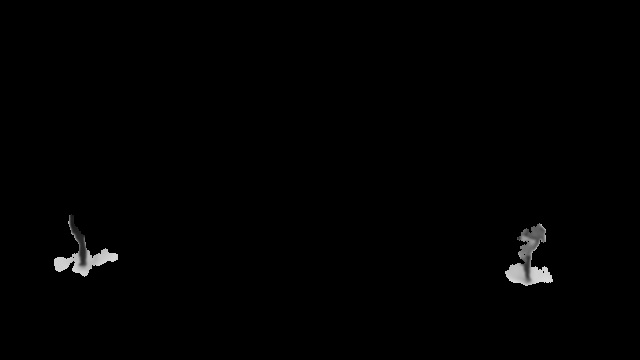

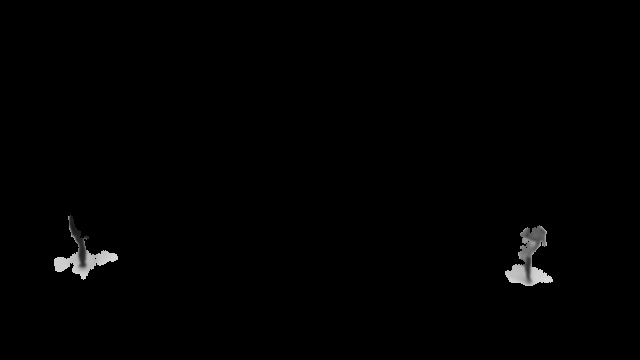

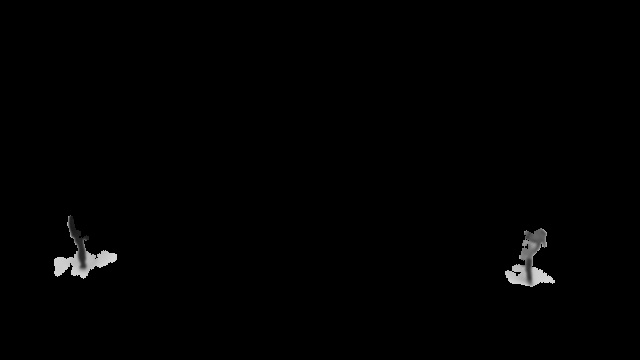

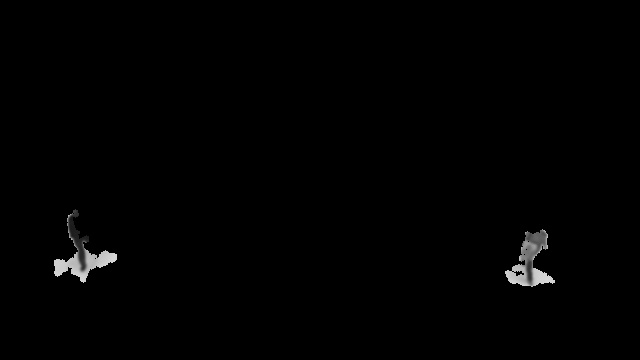

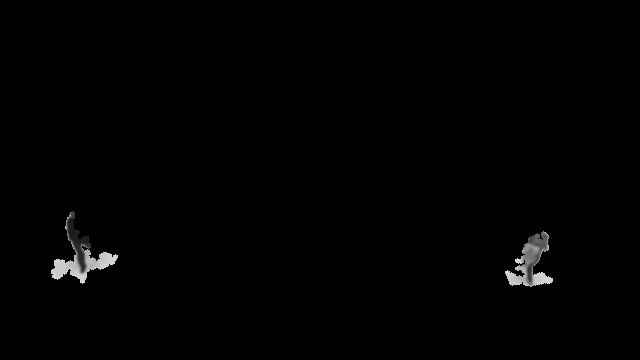

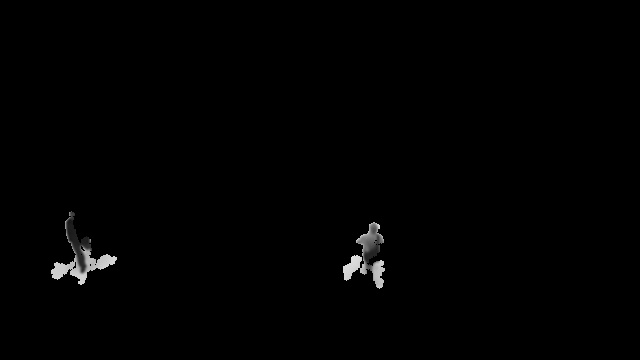

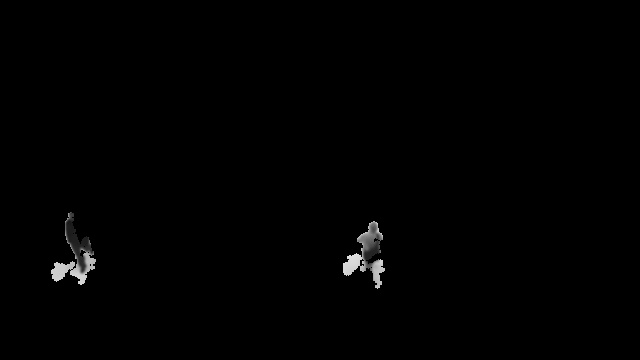

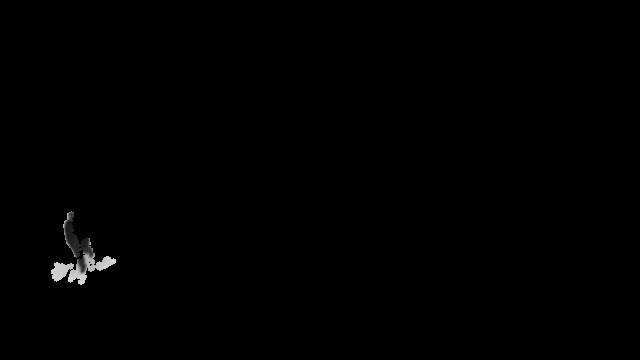

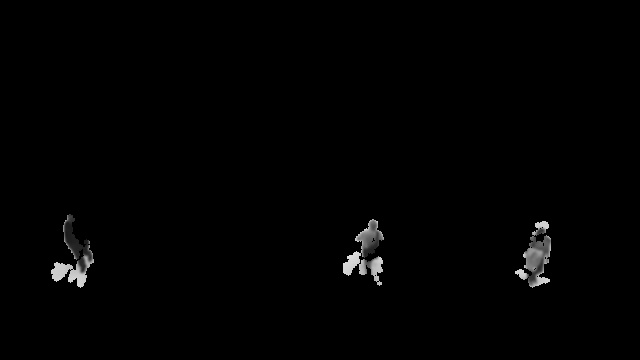

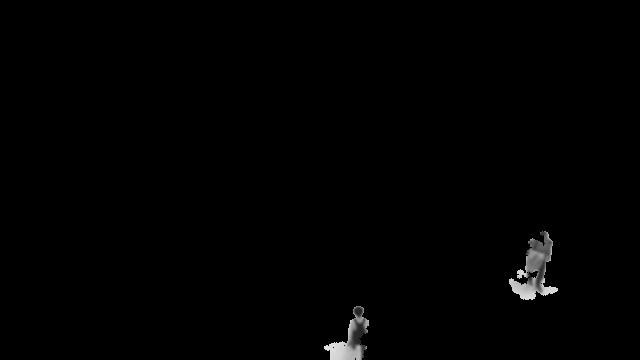

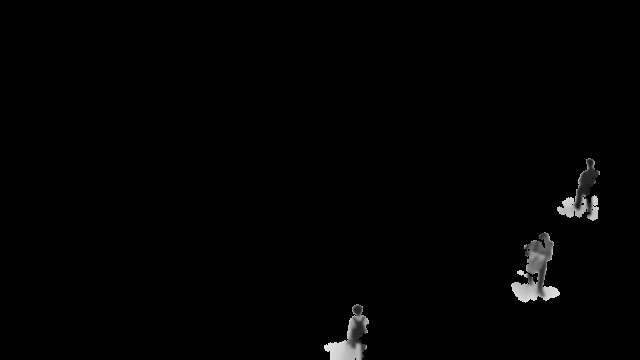

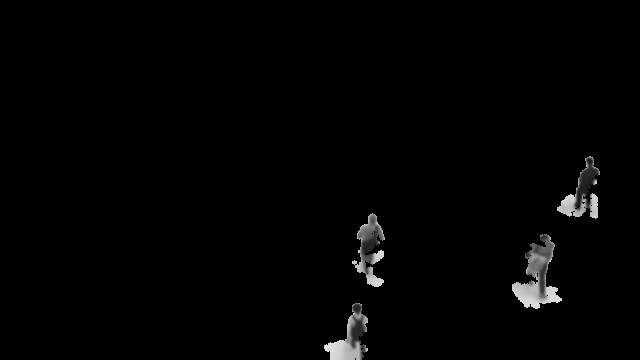

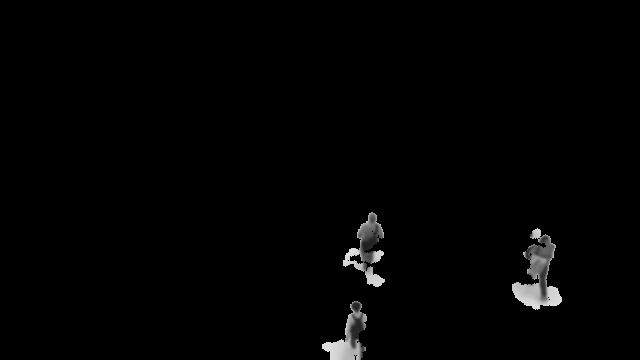

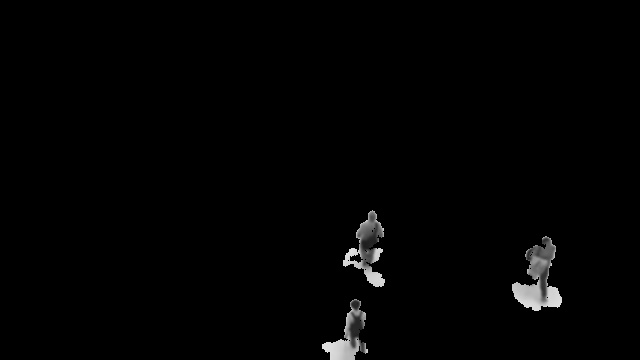

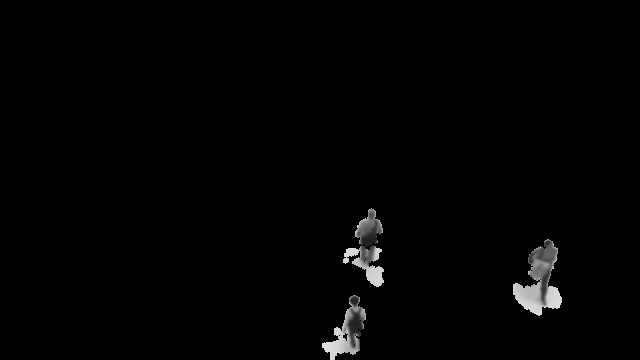

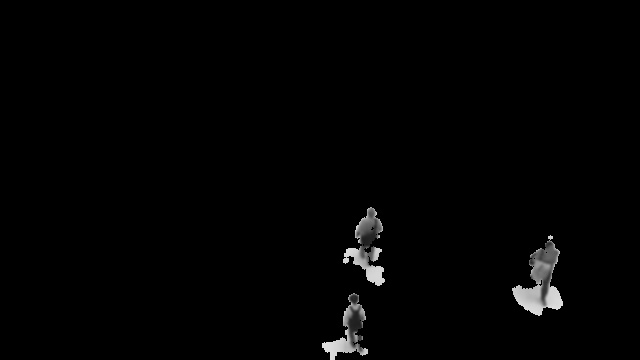

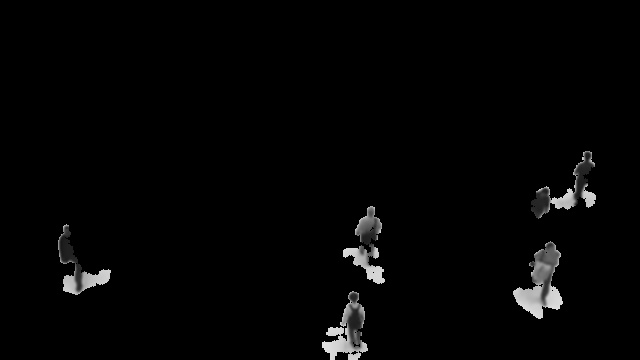

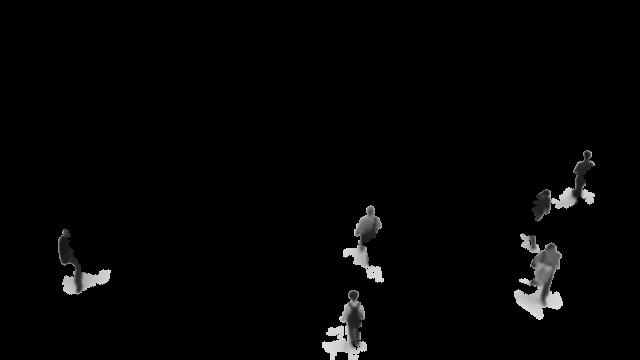

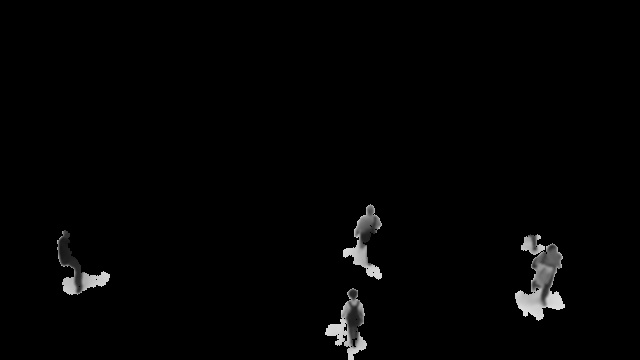

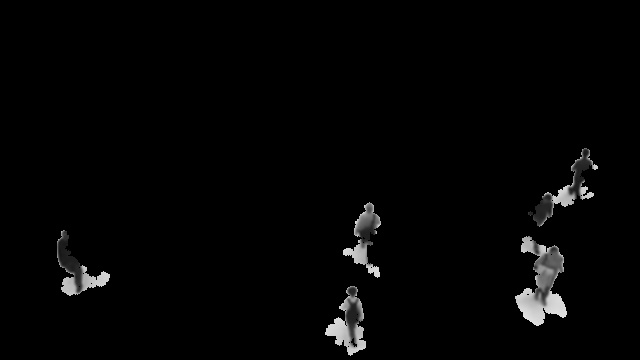

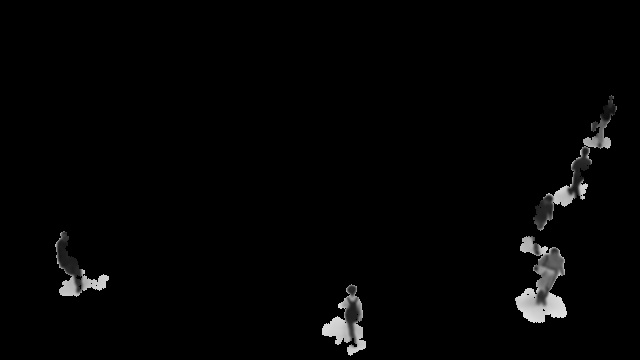

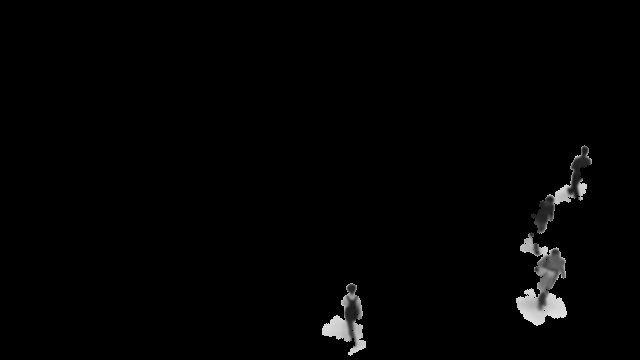

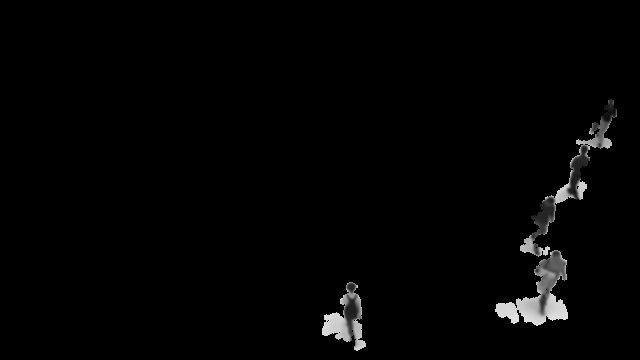

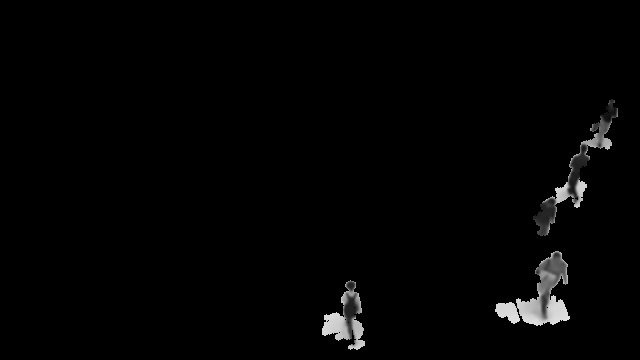

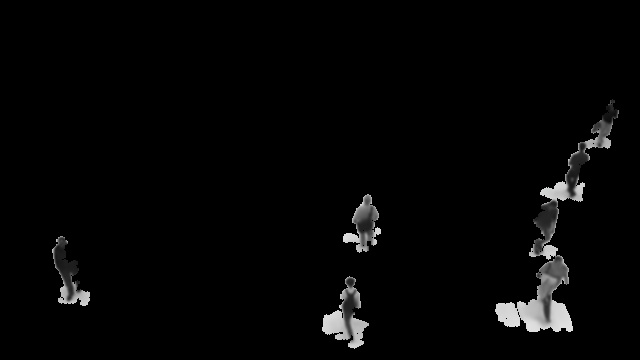

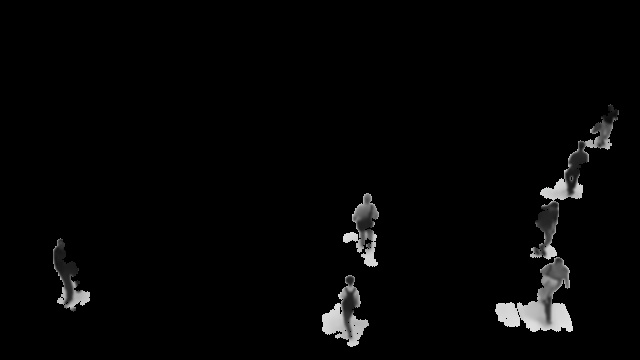

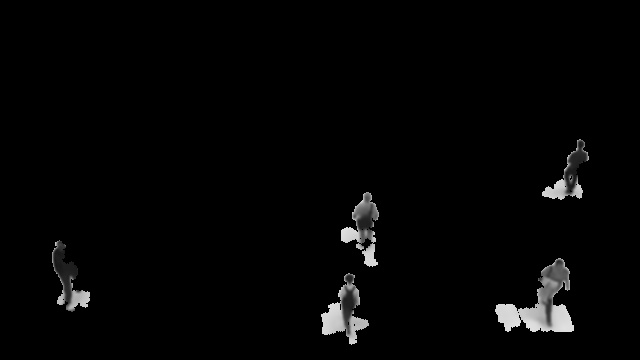

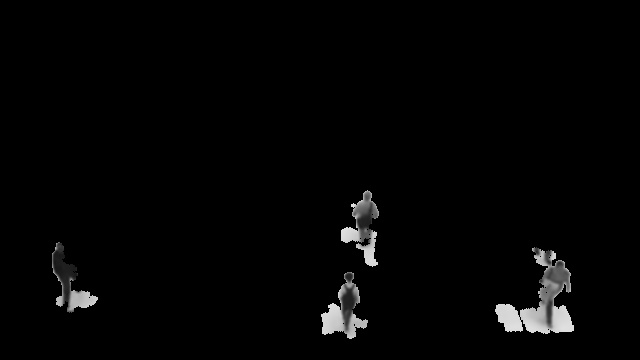

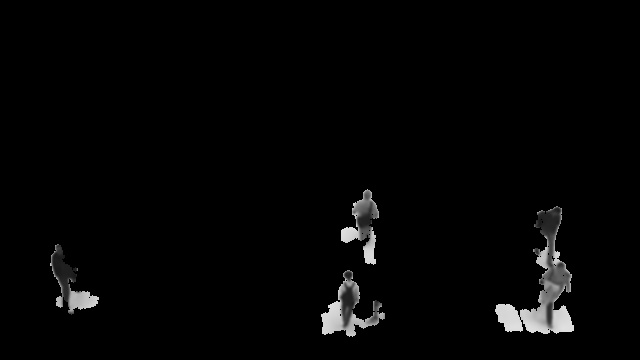

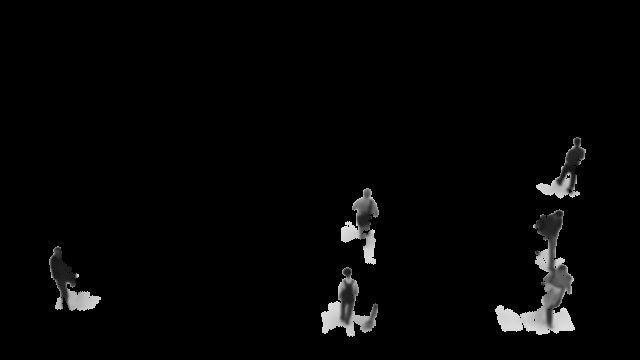

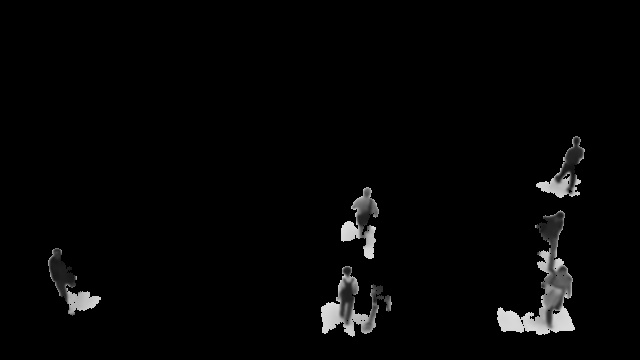

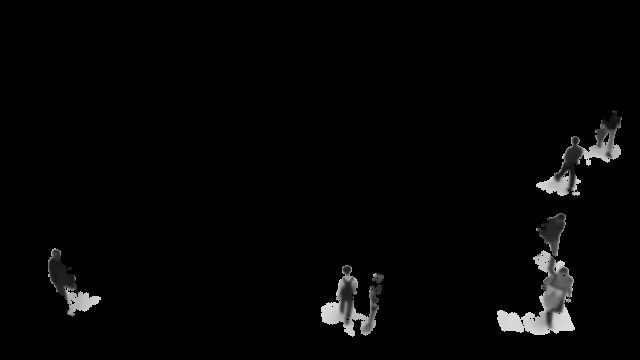

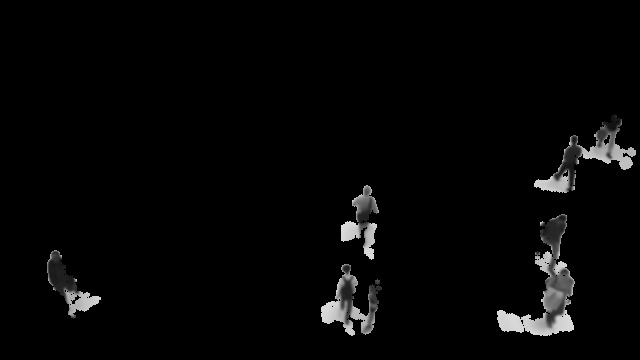

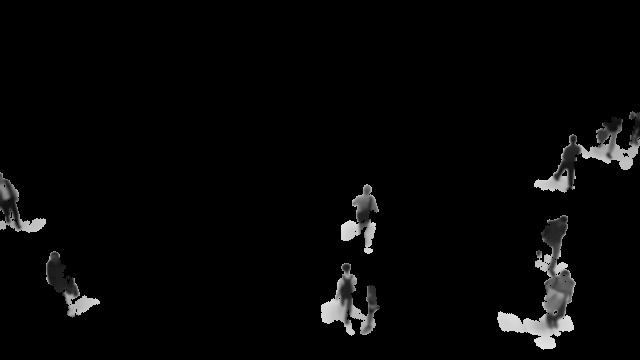

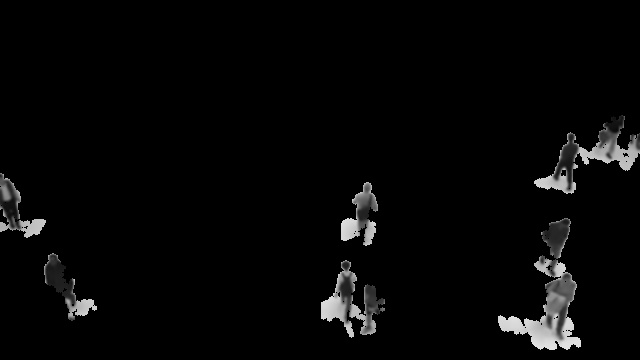

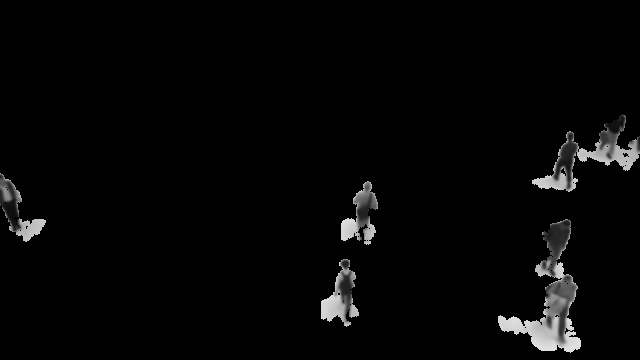

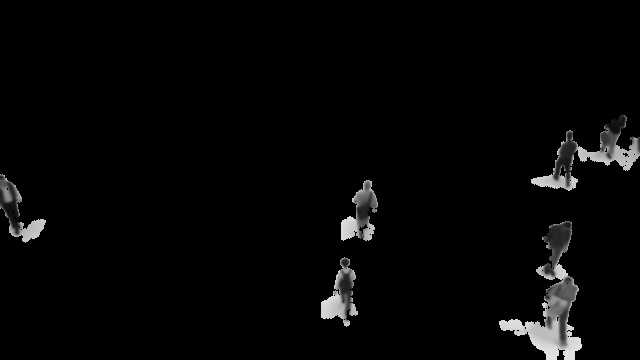

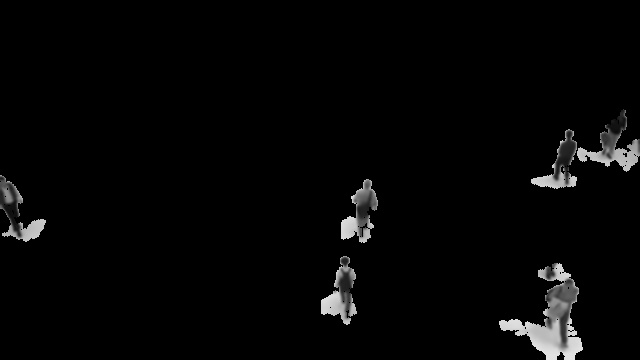

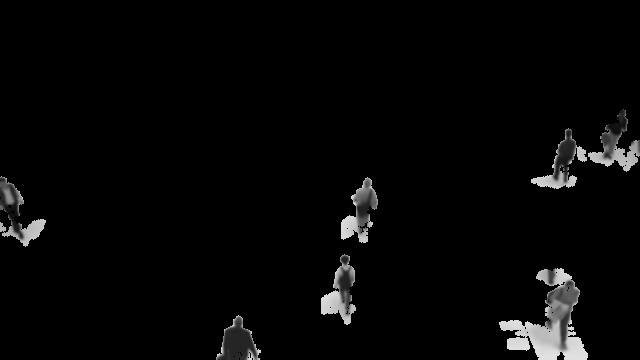

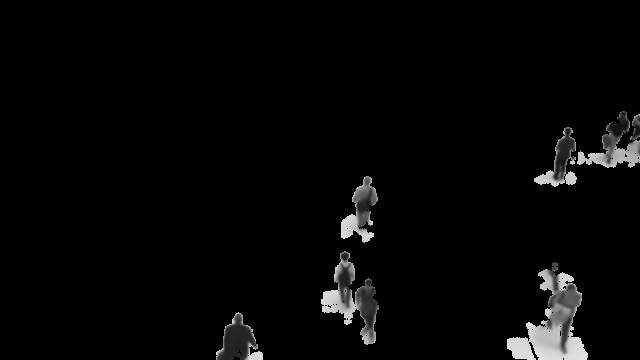

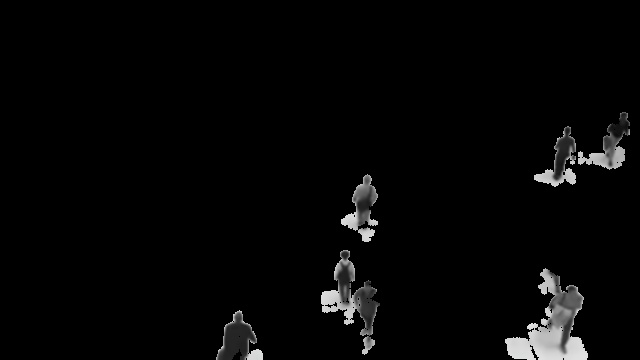

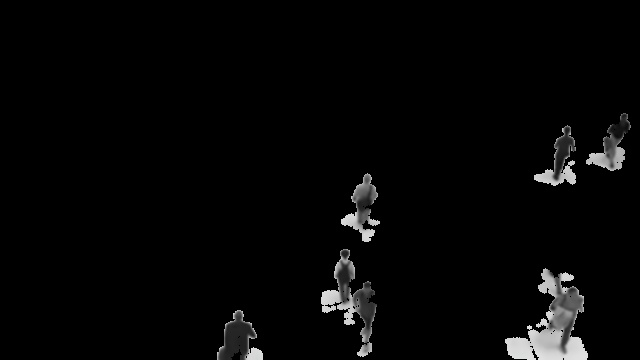

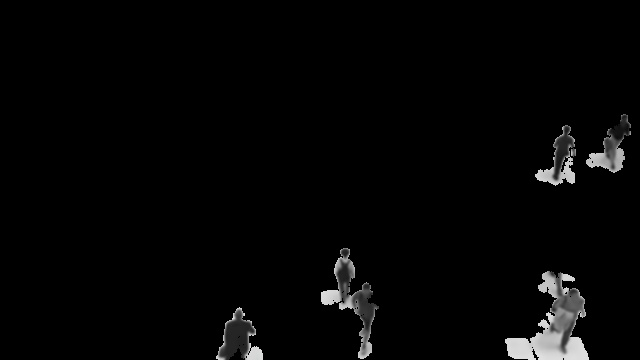

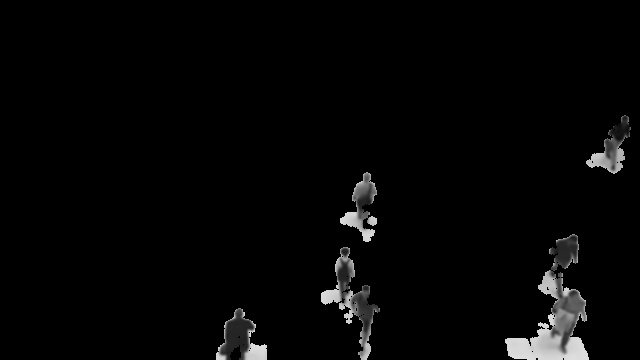

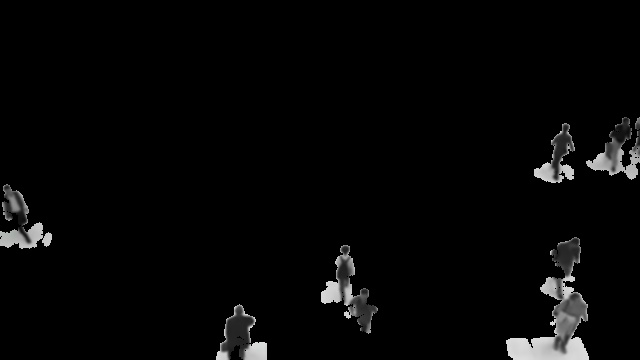

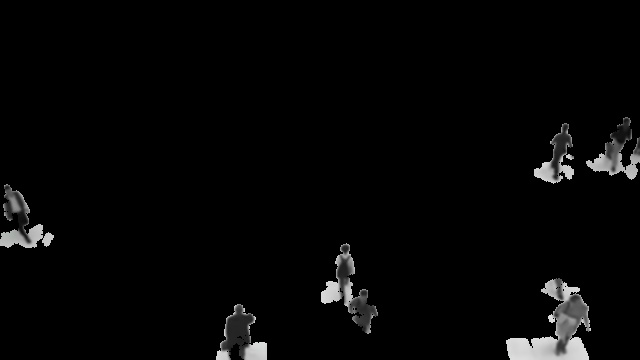

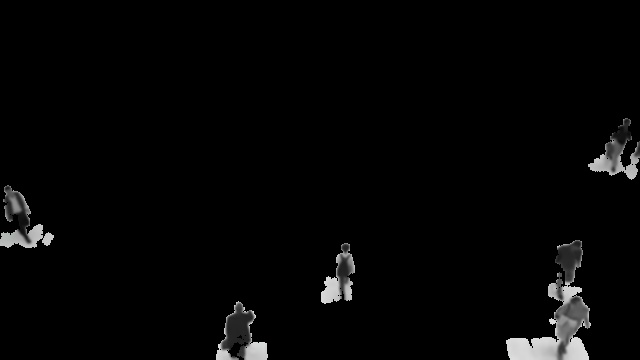

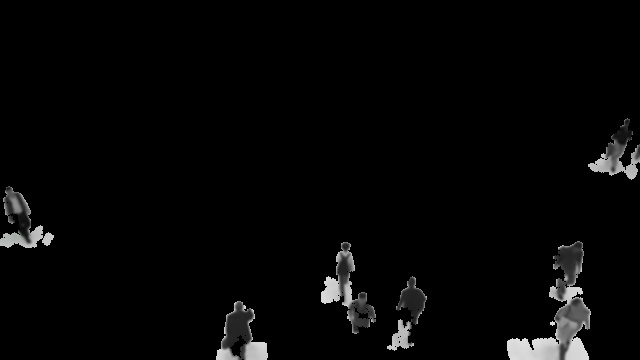

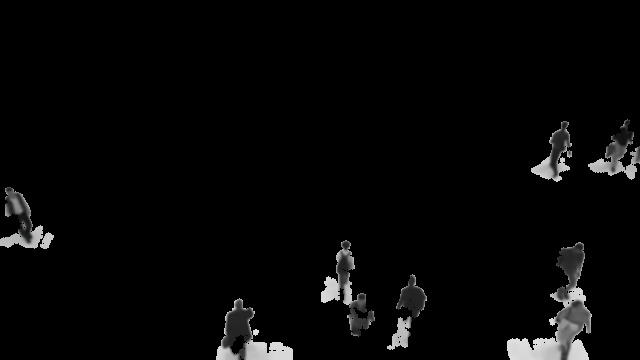

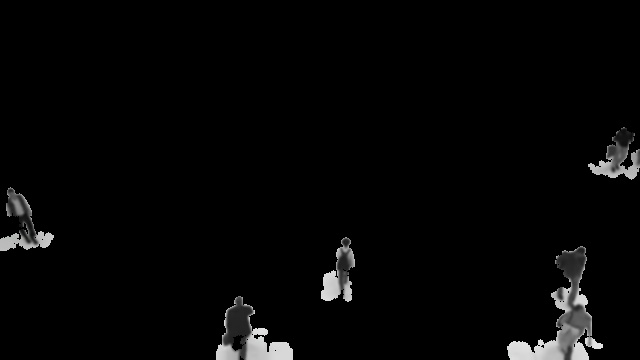

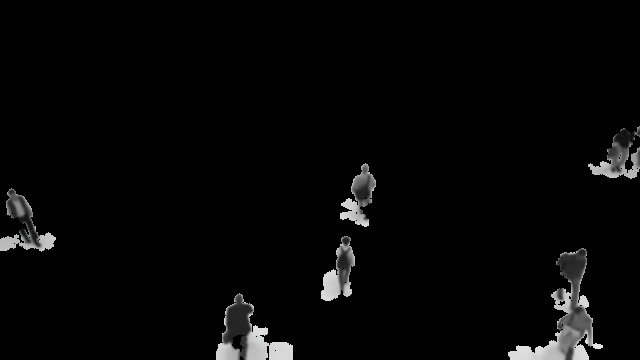

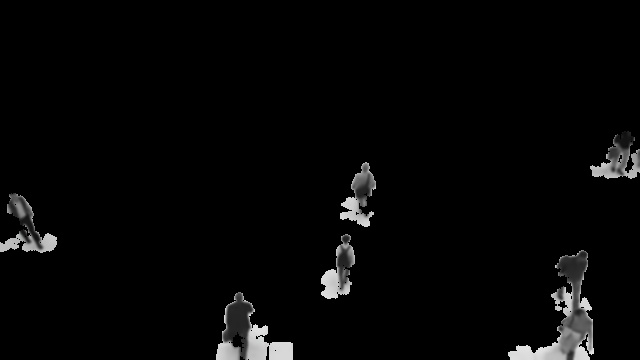

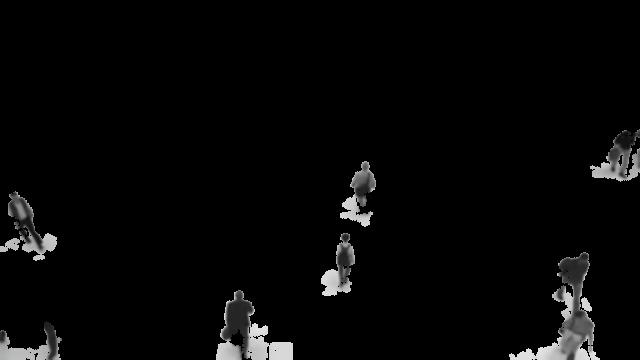

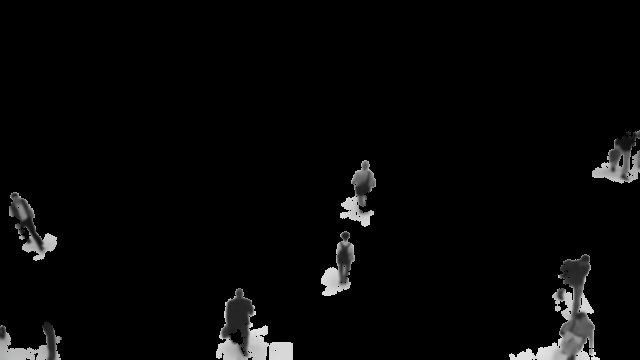

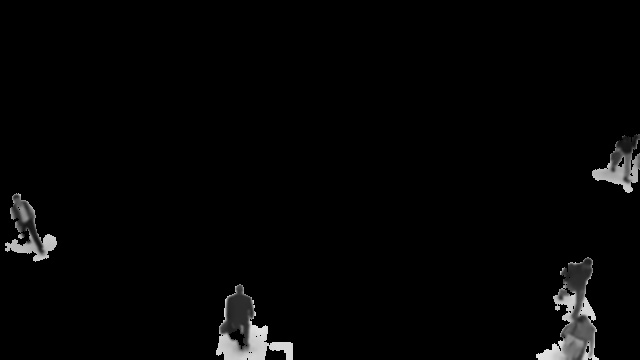

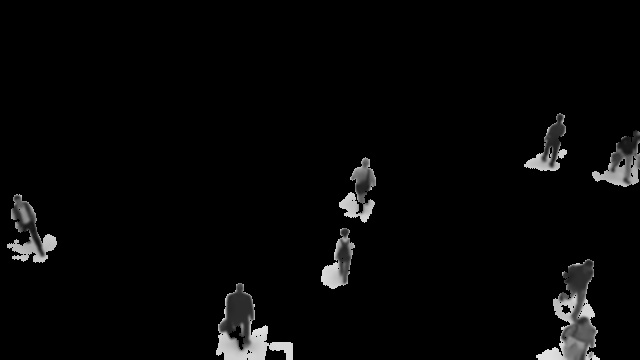

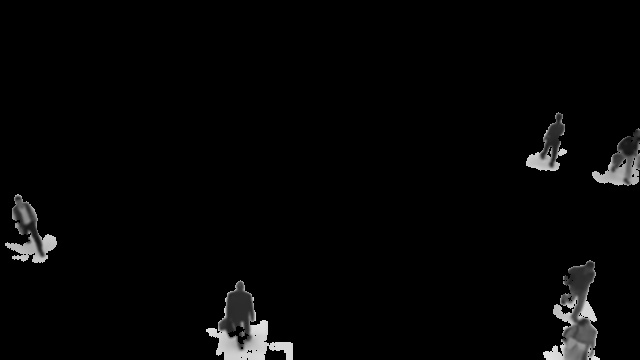

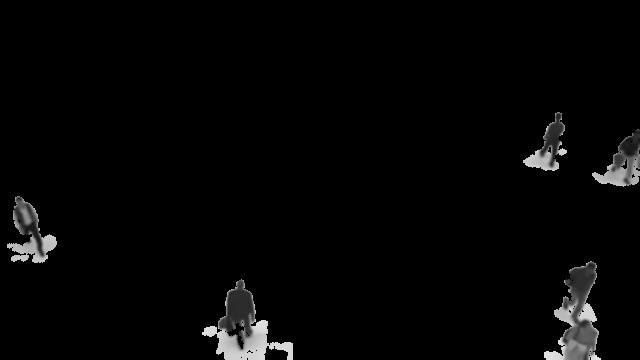

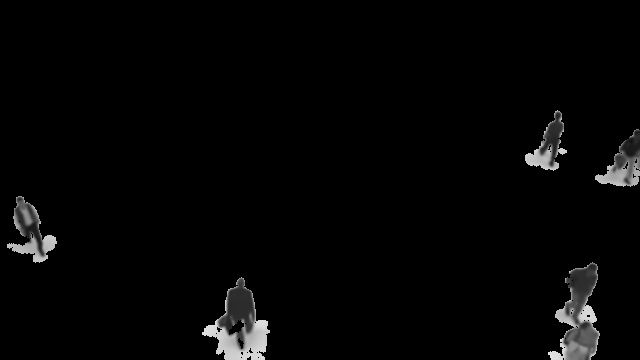

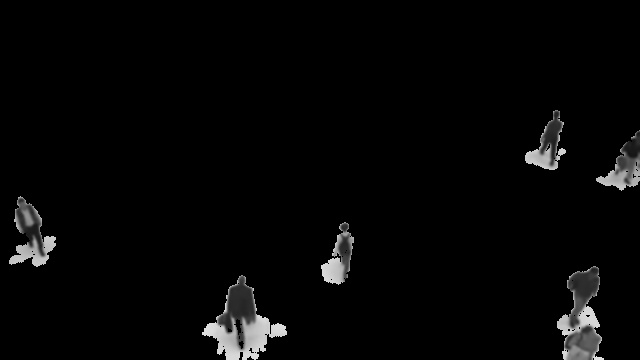

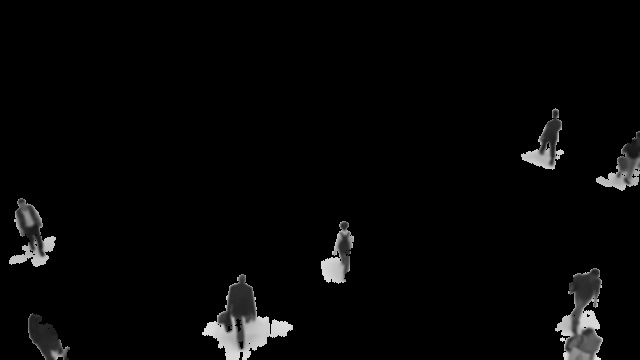

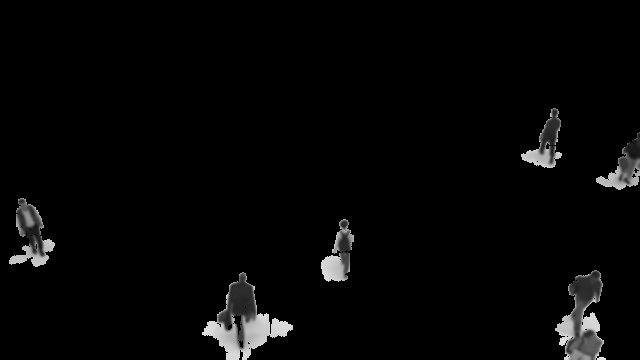

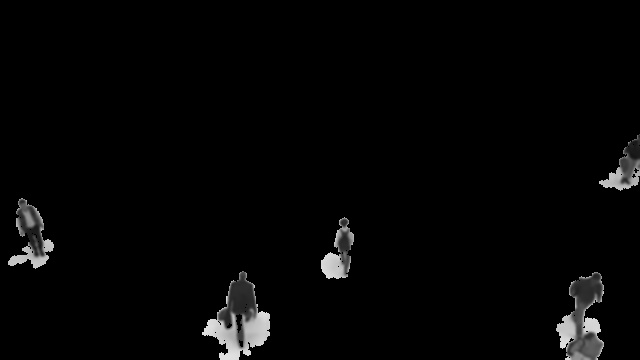

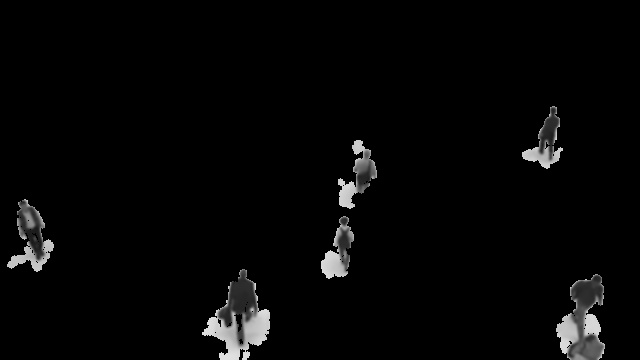

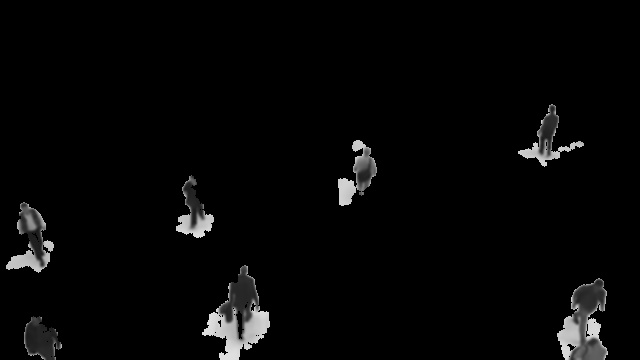

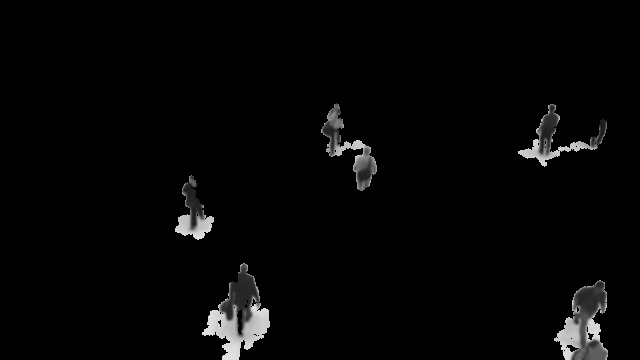

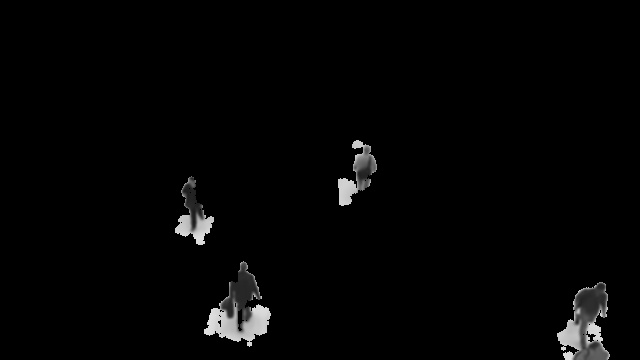

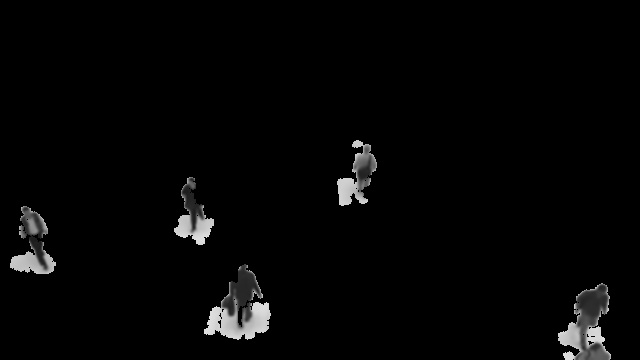

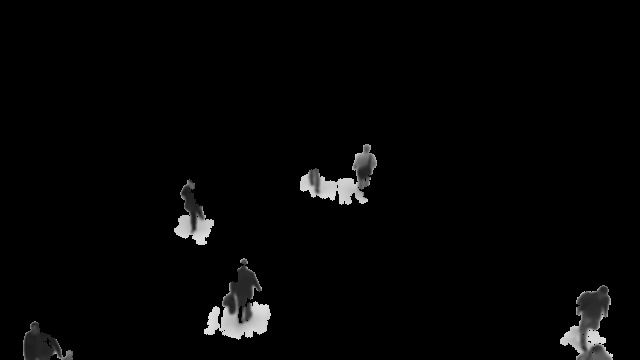

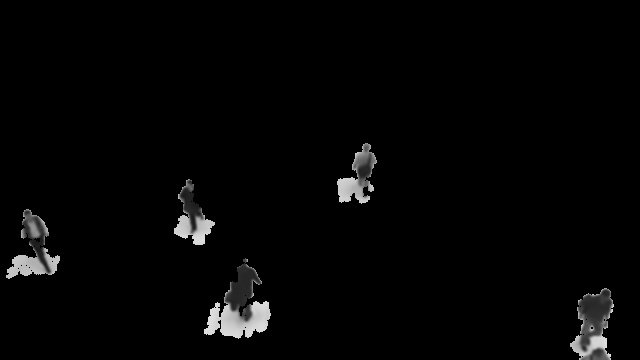

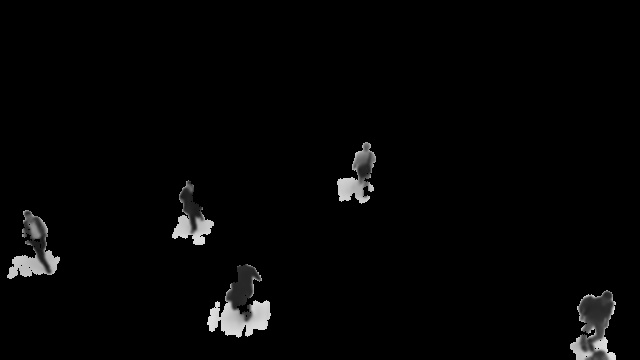

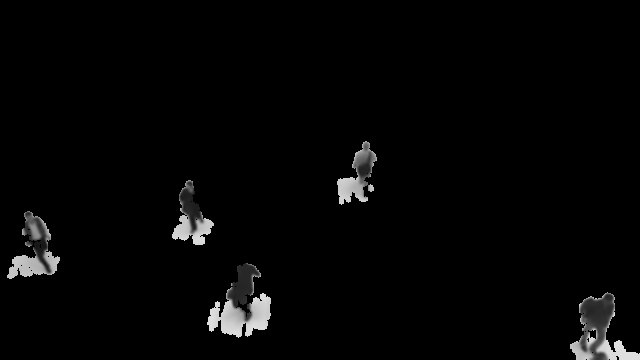

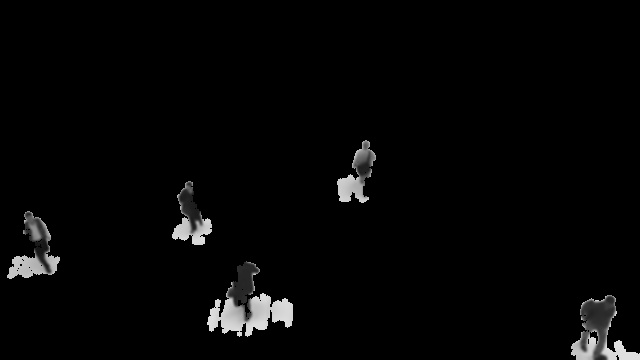

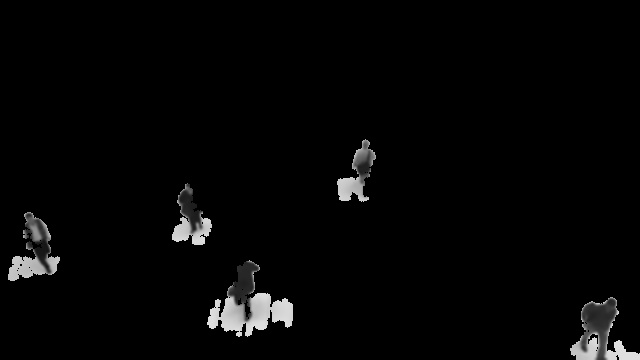

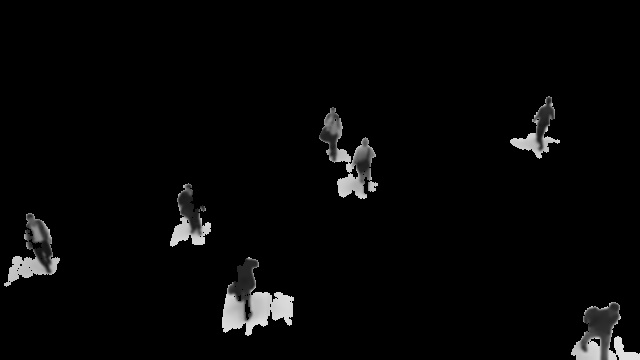

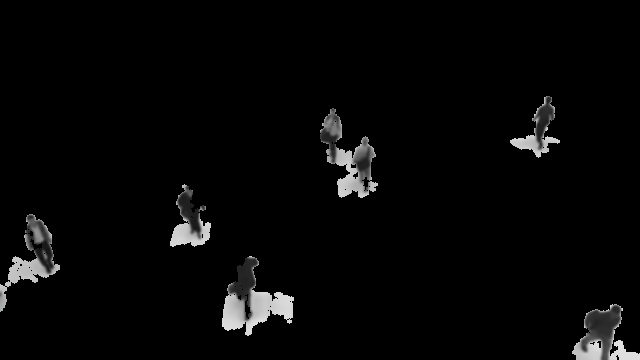

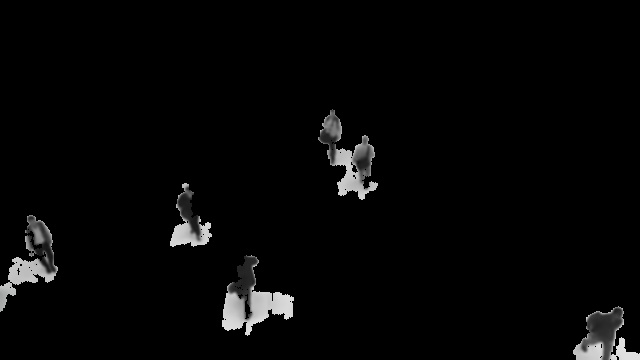

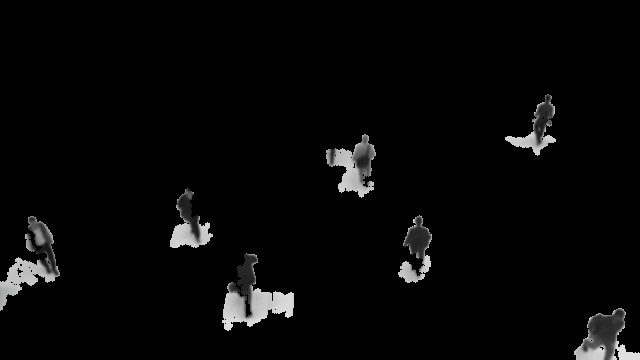

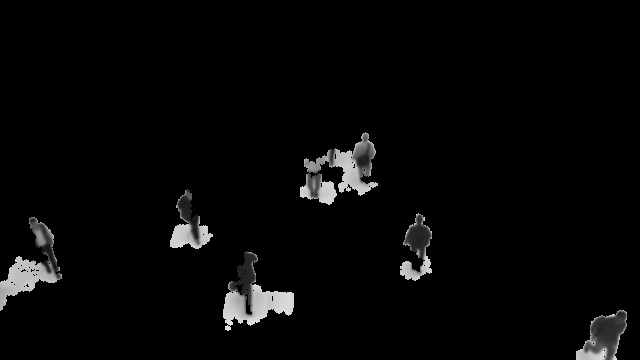

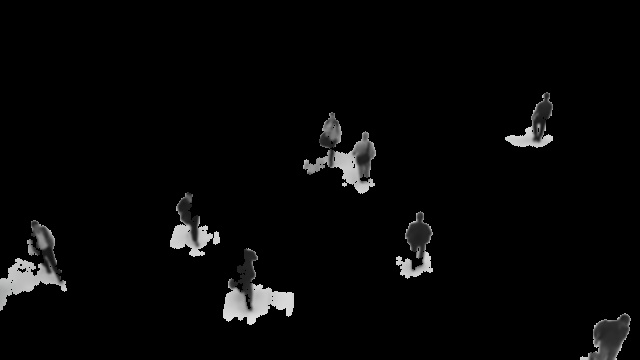

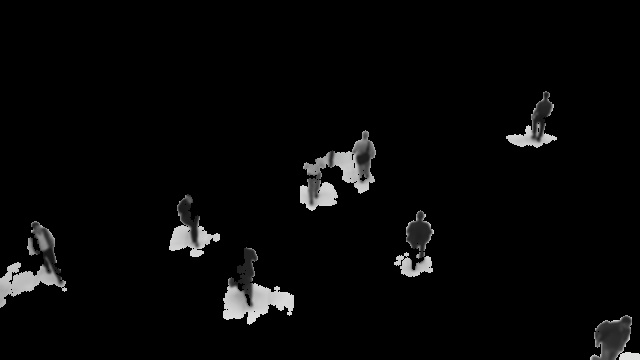

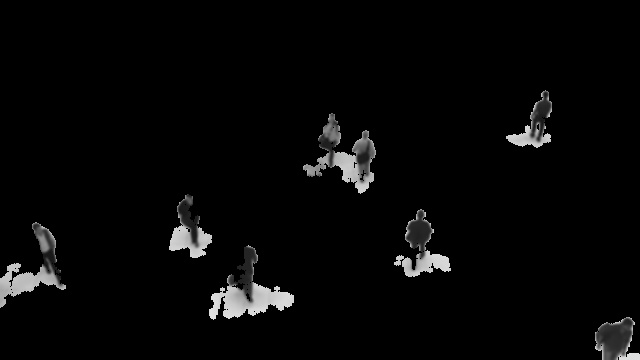

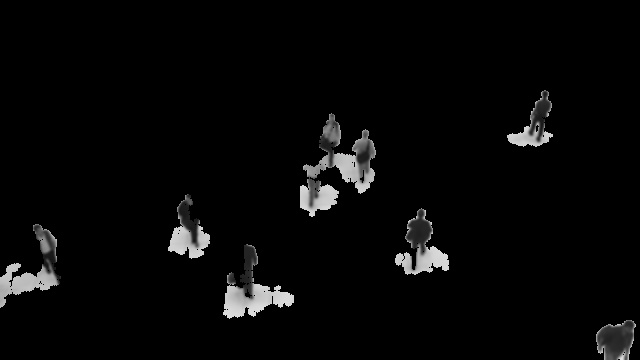

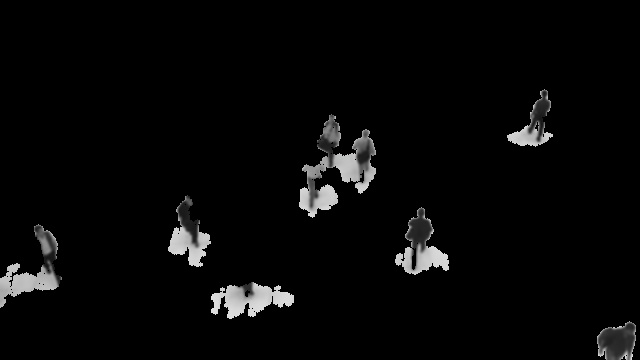

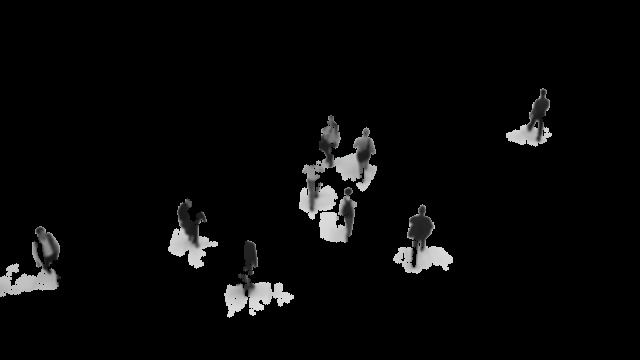

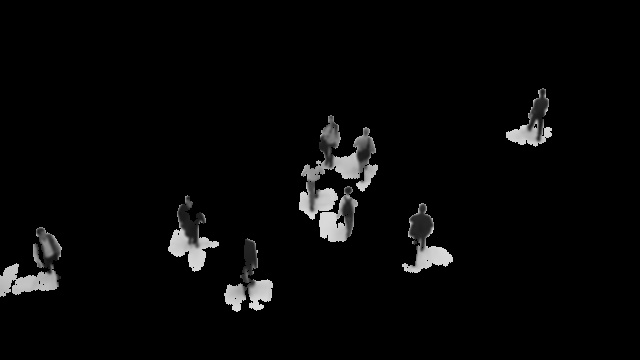

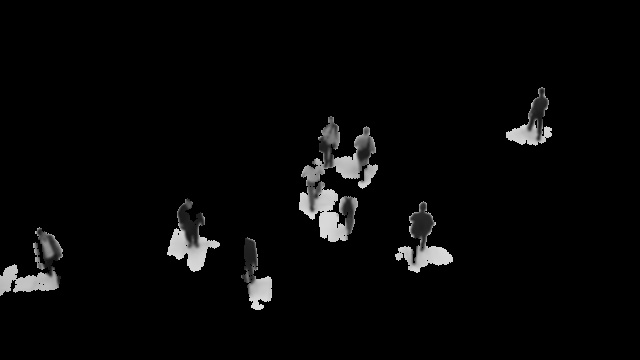

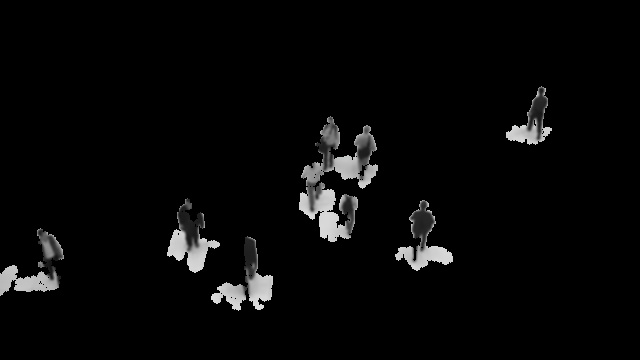

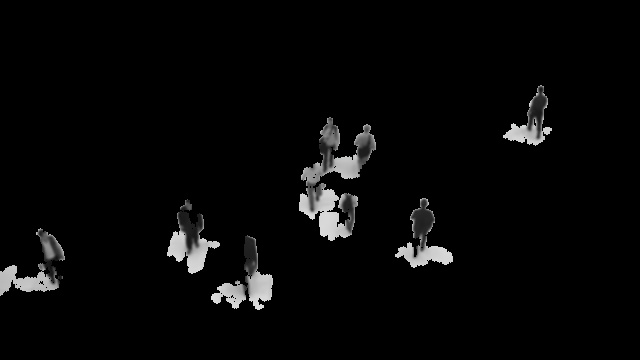

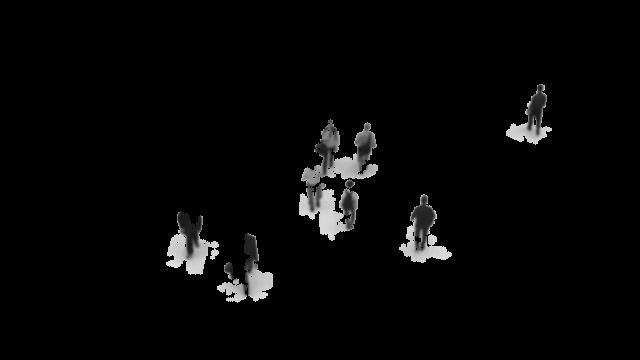

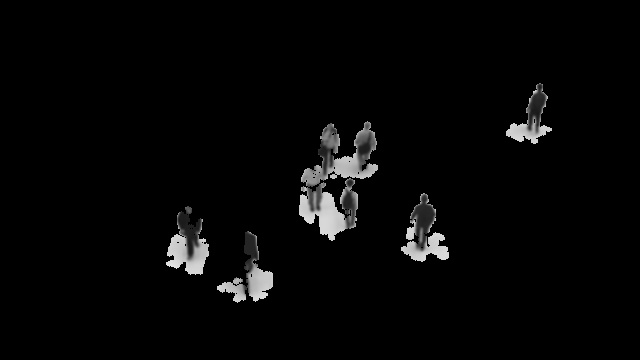

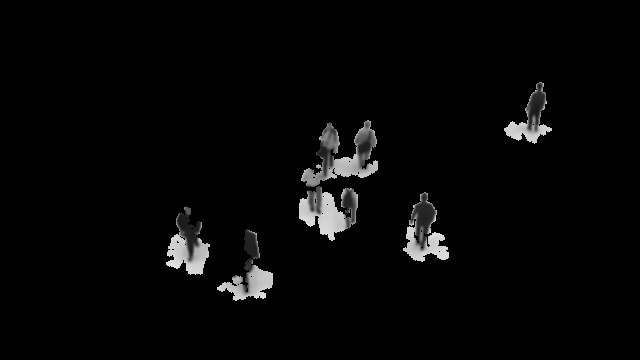

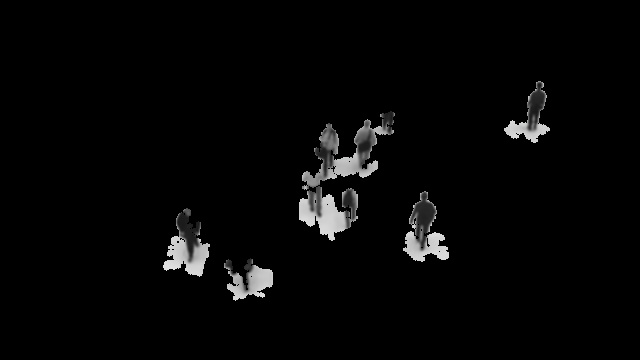

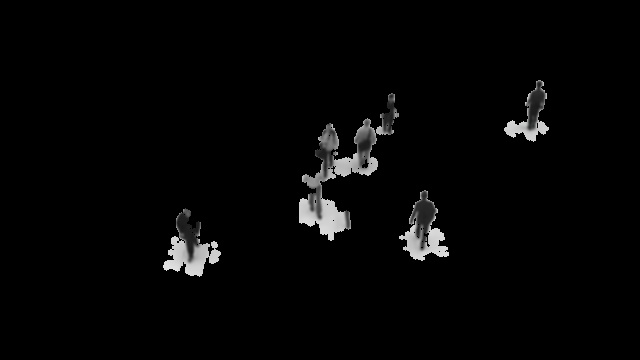

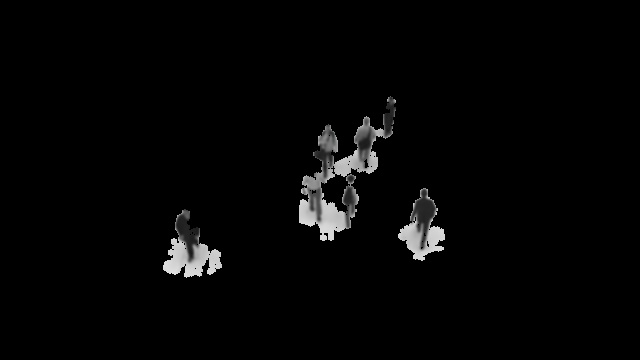

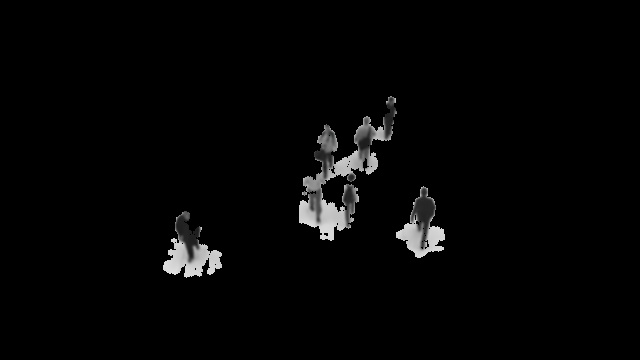

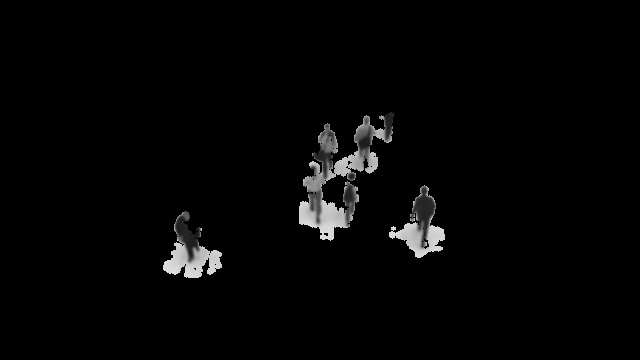

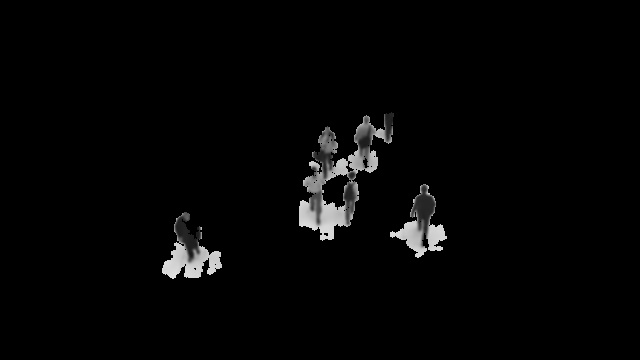

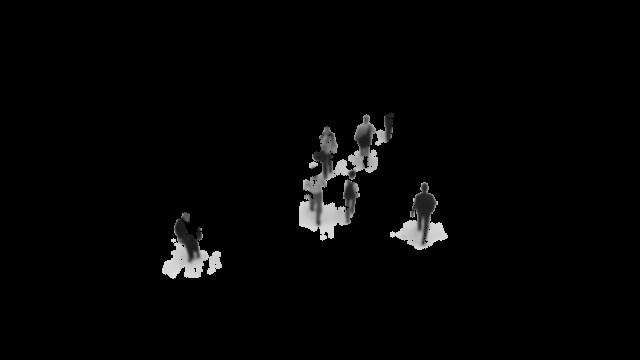

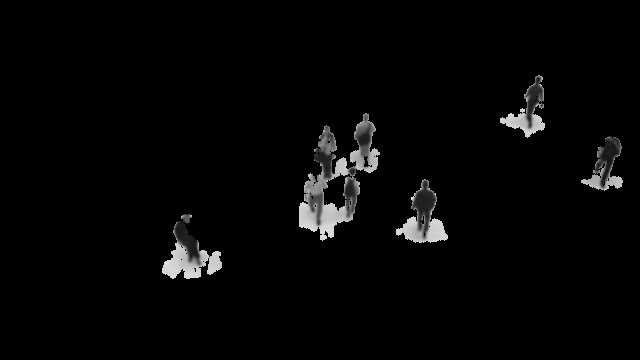

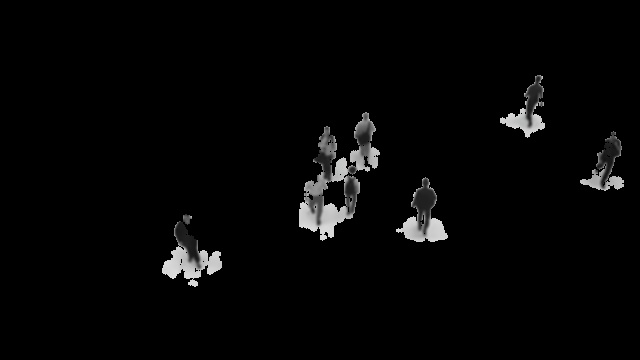

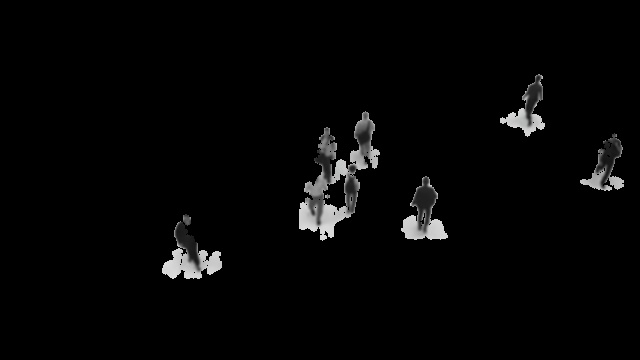

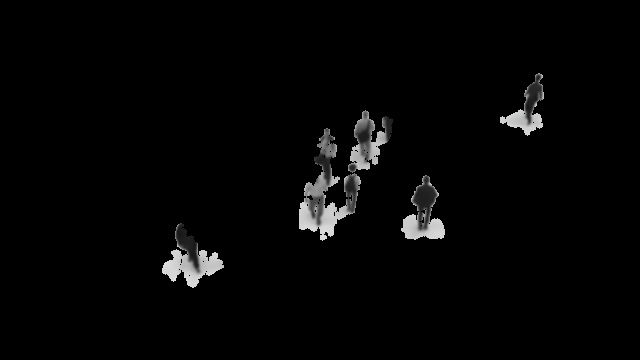

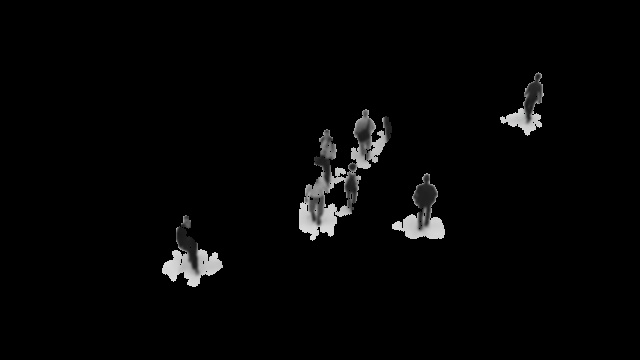

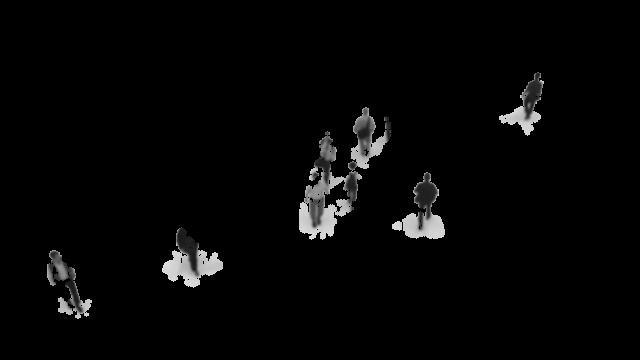

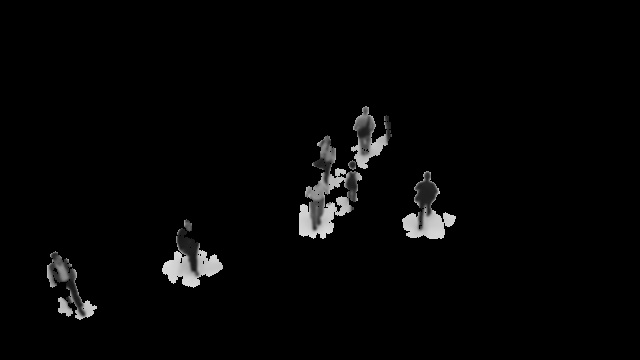

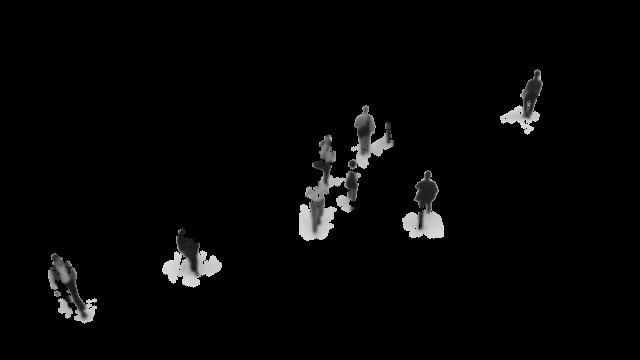

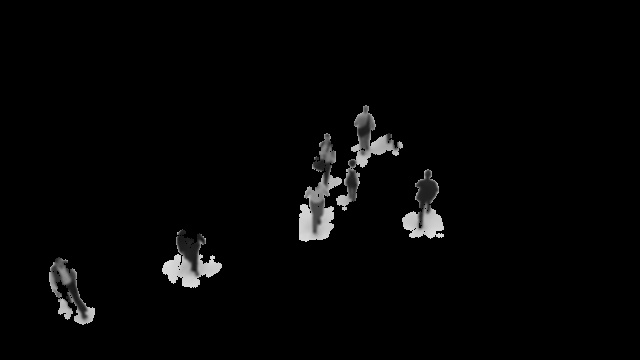

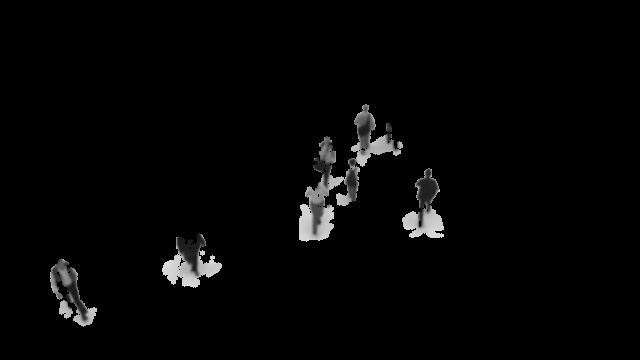

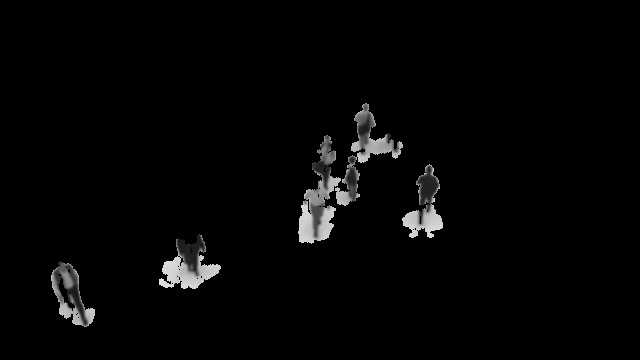

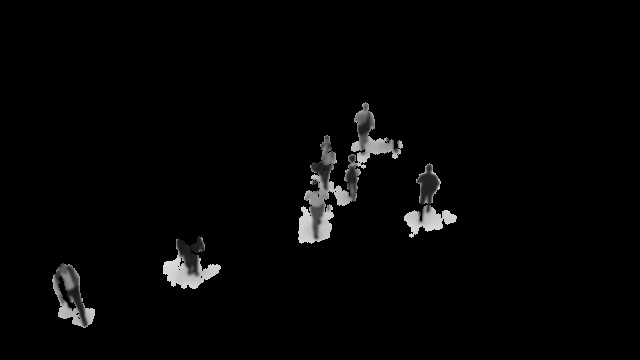

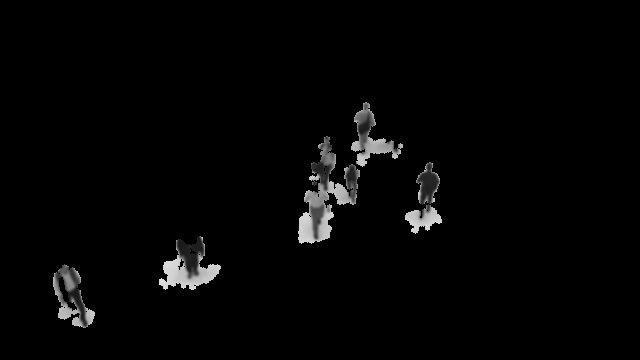

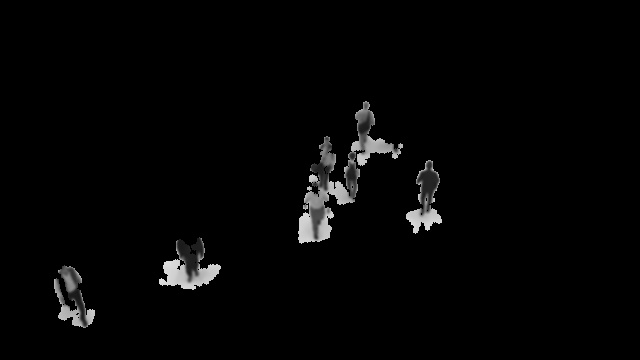

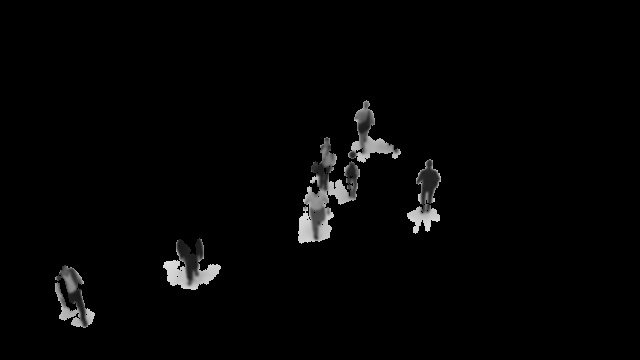

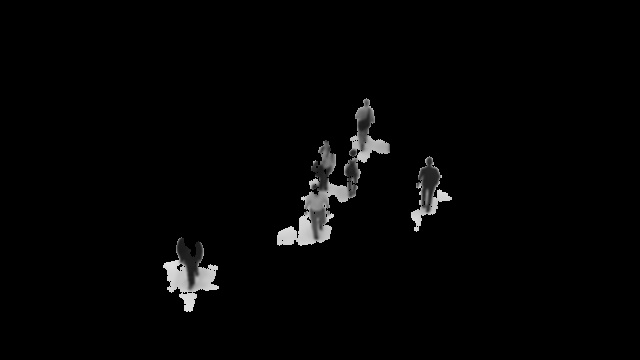

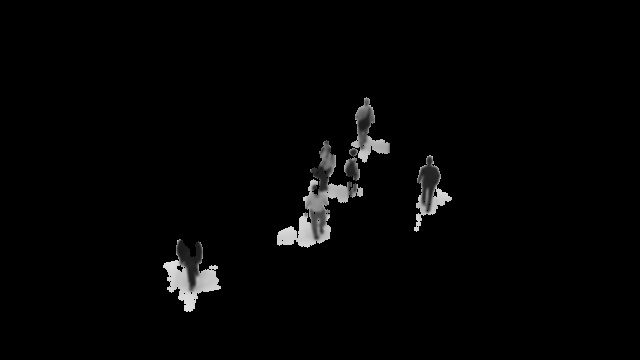

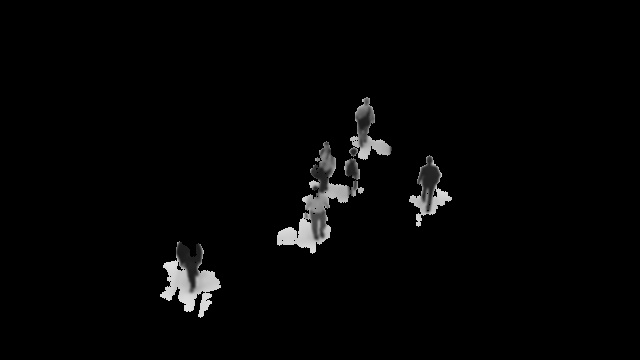

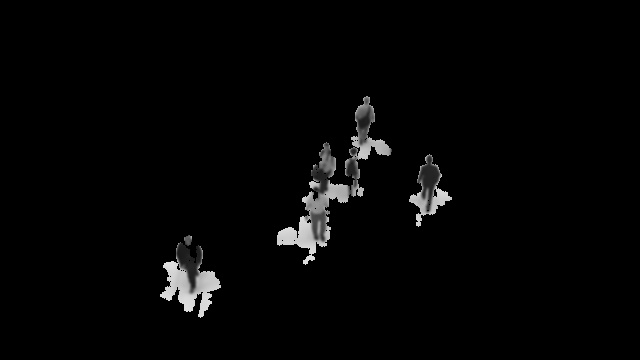

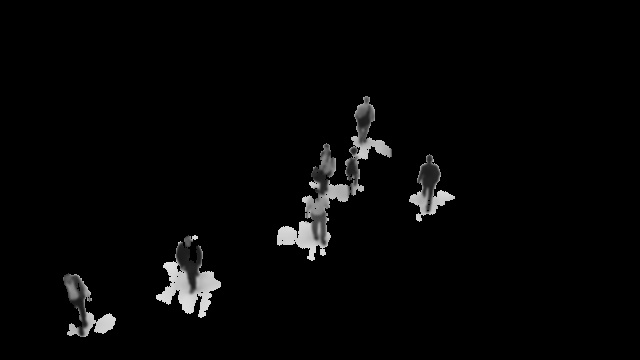

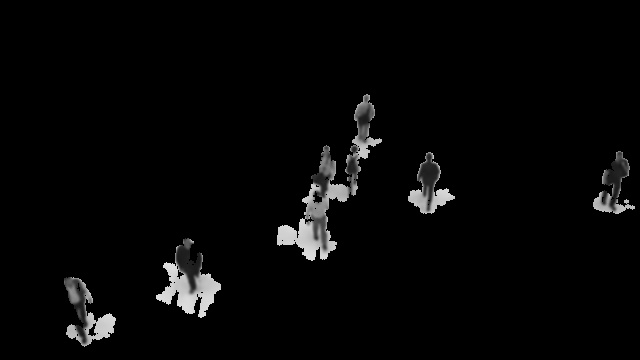

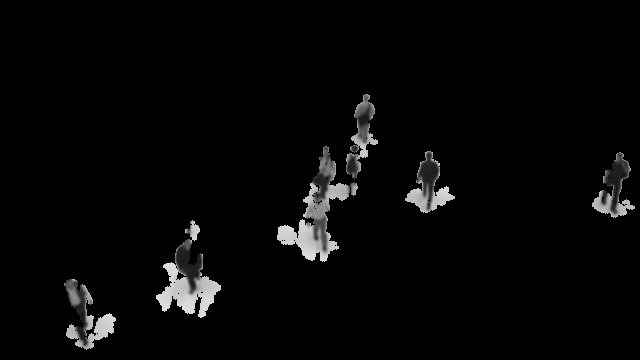

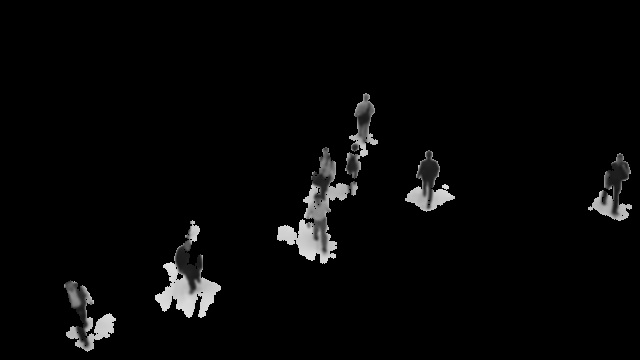

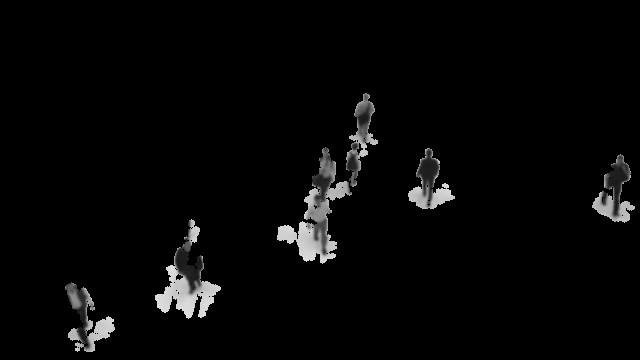

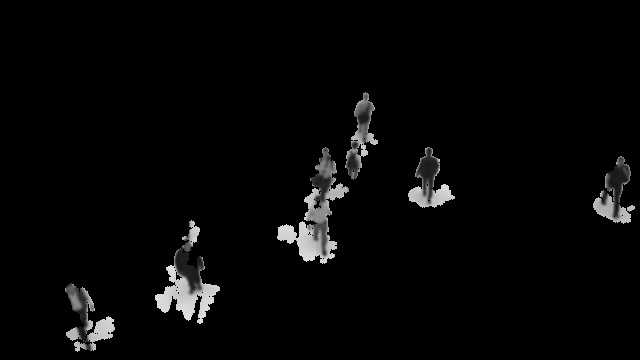

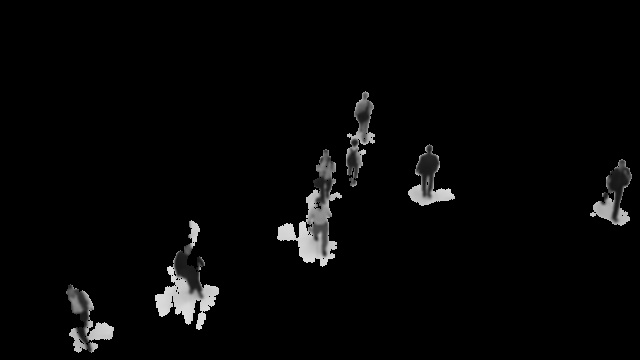

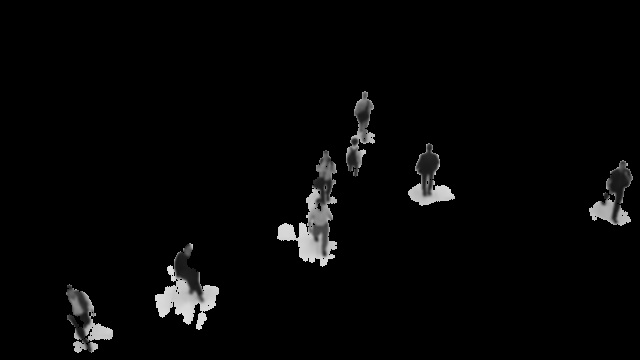

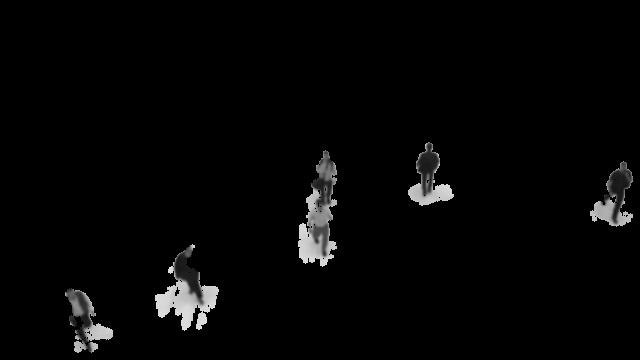

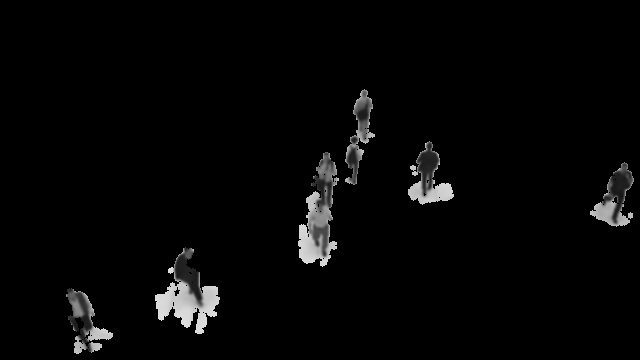

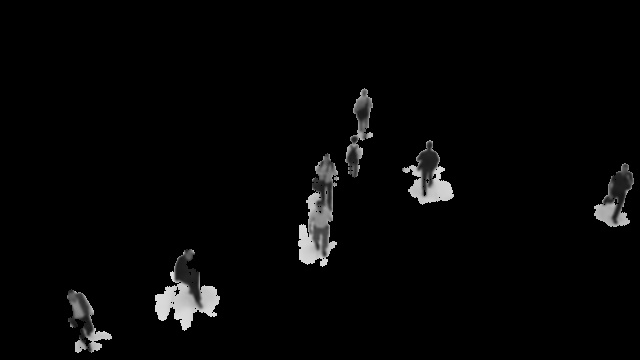

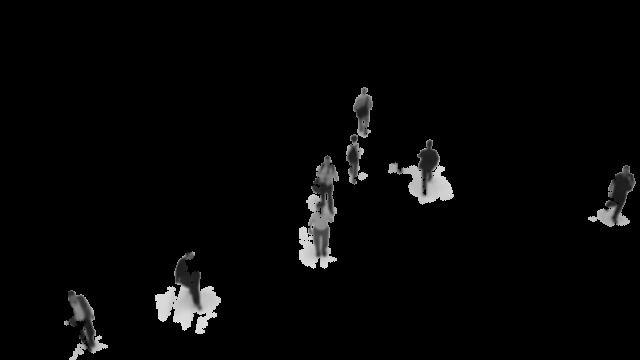

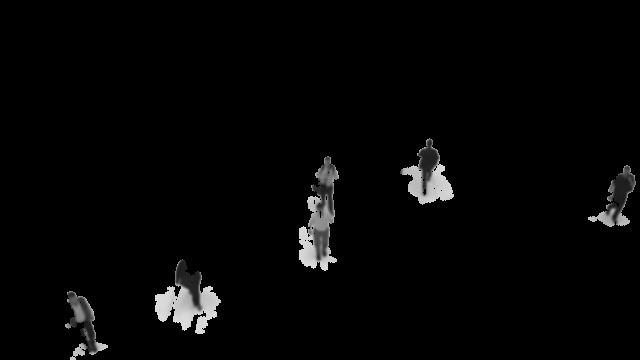

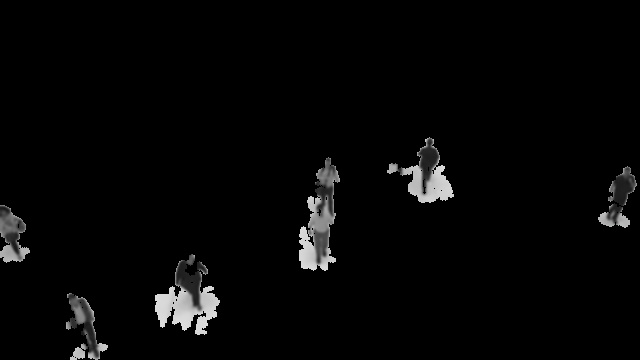

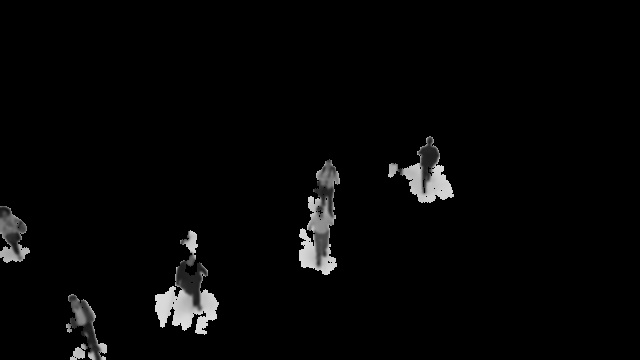

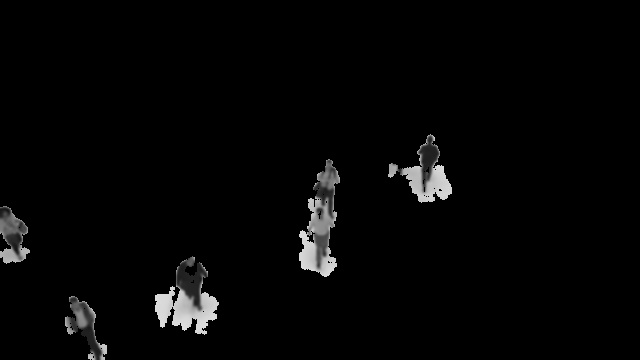

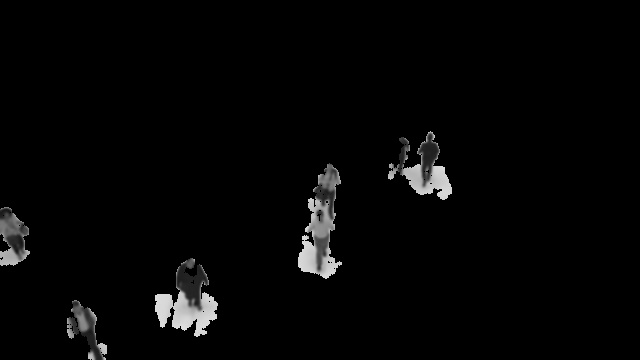

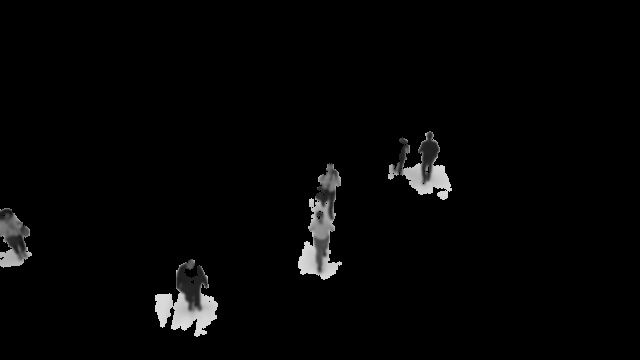

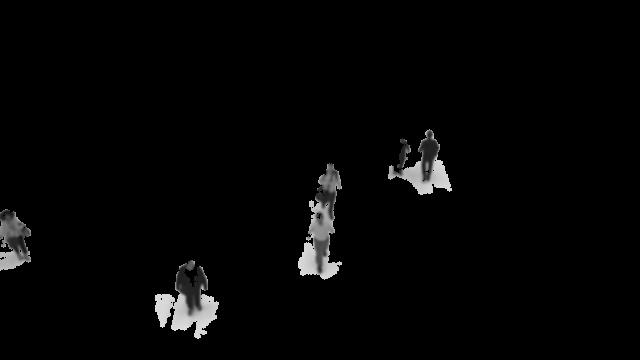

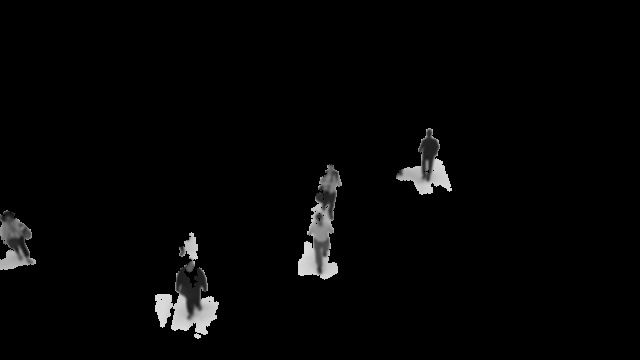

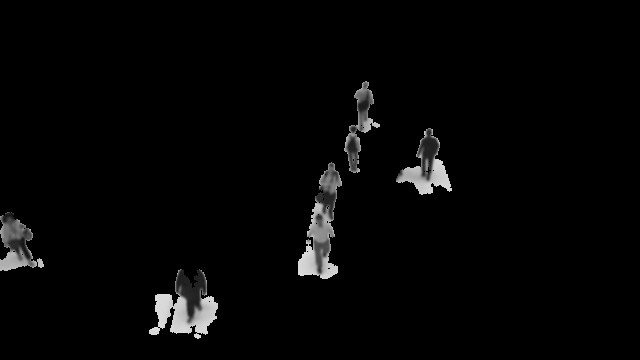

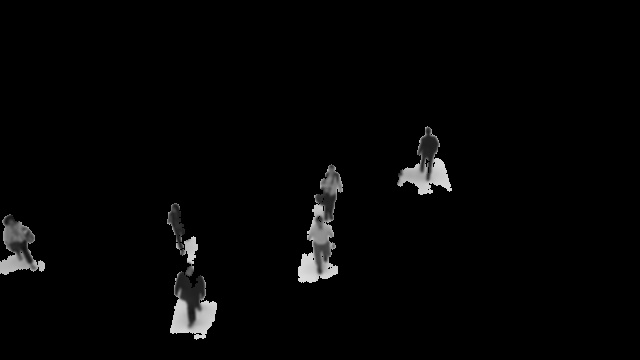

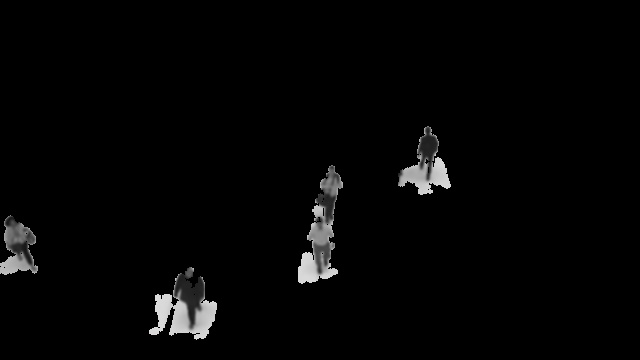

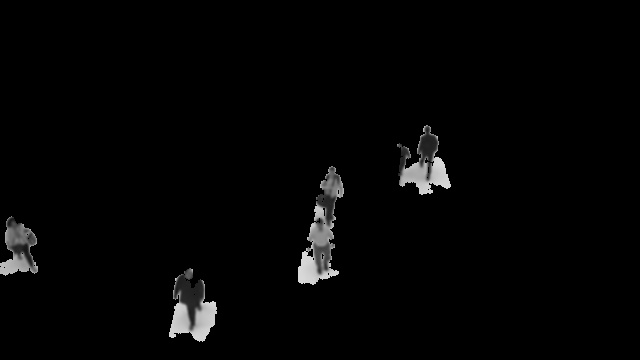

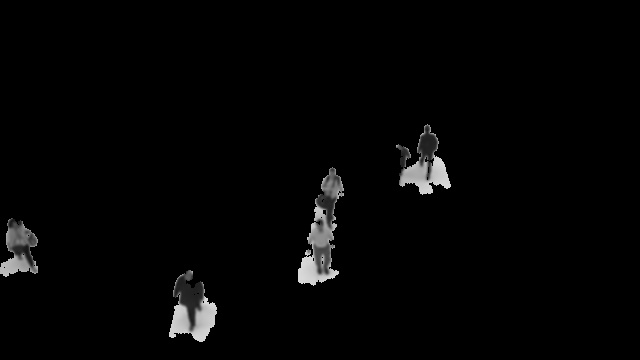

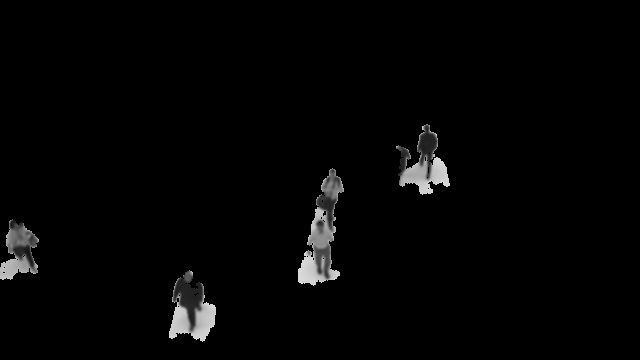

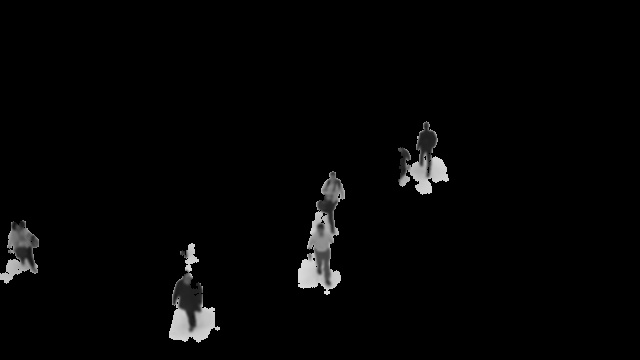

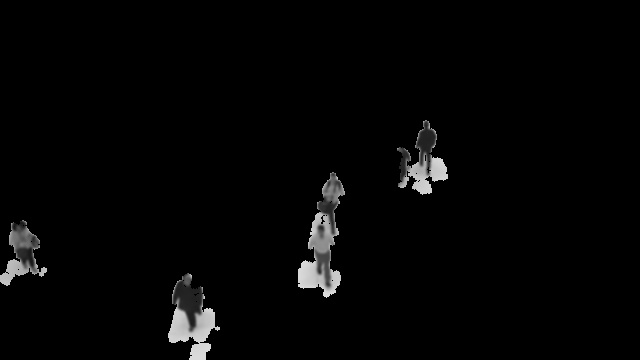

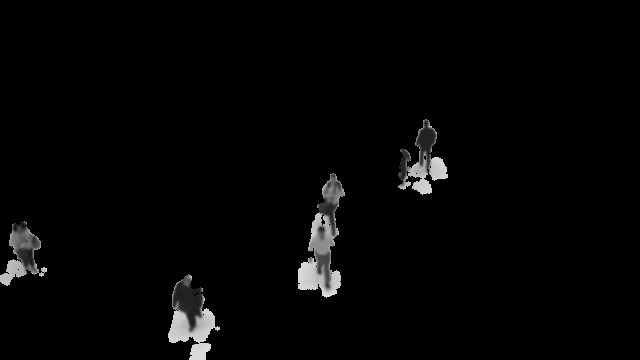

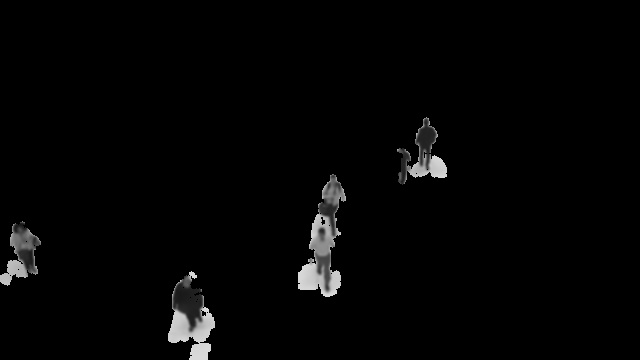

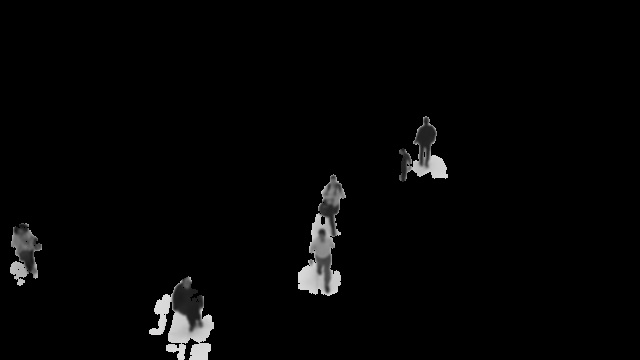

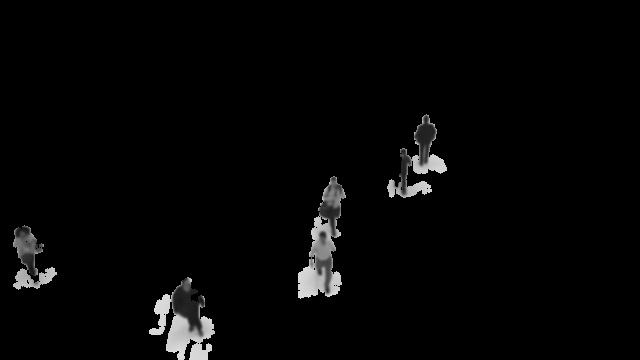

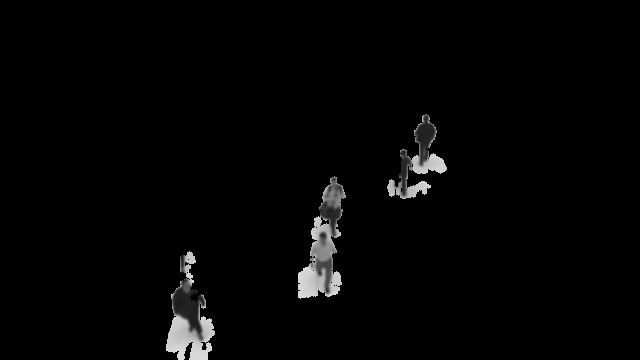

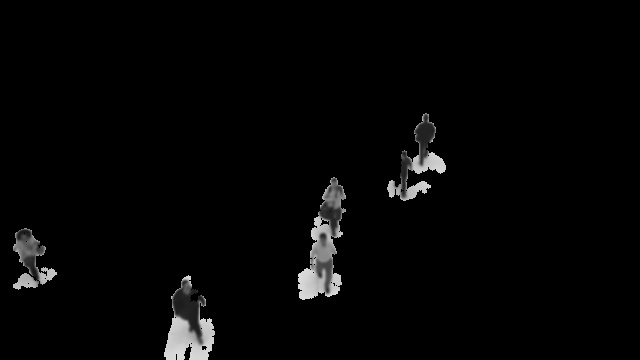

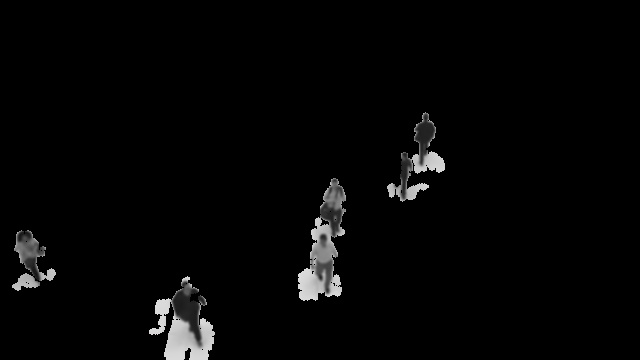

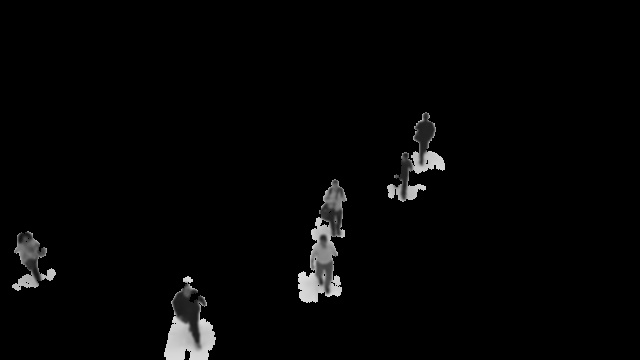

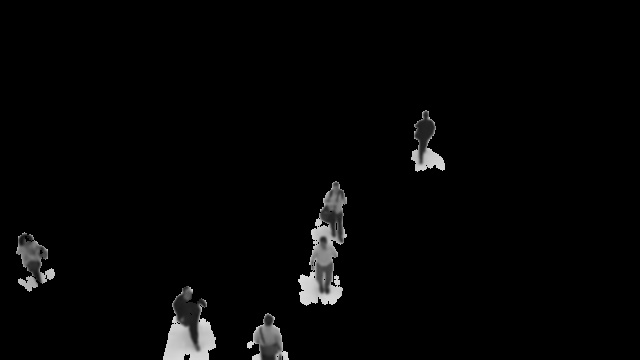

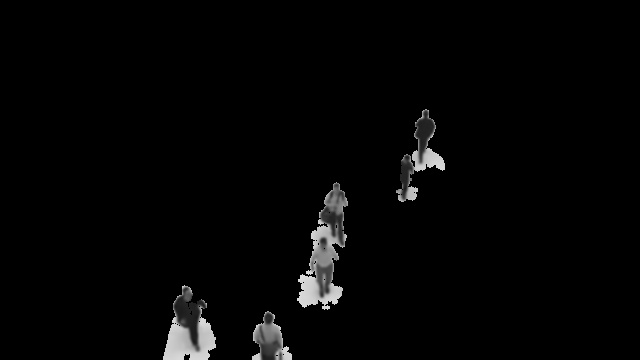

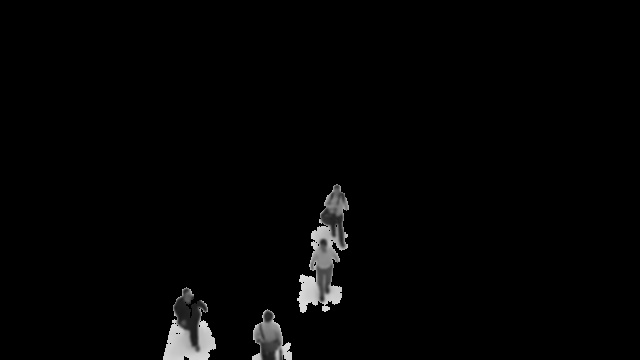

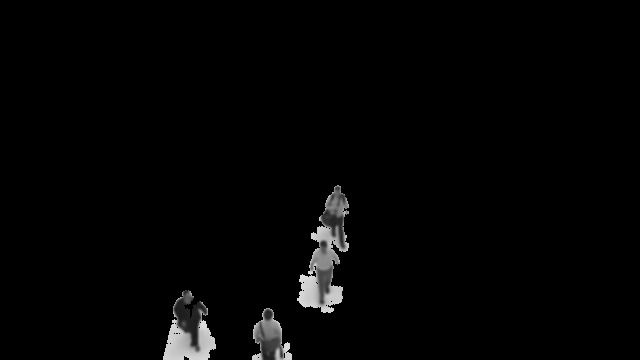

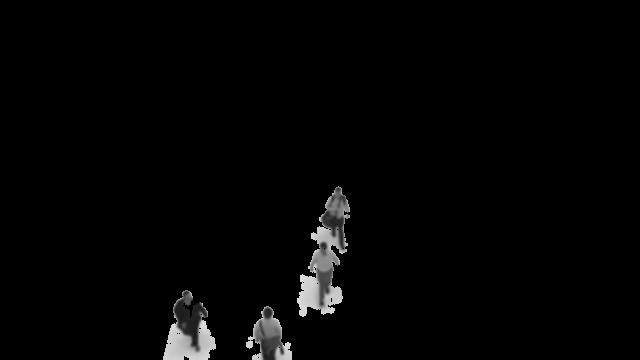

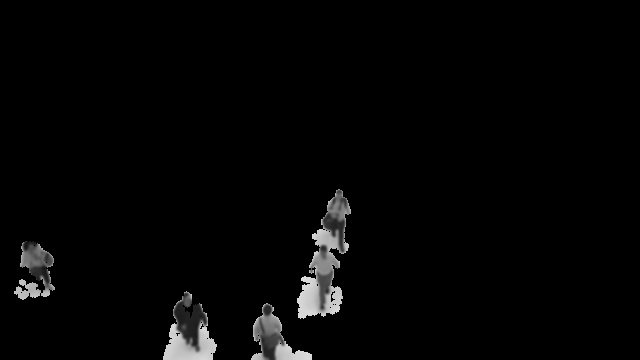

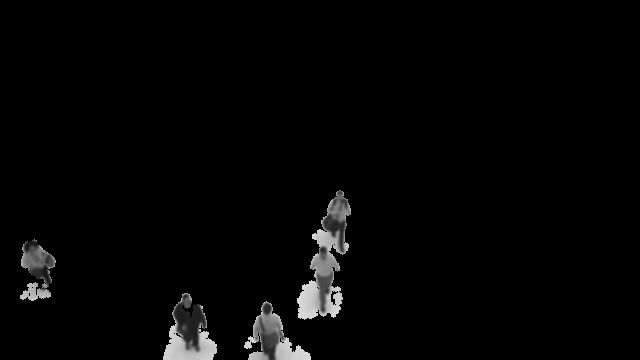

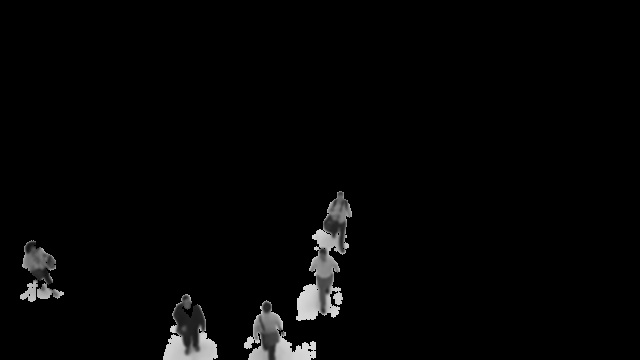

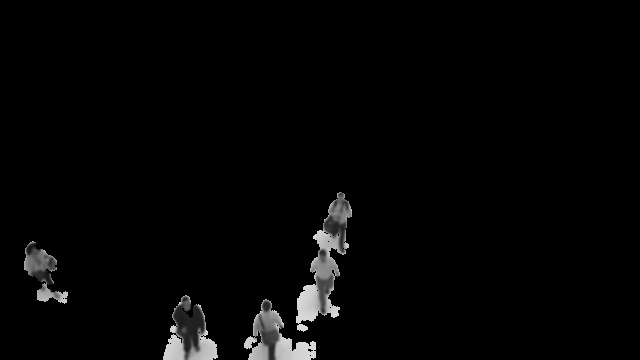

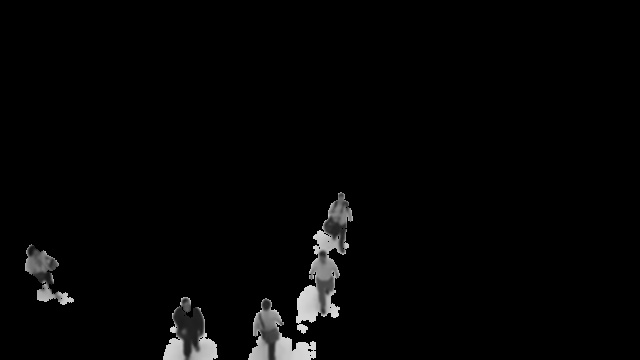

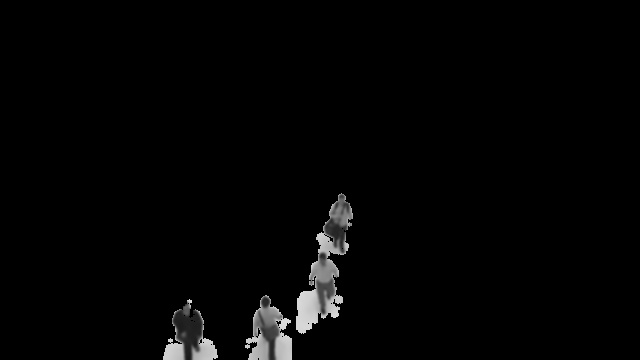

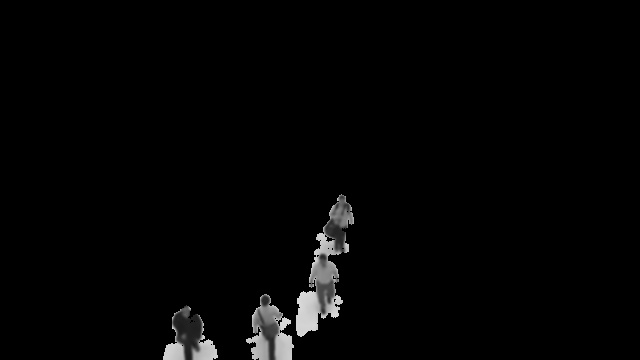

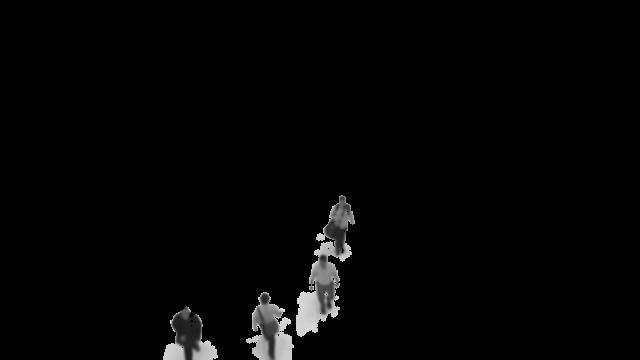

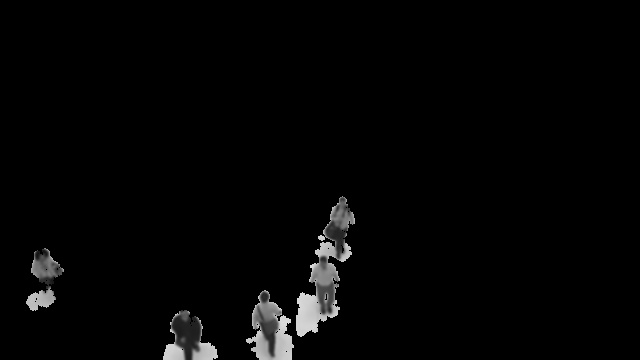

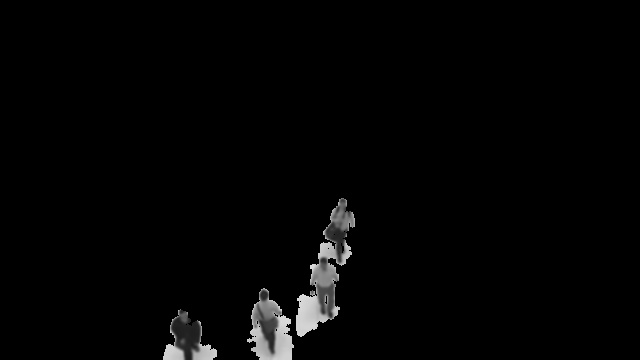

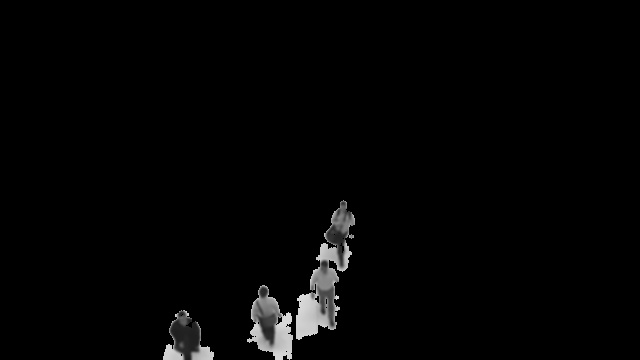

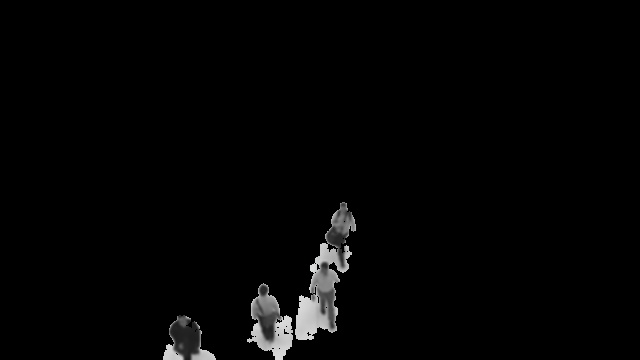

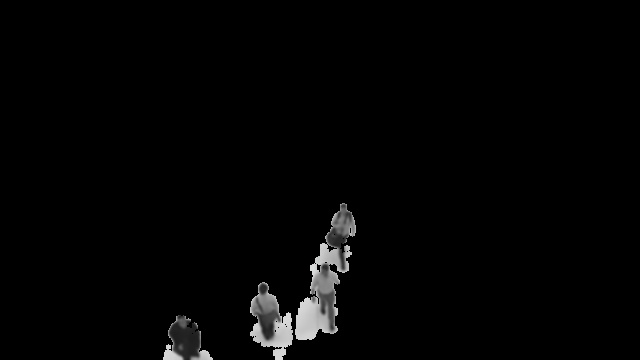

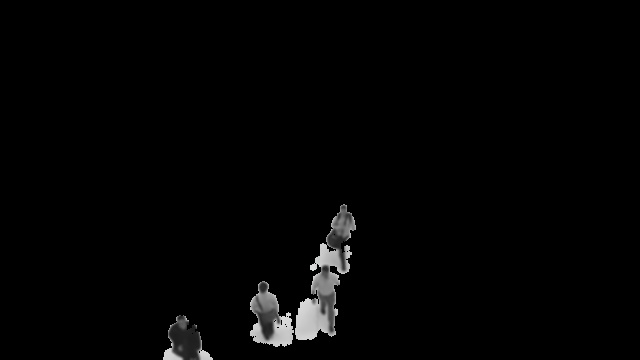

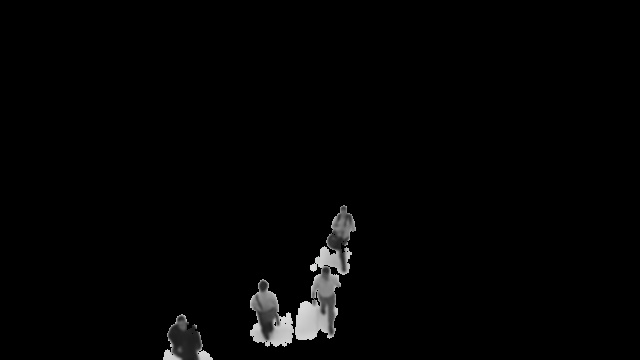

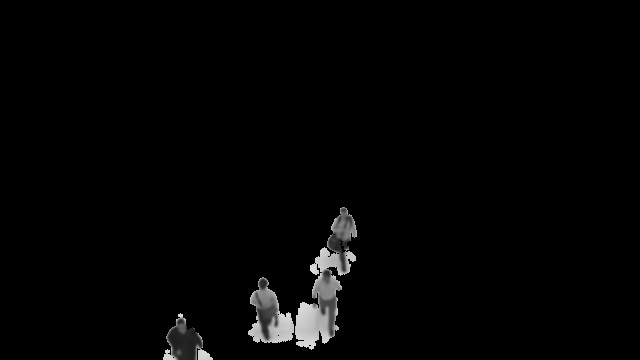

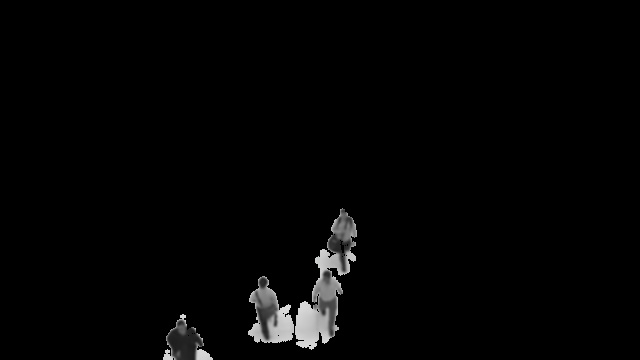

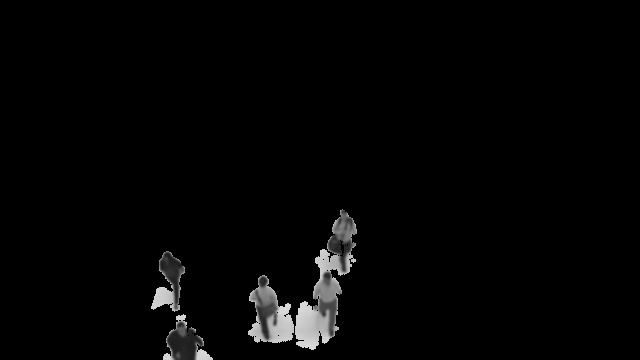

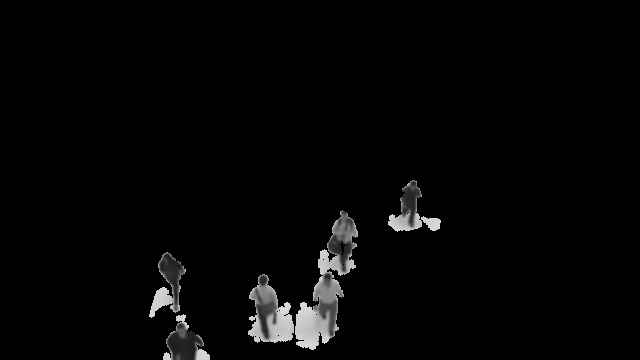

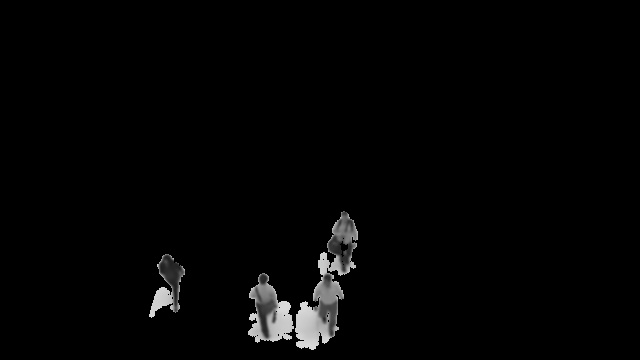

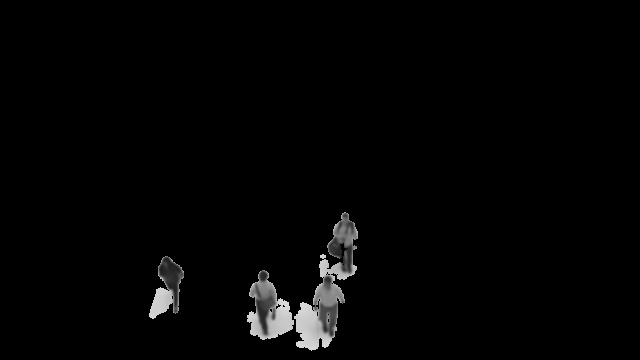

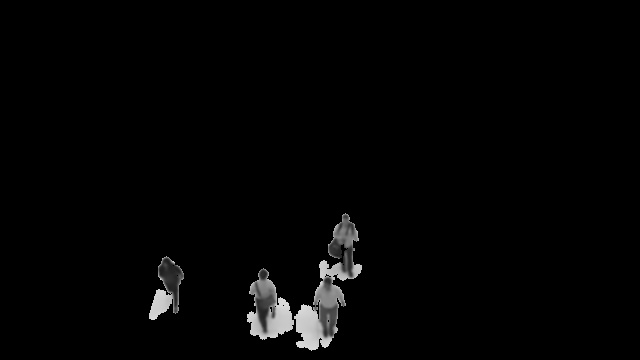

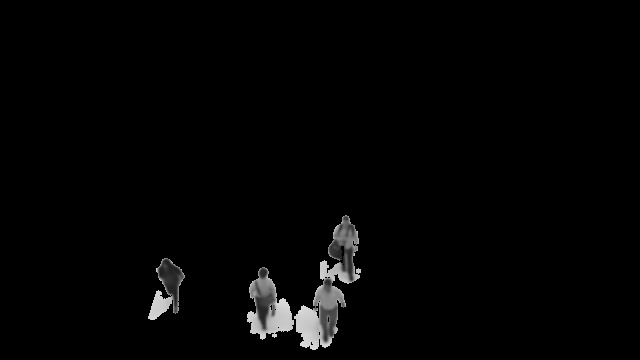

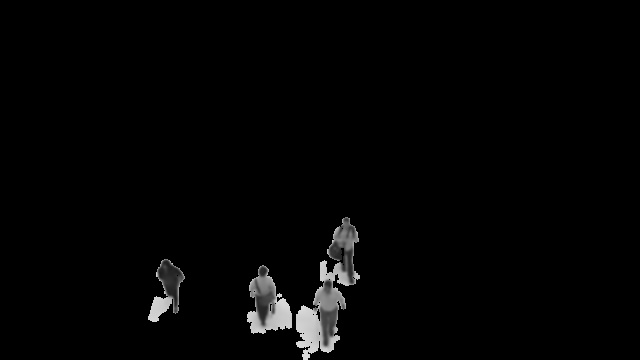

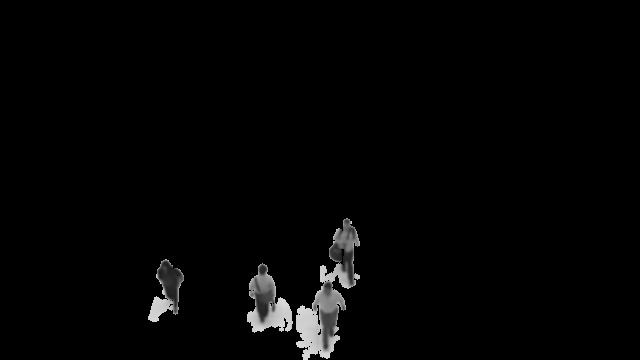

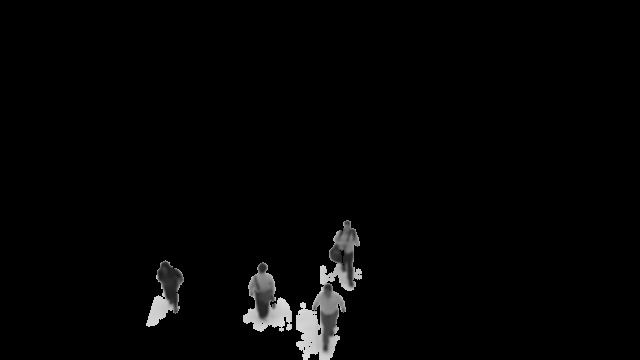

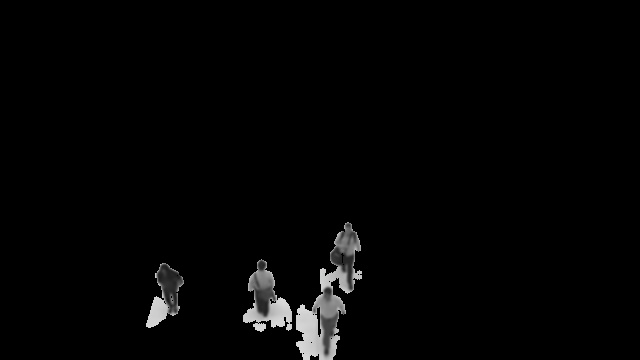

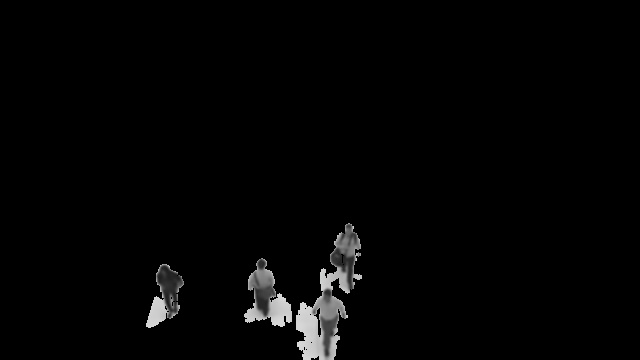

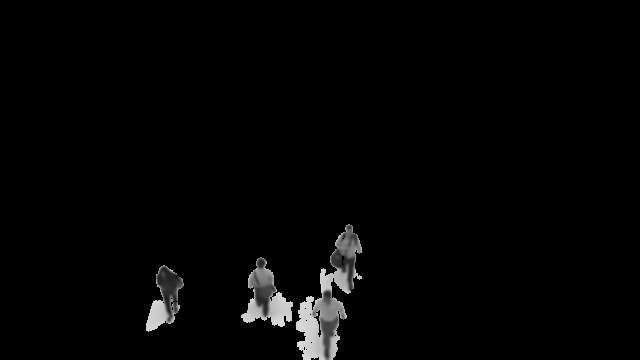

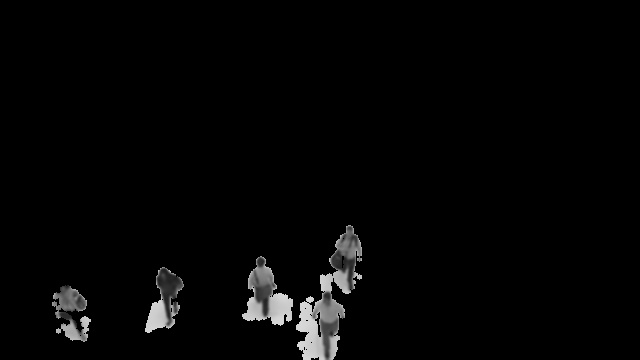

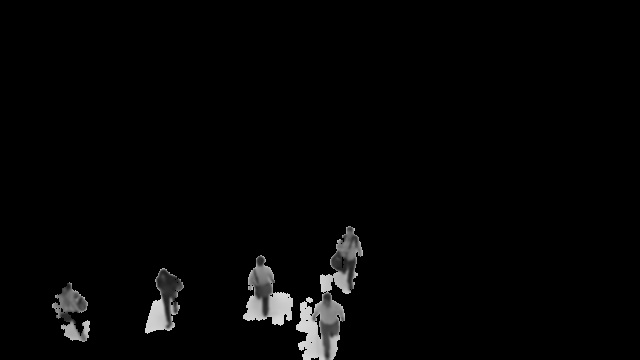

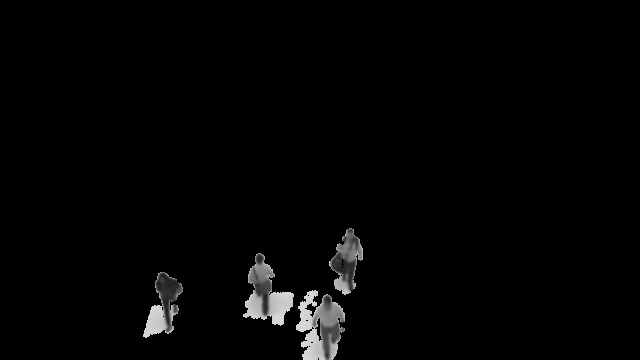

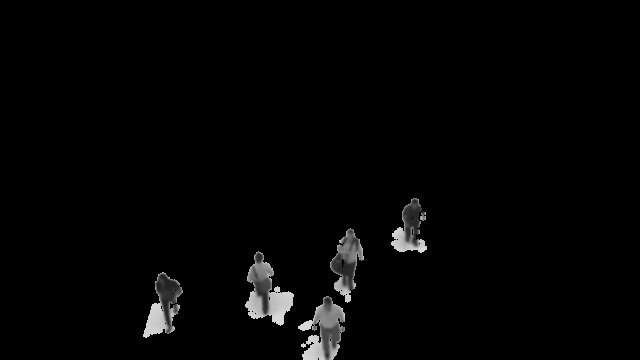

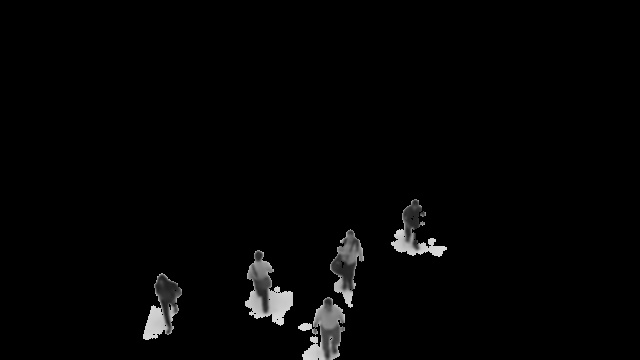

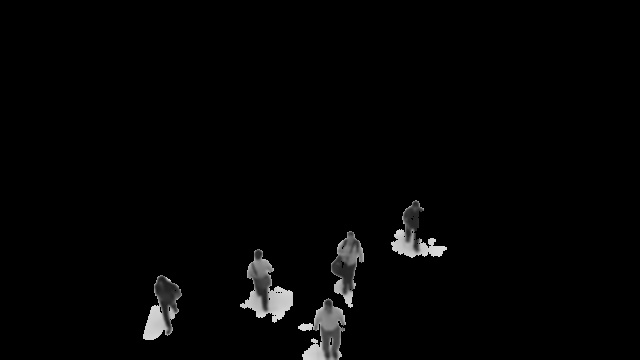

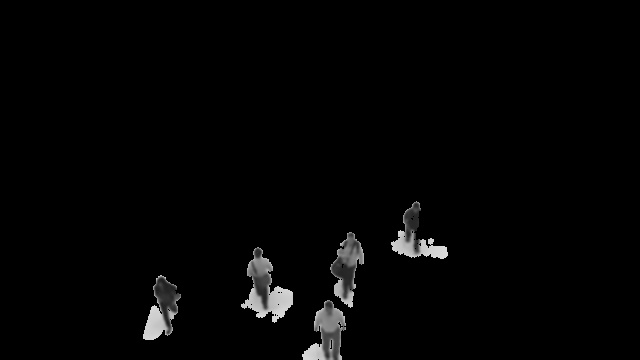

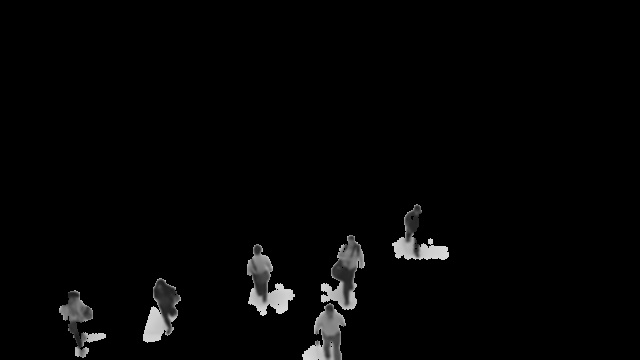

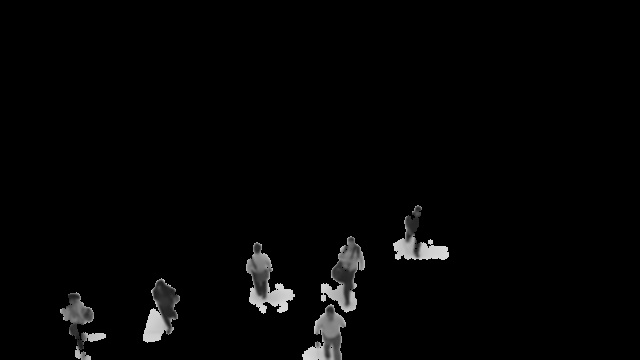

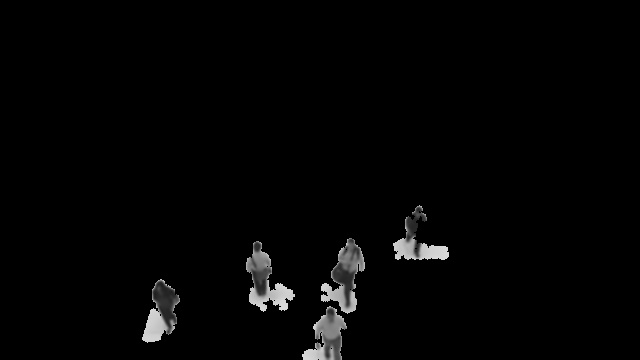

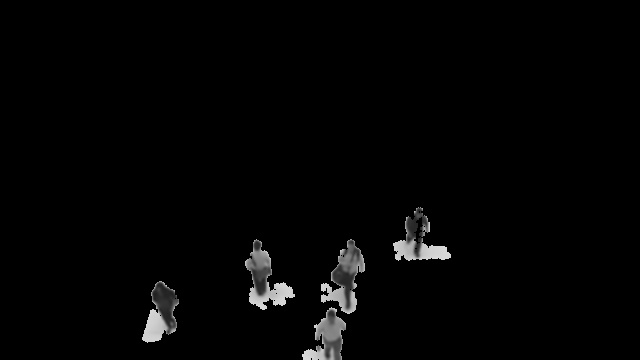

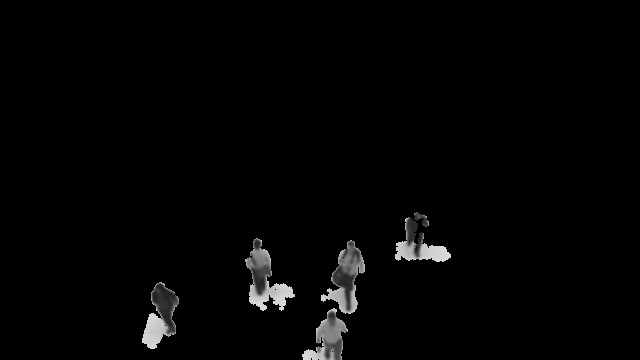

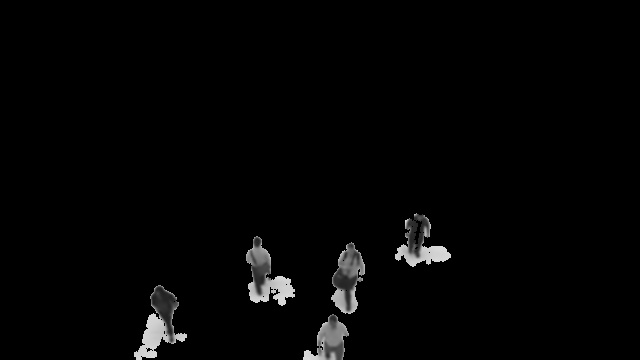

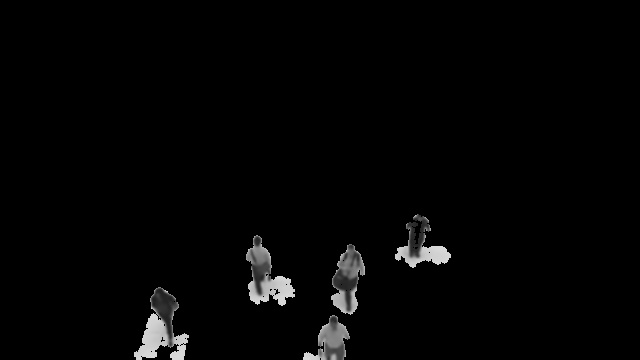

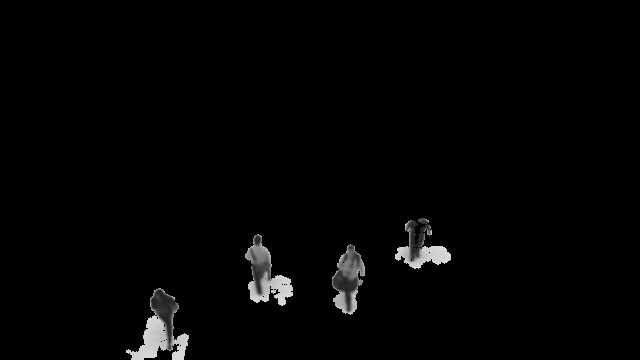

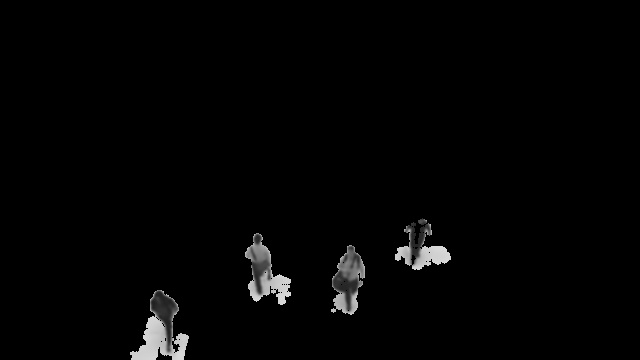

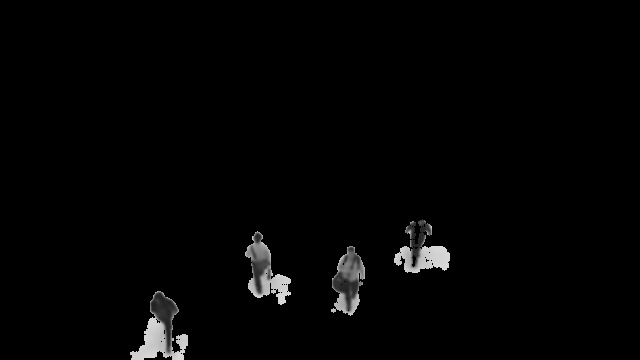

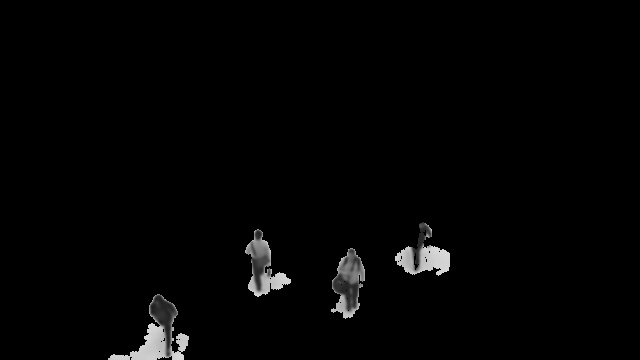

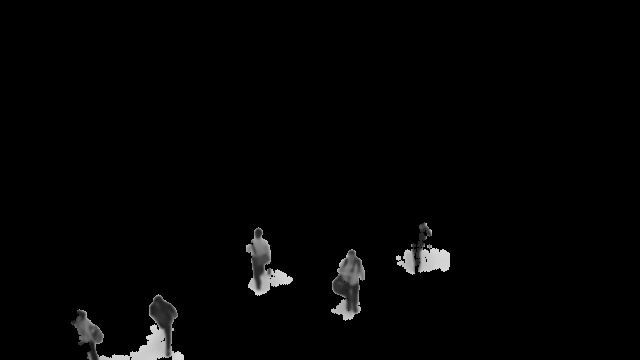

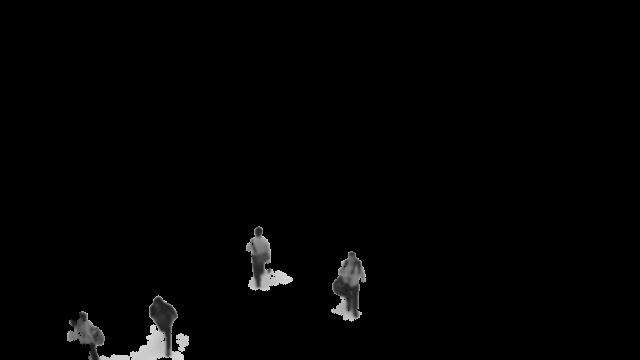

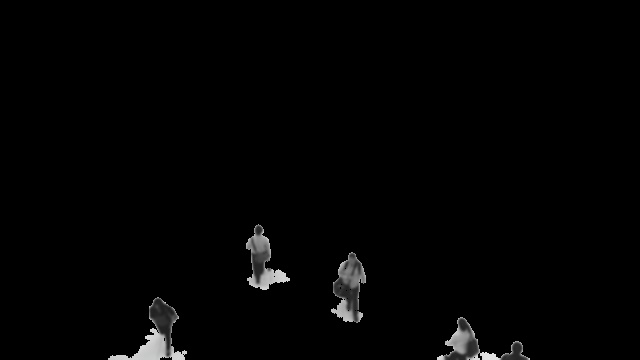

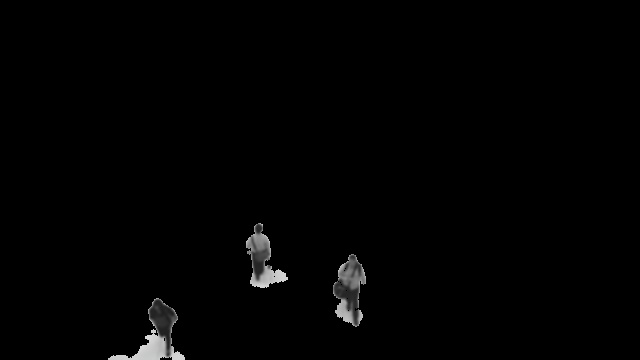

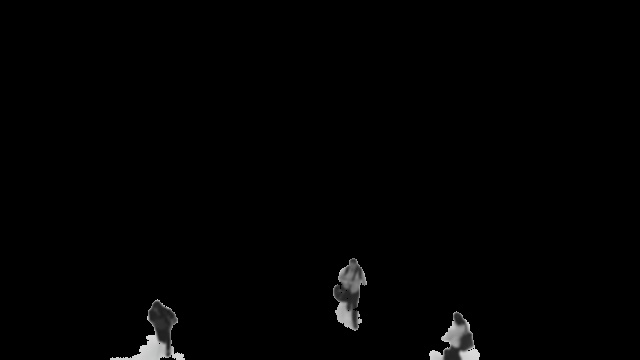

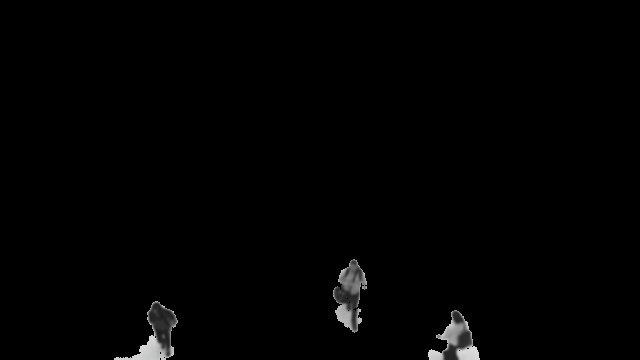

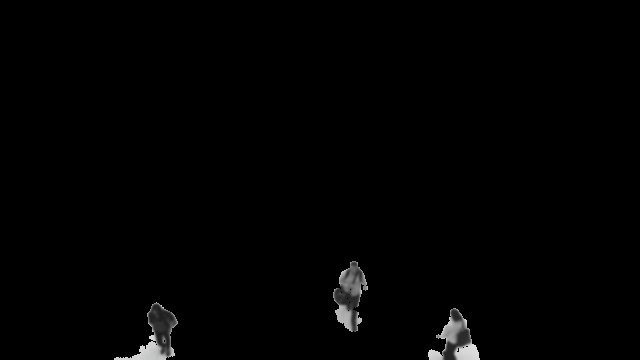

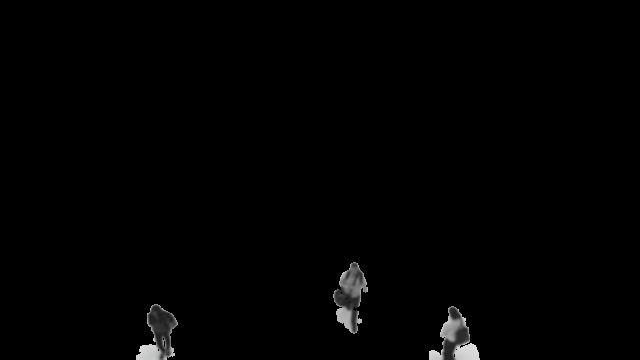

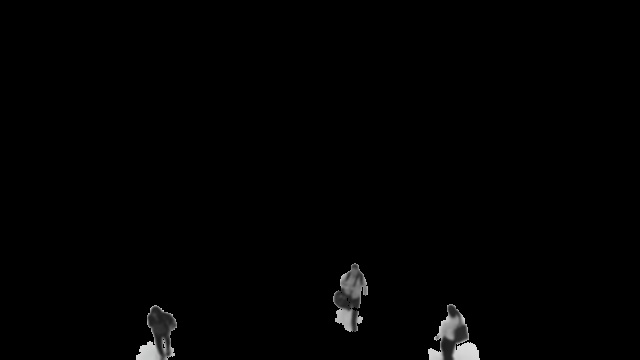

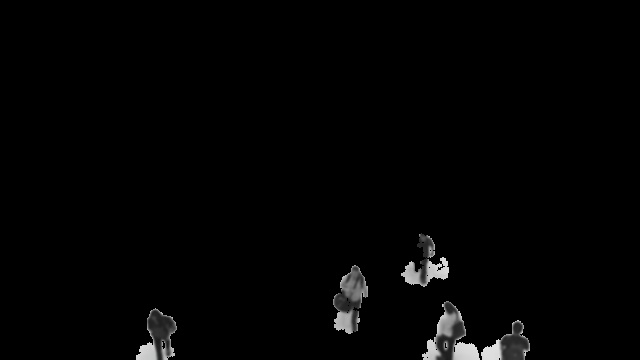

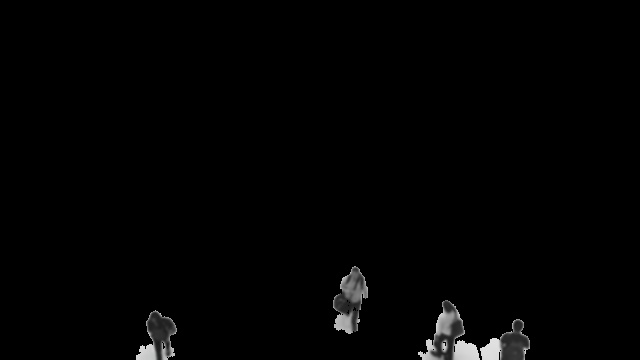

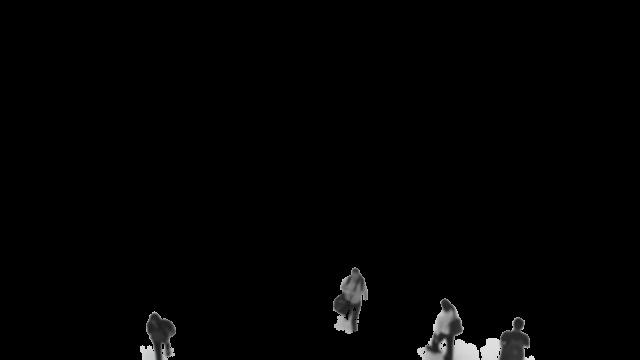

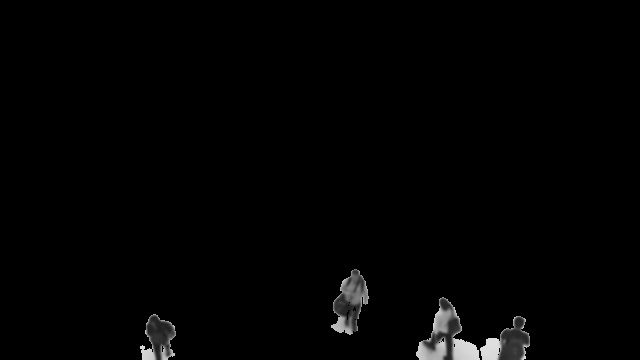

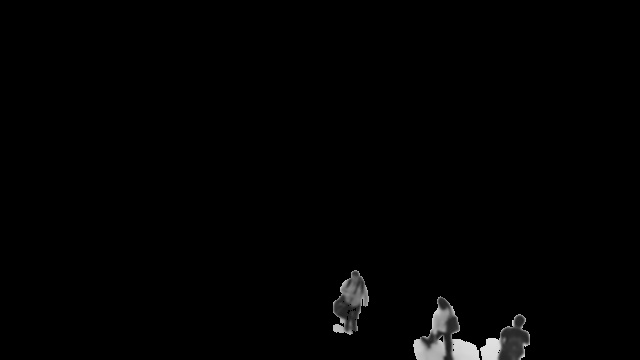

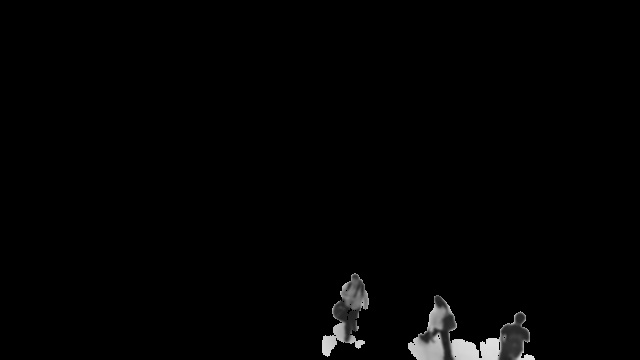

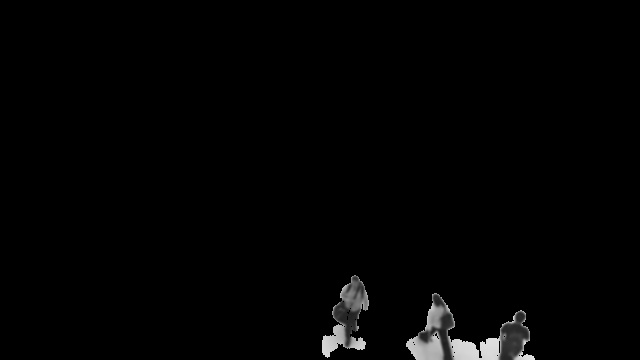

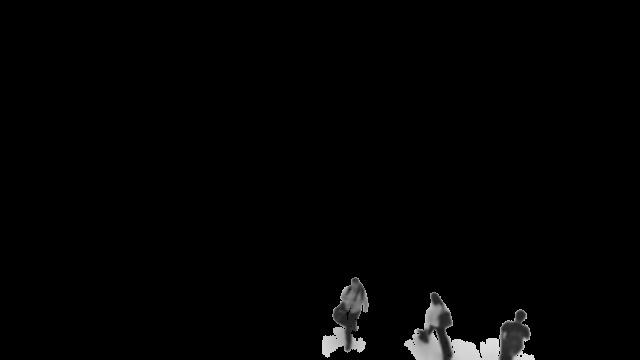

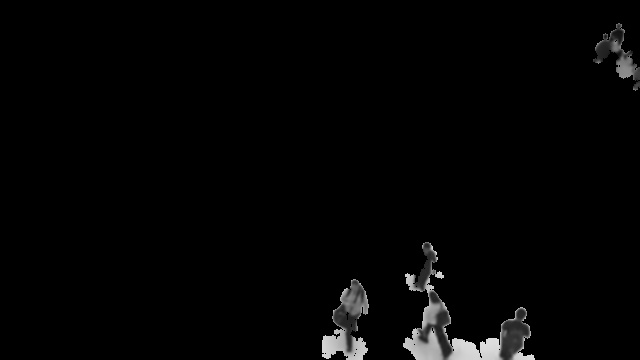

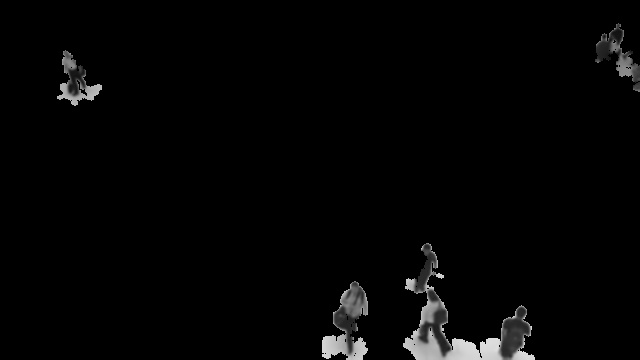

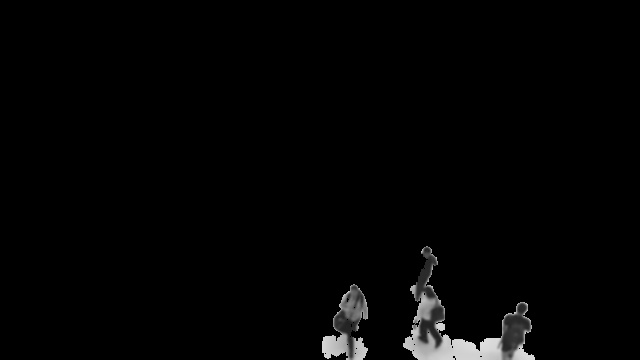

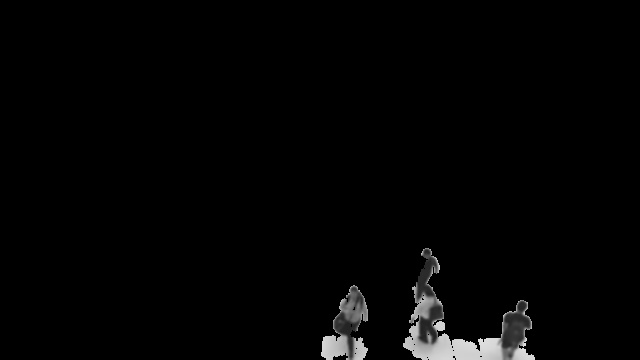

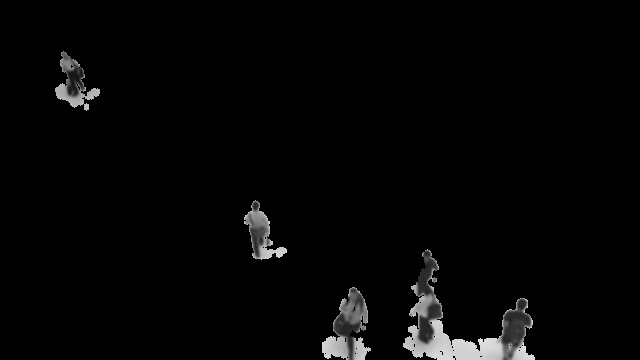

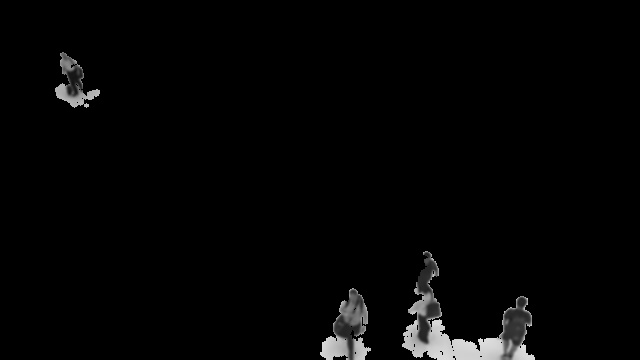

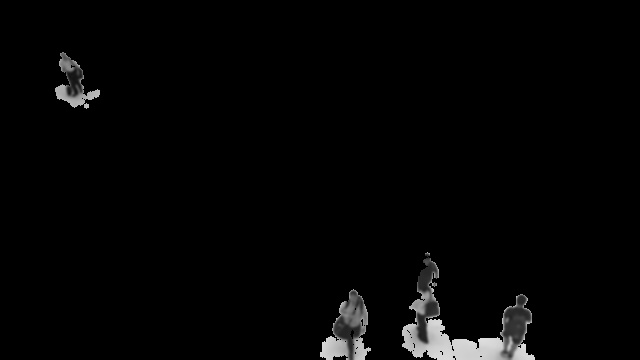

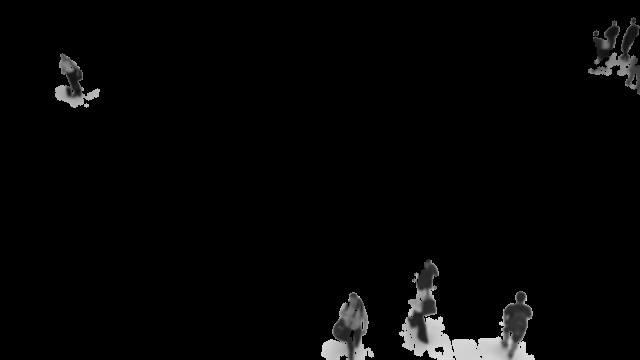

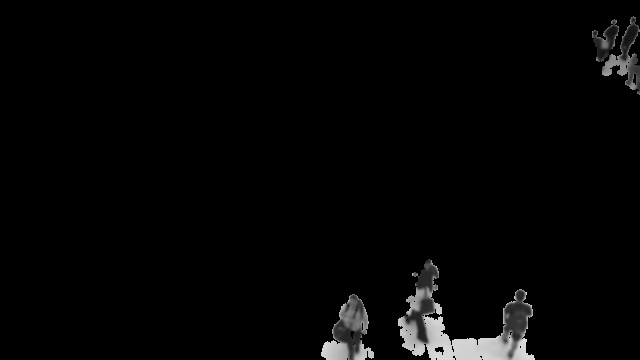

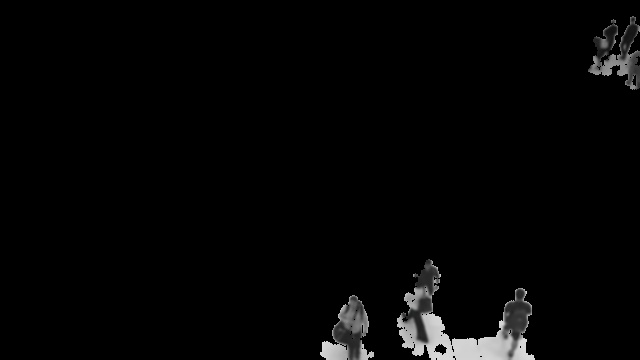

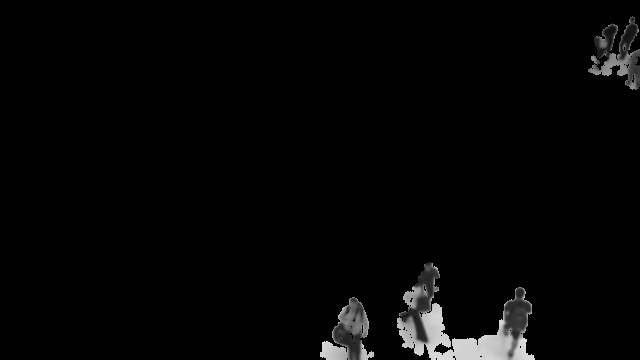

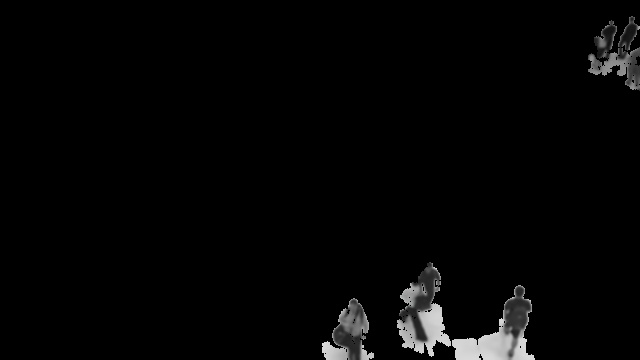

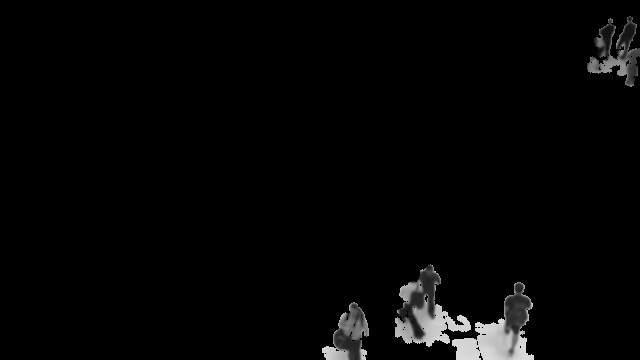

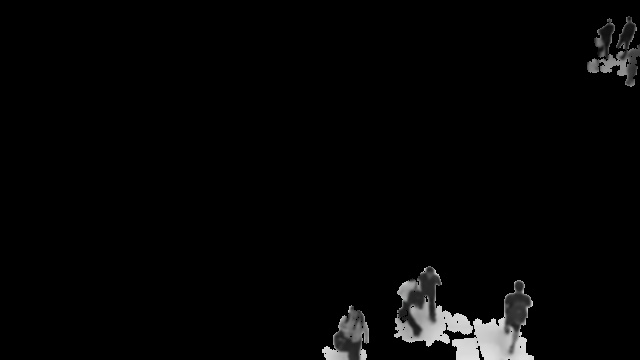

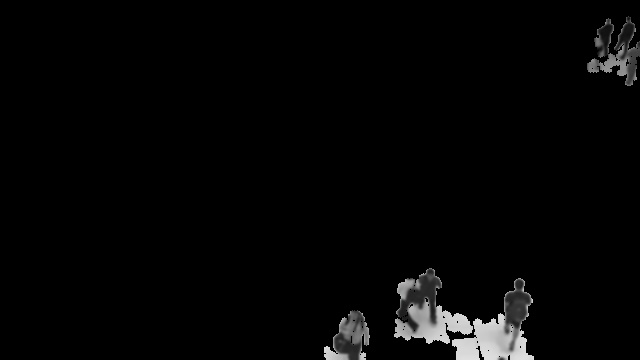

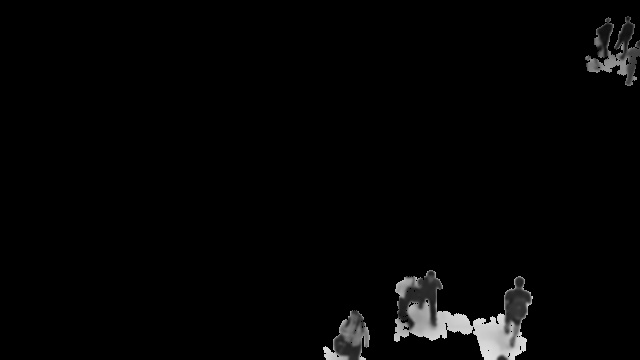

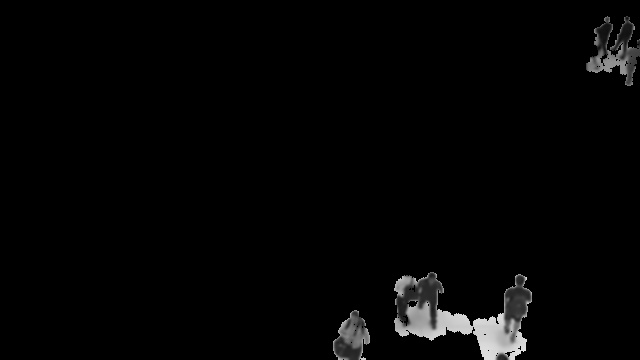

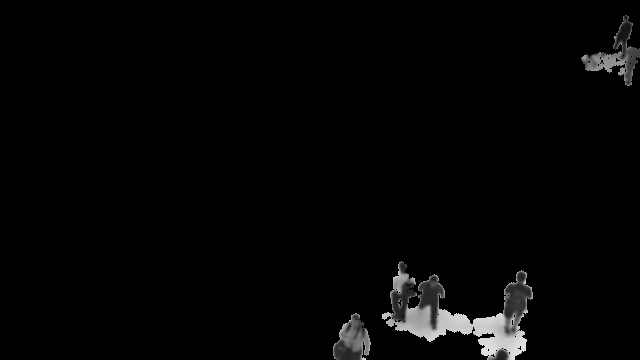

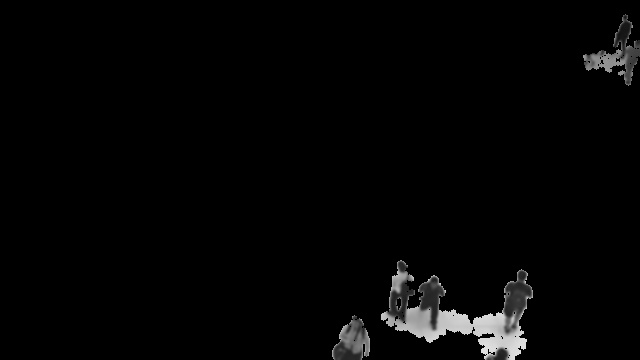

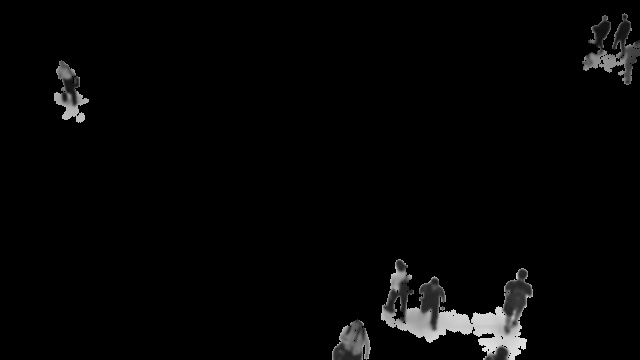

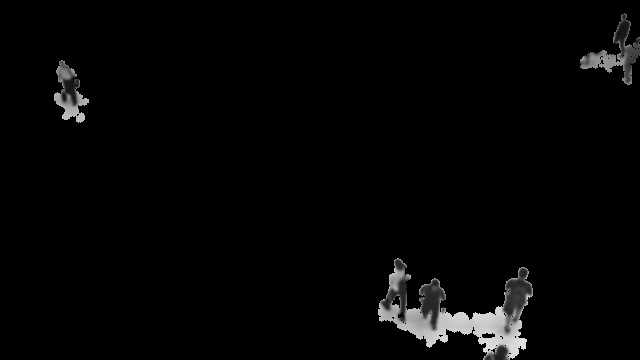

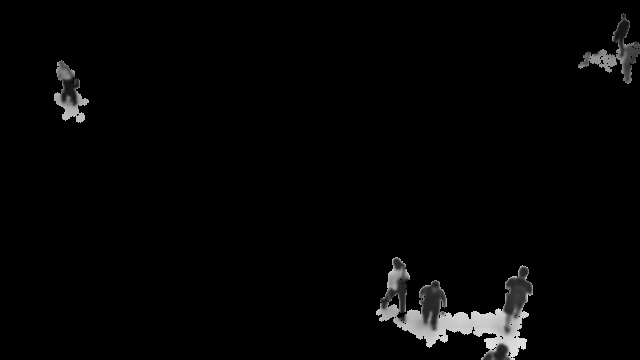

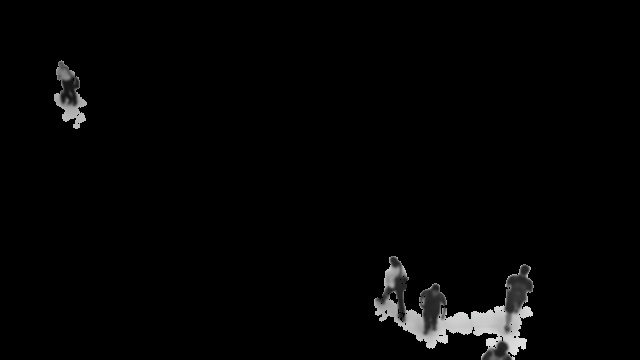

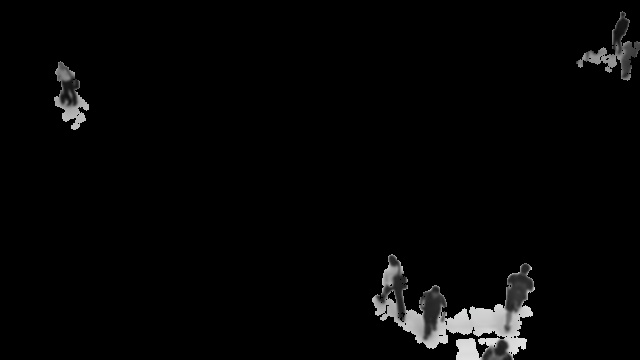

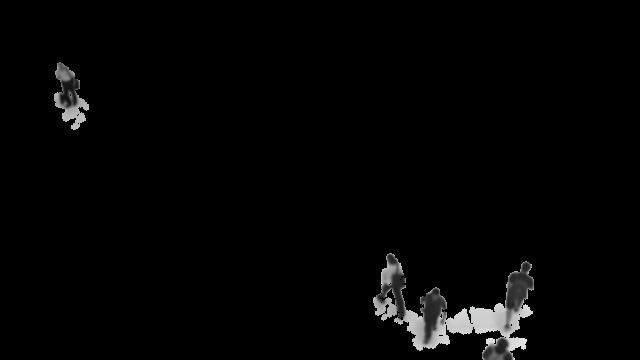

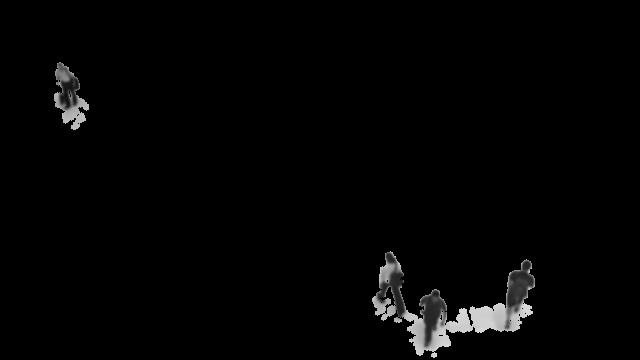

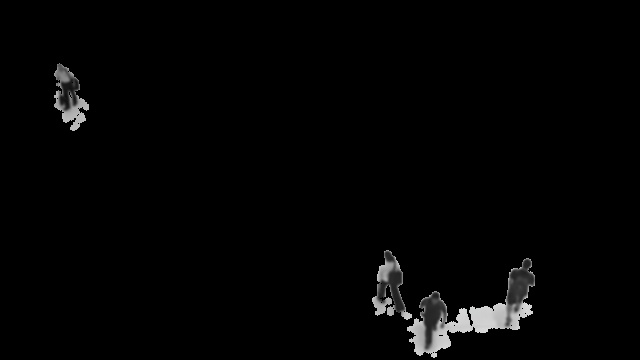

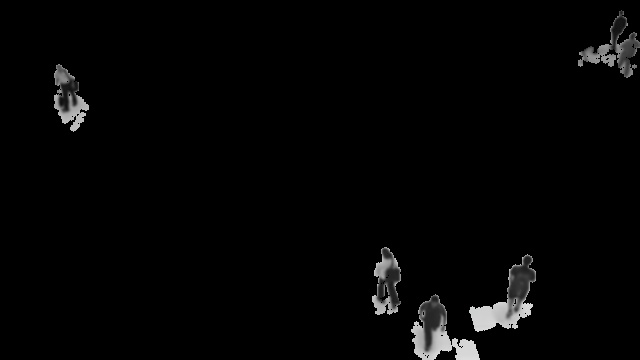

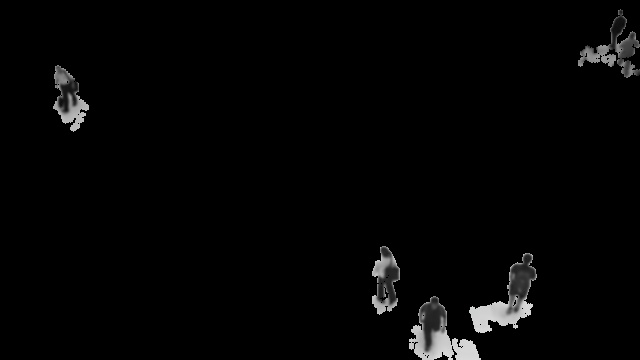

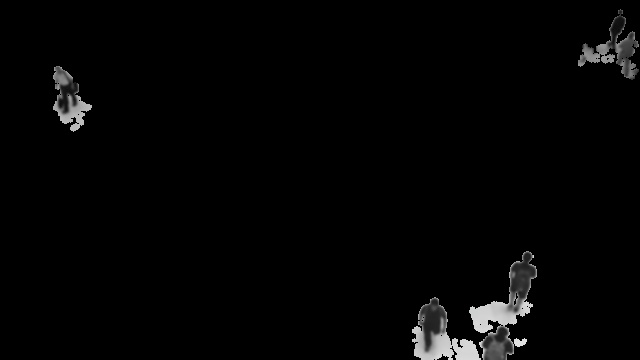

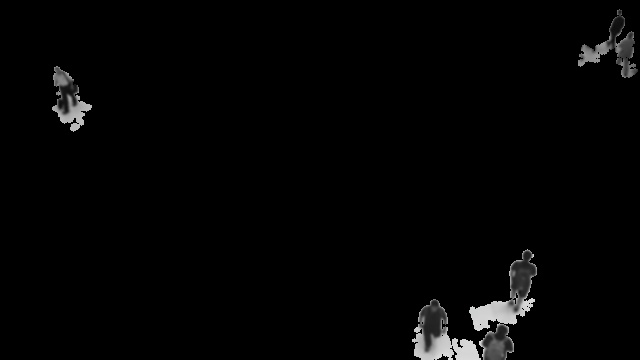

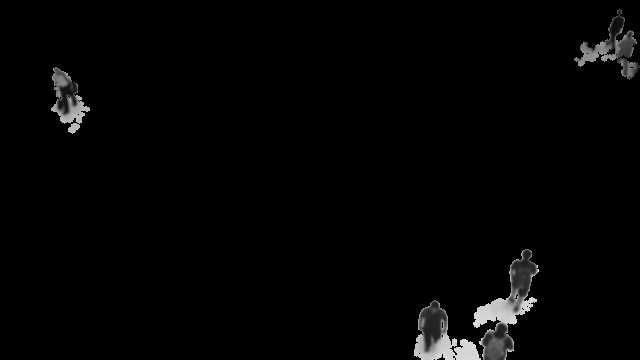

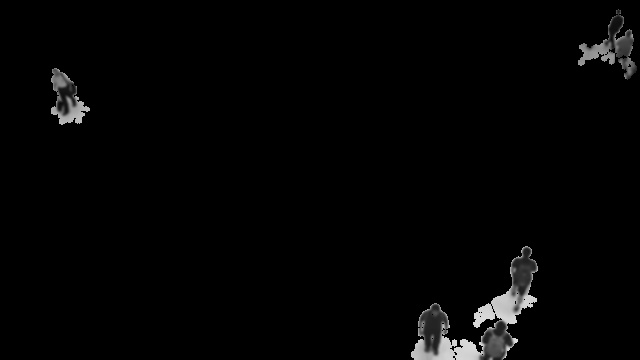

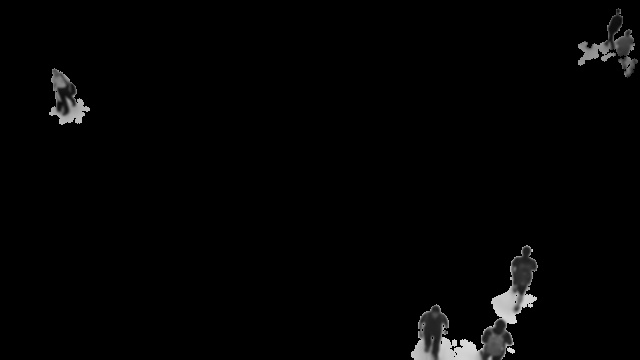

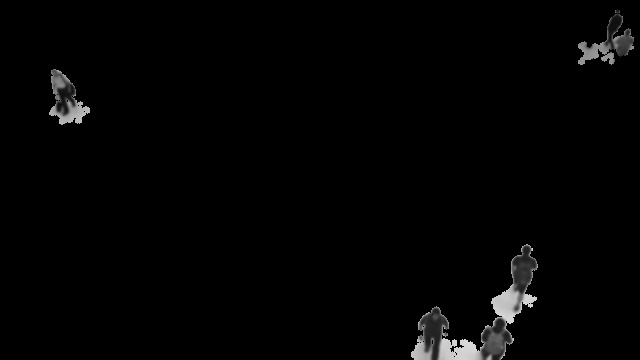

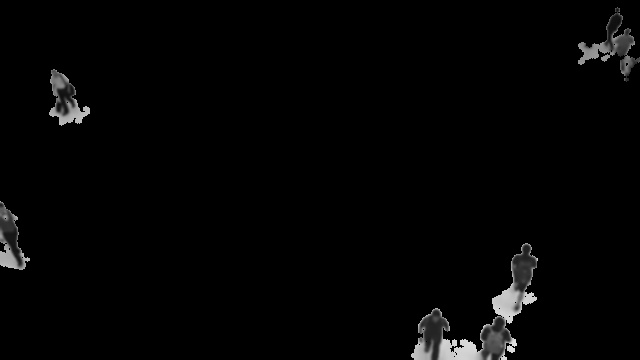

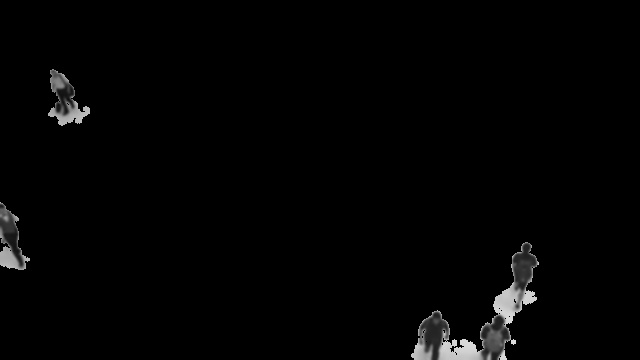

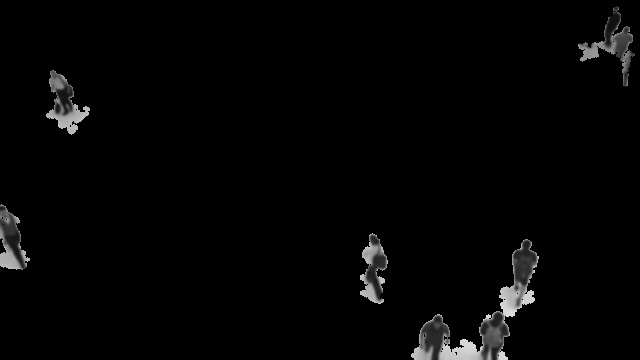

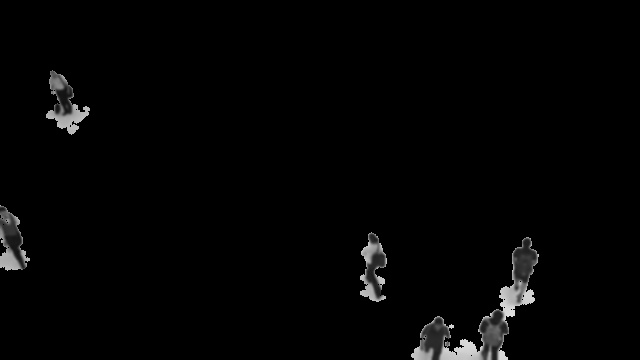

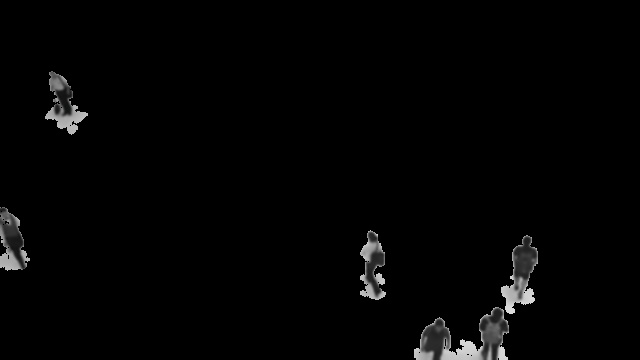

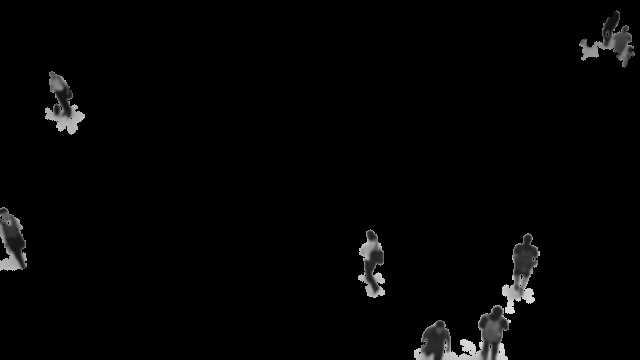

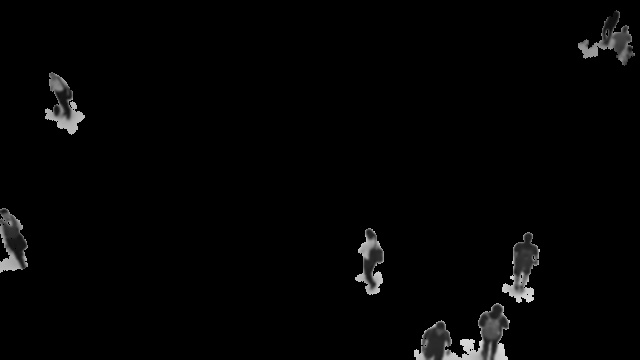

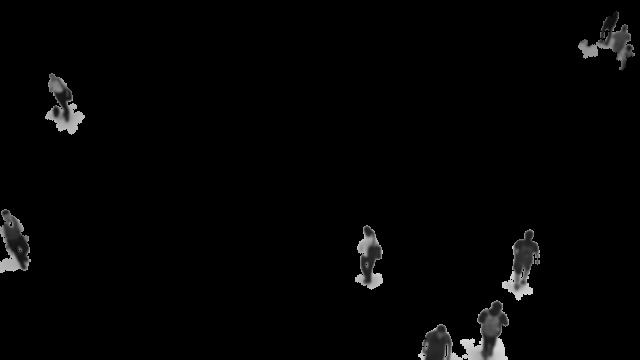

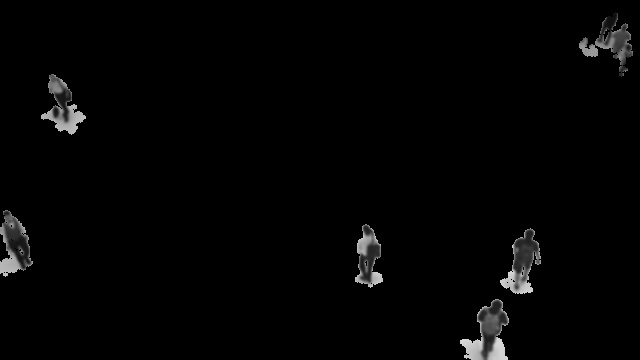

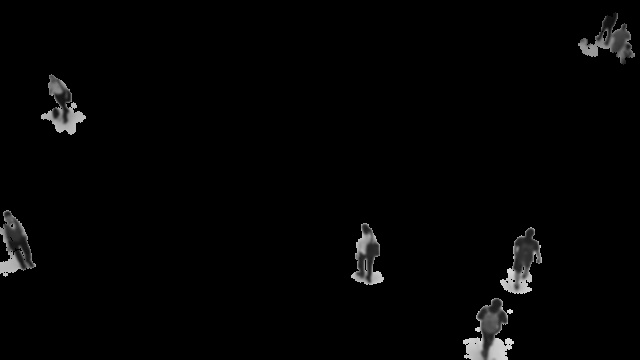

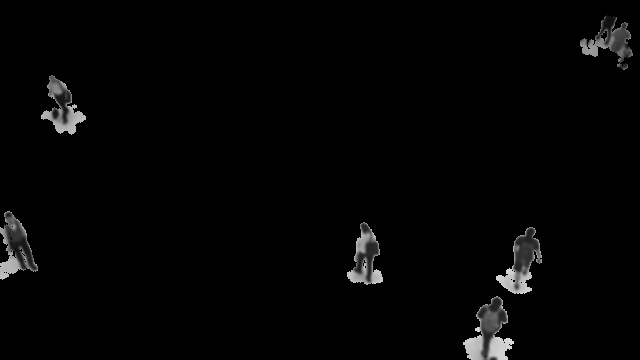

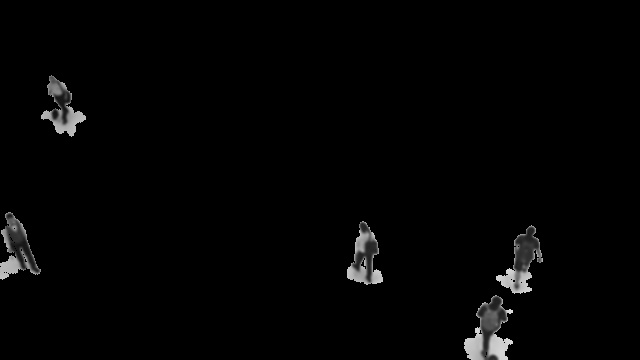

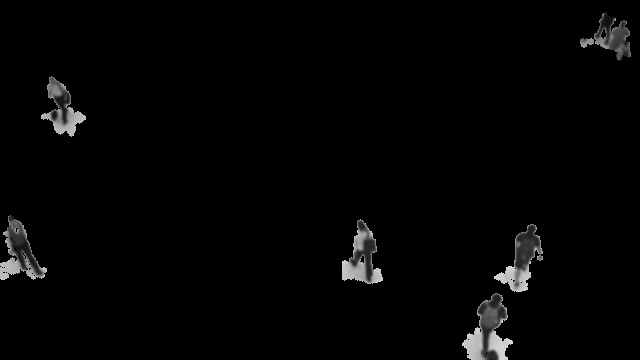

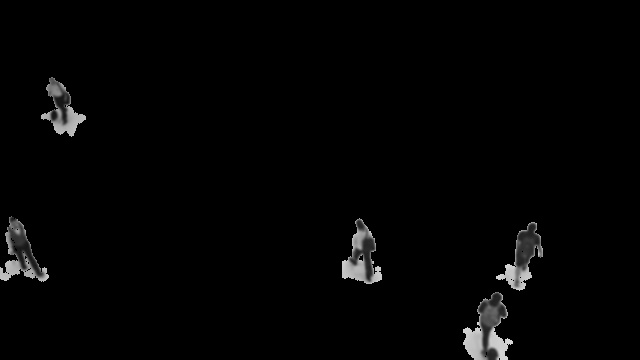

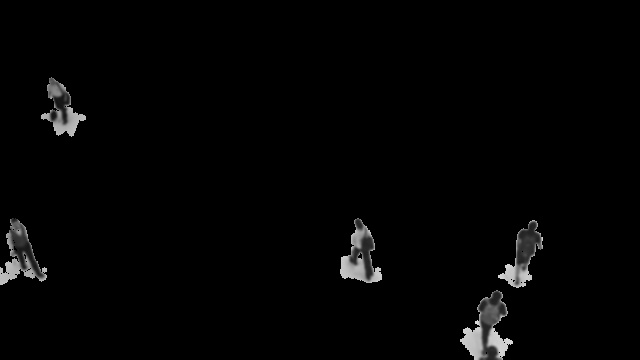

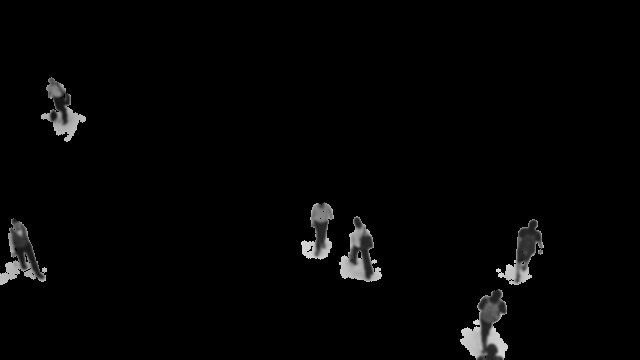

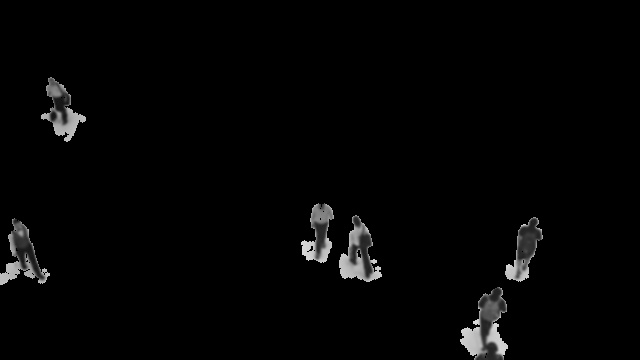

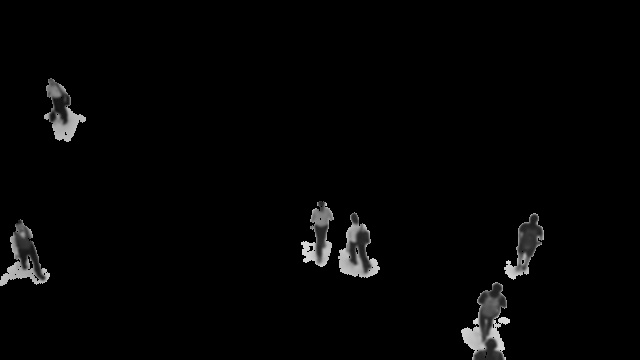

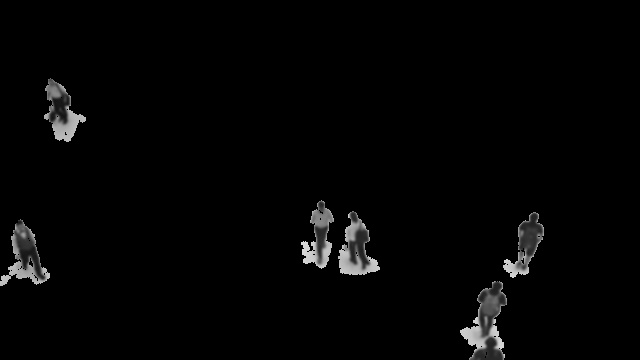

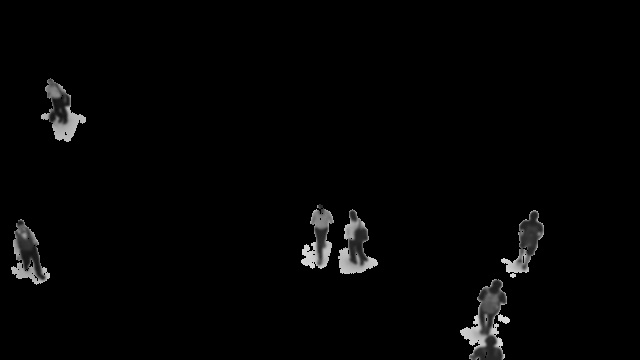

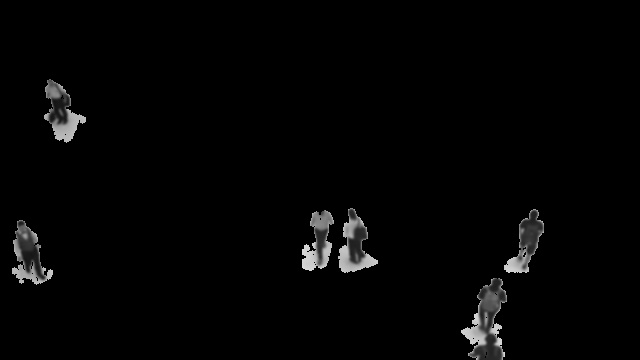

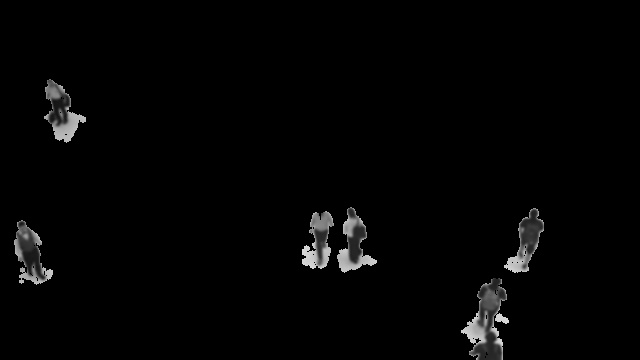

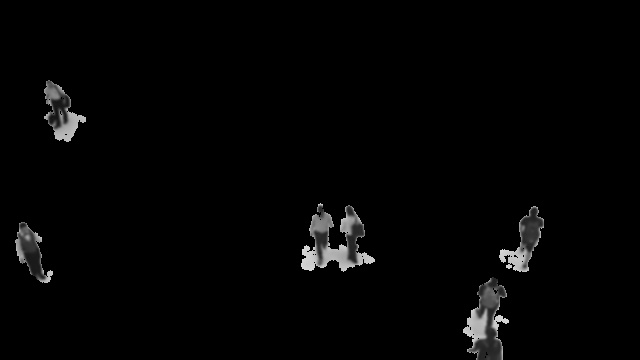

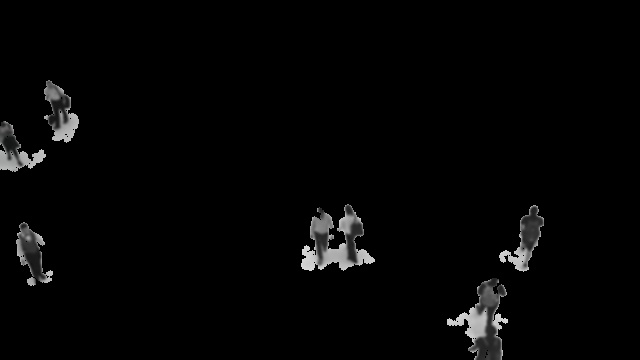

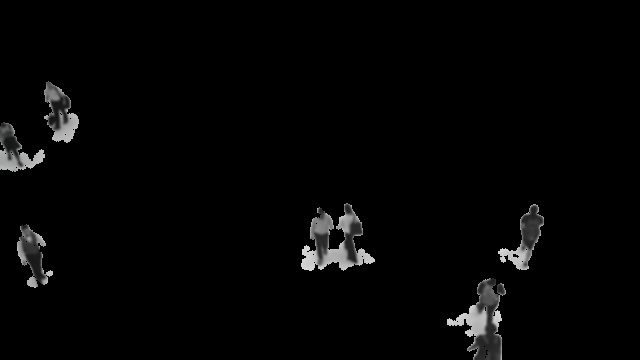

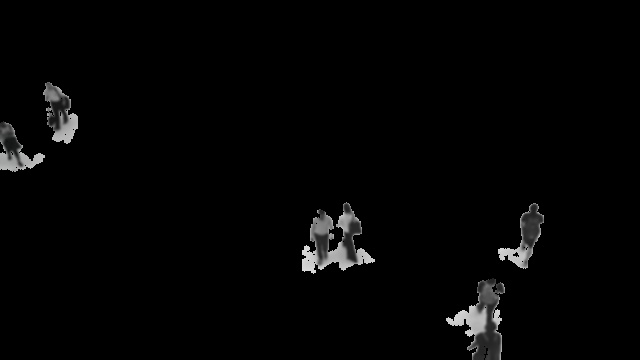

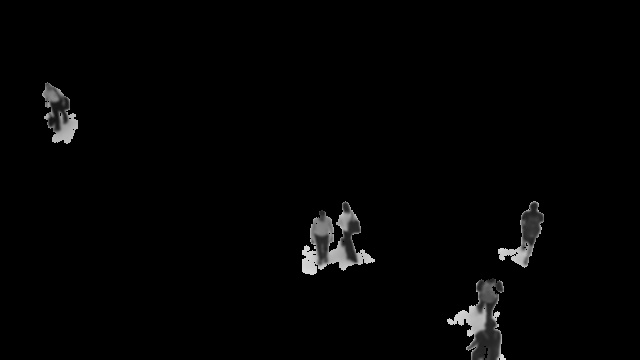

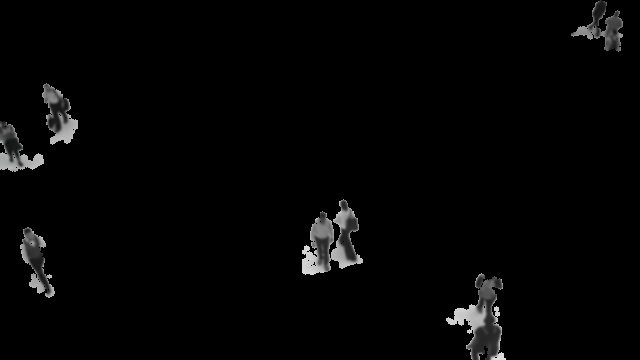

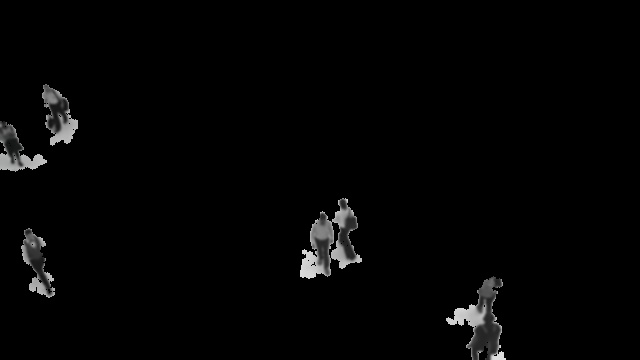

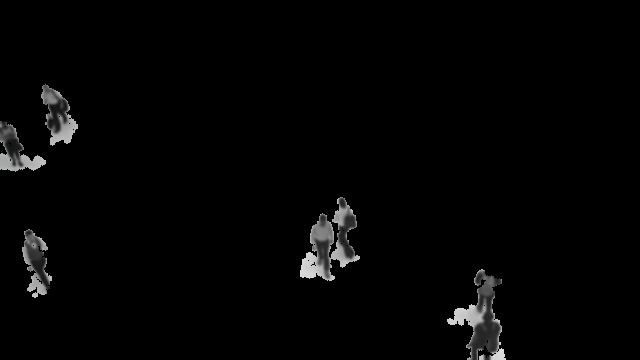

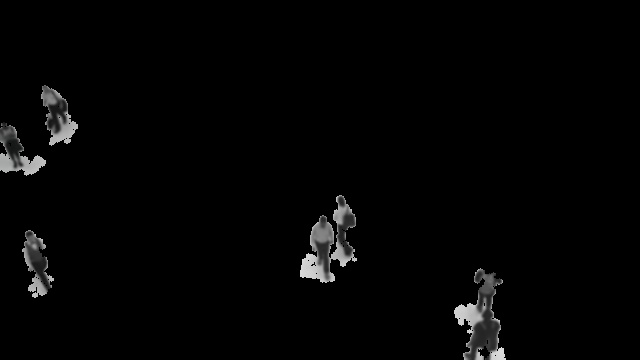

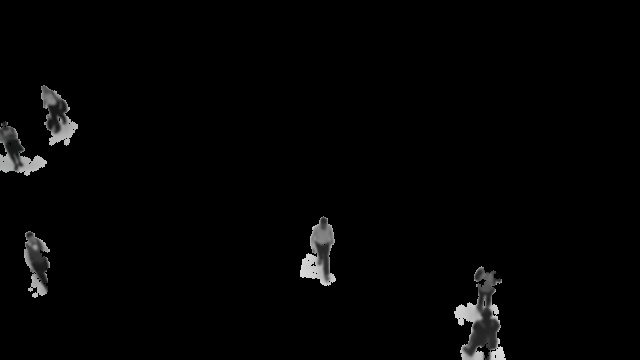

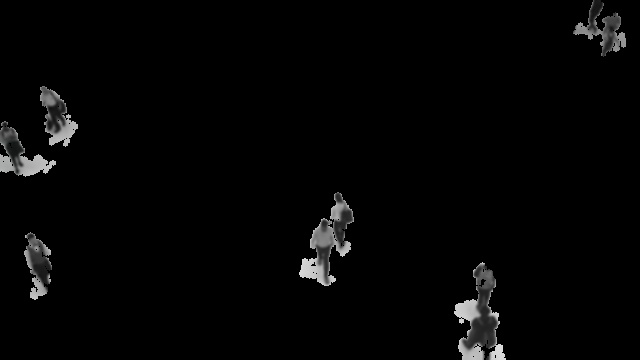

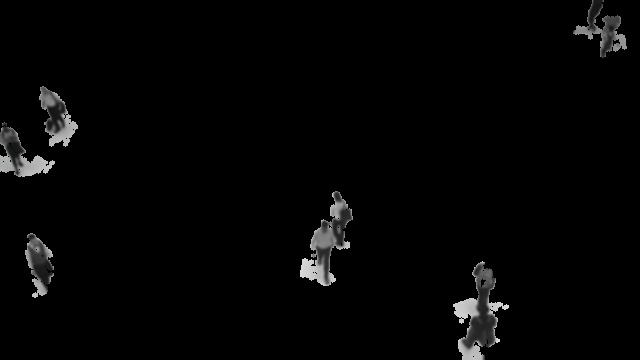

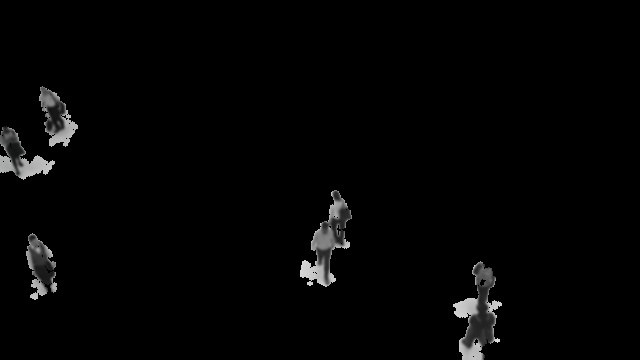

In [4]:
import cv2
import numpy as np
from IPython.display import display, Image

# Open the video capture
cap = cv2.VideoCapture('/content/background video _ people _ walking _.mp4')

# Create a background subtractor
bg_subtractor = cv2.createBackgroundSubtractorMOG2()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction
    fg_mask = bg_subtractor.apply(frame)

    # Apply Gaussian blur to reduce noise
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)

    # Apply morphological operations to remove small noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through the contours and remove small unwanted objects
    for contour in contours:
        if cv2.contourArea(contour) < 1000:  # Adjust this threshold as needed
            cv2.drawContours(fg_mask, [contour], -1, (0, 0, 0), -1)  # Fill the contour with black

    # Apply the mask to the original frame
    processed_frame = cv2.bitwise_and(blurred_frame, blurred_frame, mask=fg_mask)

    # Convert the processed frame to RGB format (required by IPython.display)
    processed_frame_rgb = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB)

    # Display the processed frame in Colab
    display(Image(data=cv2.imencode('.jpg', processed_frame_rgb)[1].tobytes()))

cap.release()

In [1]:
pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 32.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046367 sha256=3e1e804cb34eb6fbbef7b81d91a6a949c4113a1f3ed59fd60600bef69cb6c5ef
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=b2010b084ddc3798ac33decea87198733dd979d2c236e94fc4f97f8313ab3dd1
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [2]:
!pip install CocoDataset==0.1.2

In [3]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip /content/annotations_trainval2014.zip

--2023-08-29 13:41:54--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.241.68, 52.216.138.203, 52.217.107.100, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.241.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  45.2MB/s    in 5.8s    

2023-08-29 13:42:00 (41.8 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  /content/annotations_trainval2014.zip
  inflating: annotations/instances_train2014.json  
  inflating: annotations/instances_val2014.json  
  inflating: annotations/person_keypoints_train2014.json  
  inflating: annotations/person_keypoints_val2014.json  
  inflating: annotations/captions_train2014.json  
  inflating: annotations/captions_val2014.json  


In [4]:
from coco_dataset import coco_dataset_download as cocod
class_name='person'  #class name example
images_count=30       #count of images
annotations_path='/content/annotations/instances_train2014.json' #path of coco dataset annotations
#call download function
cocod.coco_dataset_download(class_name,images_count,annotations_path)

loading annotations into memory...
Done (t=15.10s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
no.of image: 31
no.of image: 32
no.of image: 33
no.of image: 34
no.of image: 35
no.of image: 36
no.of image: 37
no.of image: 38
no.of image: 39
no.of image: 40
no.of image: 41
no.of image: 42
no.of image: 43
no.of image: 44
no.of image: 45
no.of image: 46
no.of image: 47
no.of image: 48
no.of image: 49
no.of image: 50
finished images download
